#### Problem Statment: The objective of this project is to develop a machine learning model that predicts house prices based on relevant features and attributes. The model should take into consideration various factors that impact house prices and provide accurate price estimates for different properties.

### House price prediction:

In [1]:
from warnings import filterwarnings
filterwarnings('ignore')

### Loading the Dataset:

In [2]:
import pandas  as pd

train = pd.read_csv("training_set.csv")
test  = pd.read_csv("testing_set.csv")

In [3]:
train.shape

(1460, 81)

In [4]:
test.shape

(1459, 80)

In [5]:
train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [7]:
s = train.isna().sum()
s

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [8]:
s[s>0]

LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

In [9]:
train.Alley        = train.Alley.fillna('No alley access')
train.BsmtQual     = train.BsmtQual.fillna('No Basement')
train.BsmtCond     = train.BsmtCond.fillna('No Basement')
train.BsmtExposure = train.BsmtExposure.fillna('No Basement')
train.BsmtFinType1 = train.BsmtFinType1.fillna('No Basement')
train.BsmtFinType2 = train.BsmtFinType2.fillna('No Basement')
train.FireplaceQu  = train.FireplaceQu.fillna('No Fireplace')
train.GarageType   = train.GarageType.fillna('No Garage')
train.GarageFinish = train.GarageFinish.fillna('No Garage')
train.GarageQual   = train.GarageQual.fillna('No Garage')
train.GarageCond   = train.GarageCond.fillna('No Garage')
train.PoolQC       = train.PoolQC.fillna('No Pool')
train.Fence        = train.Fence.fillna('No Fence')
train.MiscFeature  = train.MiscFeature.fillna('None')


test.Alley         = test.Alley.fillna('No alley access')
test.BsmtQual      = test.BsmtQual.fillna('No Basement')
test.BsmtCond      = test.BsmtCond.fillna('No Basement')
test.BsmtExposure  = test.BsmtExposure.fillna('No Basement')
test.BsmtFinType1  = test.BsmtFinType1.fillna('No Basement')
test.BsmtFinType2  = test.BsmtFinType2.fillna('No Basement')
test.FireplaceQu   = test.FireplaceQu.fillna('No Fireplace')
test.GarageType    = test.GarageType.fillna('No Garage')
test.GarageFinish  = test.GarageFinish.fillna('No Garage')
test.GarageQual    = test.GarageFinish.fillna('No Garage')
test.GarageCond    = test.GarageCond.fillna('No Garage')
test.PoolQC        = test.PoolQC.fillna('No Pool')
test.Fence         = test.Fence.fillna('No Fece')
test.MiscFeature   = test.MiscFeature.fillna('None')

In [10]:
def replacer(df):
    for i in df.columns:
        if (df[i]. dtypes == "object"):
            x = df[i].mode()[0]
            df[i] = df[i].fillna(x)
            
        else:
            x = df[i].mean()
            df[i] = df[i].fillna(x)

In [11]:
replacer(train)
replacer(test)

In [12]:
train.isna().sum()

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 81, dtype: int64

In [13]:
test.isna().sum()

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
                ..
MiscVal          0
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
Length: 80, dtype: int64

### EDA : - Exploratory data analysis 

* Exploratory data analysis (EDA) is used to analyze and investigate data sets and summarize their main characteristics, often employing data visualization methods.

In [14]:
# Seperate Continuos and Categorical Columns

def catconsep(df):
    cat = []
    con = []
    for i in df.columns:
        if(df[i].dtypes == "object"):
            cat.append(i)
        else:
            con.append(i)
    return cat,con

In [15]:
cat,con = catconsep(train)

In [16]:
con

['Id',
 'MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold',
 'SalePrice']

#### Descriptive Statistics First 

In [17]:
train[con].describe().T

count           mean           std      min        25%  \
Id             1460.0     730.500000    421.610009      1.0     365.75   
MSSubClass     1460.0      56.897260     42.300571     20.0      20.00   
LotFrontage    1460.0      70.049958     22.024023     21.0      60.00   
LotArea        1460.0   10516.828082   9981.264932   1300.0    7553.50   
OverallQual    1460.0       6.099315      1.382997      1.0       5.00   
OverallCond    1460.0       5.575342      1.112799      1.0       5.00   
YearBuilt      1460.0    1971.267808     30.202904   1872.0    1954.00   
YearRemodAdd   1460.0    1984.865753     20.645407   1950.0    1967.00   
MasVnrArea     1460.0     103.685262    180.569112      0.0       0.00   
BsmtFinSF1     1460.0     443.639726    456.098091      0.0       0.00   
BsmtFinSF2     1460.0      46.549315    161.319273      0.0       0.00   
BsmtUnfSF      1460.0     567.240411    441.866955      0.0     223.00   
TotalBsmtSF    1460.0    1057.429452    438.705324      0.0     795.75   
1stFlrSF       1460.0    1162.626712    386.587738    334.0     882.00   
2ndFlrSF       1460.0     346.992466    436.528436      0.0       0.00   
LowQualFinSF   1460.0       5.844521     48.623081      0.0       0.00   
GrLivArea      1460.0    1515.463699    525.480383    334.0    1129.50   
BsmtFullBath   1460.0       0.425342      0.518911      0.0       0.00   
BsmtHalfBath   1460.0       0.057534      0.238753      0.0       0.00   
FullBath       1460.0       1.565068      0.550916      0.0       1.00   
HalfBath       1460.0       0.382877      0.502885      0.0       0.00   
BedroomAbvGr   1460.0       2.866438      0.815778      0.0       2.00   
KitchenAbvGr   1460.0       1.046575      0.220338      0.0       1.00   
TotRmsAbvGrd   1460.0       6.517808      1.625393      2.0       5.00   
Fireplaces     1460.0       0.613014      0.644666      0.0       0.00   
GarageYrBlt    1460.0    1978.506164     23.994583   1900.0    1962.00   
GarageCars     1460.0       1.767123      0.747315      0.0       1.00   
GarageArea     1460.0     472.980137    213.804841      0.0     334.50   
WoodDeckSF     1460.0      94.244521    125.338794      0.0       0.00   
OpenPorchSF    1460.0      46.660274     66.256028      0.0       0.00   
EnclosedPorch  1460.0      21.954110     61.119149      0.0       0.00   
3SsnPorch      1460.0       3.409589     29.317331      0.0       0.00   
ScreenPorch    1460.0      15.060959     55.757415      0.0       0.00   
PoolArea       1460.0       2.758904     40.177307      0.0       0.00   
MiscVal        1460.0      43.489041    496.123024      0.0       0.00   
MoSold         1460.0       6.321918      2.703626      1.0       5.00   
YrSold         1460.0    2007.815753      1.328095   2006.0    2007.00   
SalePrice      1460.0  180921.195890  79442.502883  34900.0  129975.00   

                         50%        75%       max  
Id                730.500000    1095.25    1460.0  
MSSubClass         50.000000      70.00     190.0  
LotFrontage        70.049958      79.00     313.0  
LotArea          9478.500000   11601.50  215245.0  
OverallQual         6.000000       7.00      10.0  
OverallCond         5.000000       6.00       9.0  
YearBuilt        1973.000000    2000.00    2010.0  
YearRemodAdd     1994.000000    2004.00    2010.0  
MasVnrArea          0.000000     164.25    1600.0  
BsmtFinSF1        383.500000     712.25    5644.0  
BsmtFinSF2          0.000000       0.00    1474.0  
BsmtUnfSF         477.500000     808.00    2336.0  
TotalBsmtSF       991.500000    1298.25    6110.0  
1stFlrSF         1087.000000    1391.25    4692.0  
2ndFlrSF            0.000000     728.00    2065.0  
LowQualFinSF        0.000000       0.00     572.0  
GrLivArea        1464.000000    1776.75    5642.0  
BsmtFullBath        0.000000       1.00       3.0  
BsmtHalfBath        0.000000       0.00       2.0  
FullBath            2.000000       2.00       3.0  
HalfBath            0.000000       1.

In [18]:
train[cat].describe().T

count unique              top  freq
MSZoning       1460      5               RL  1151
Street         1460      2             Pave  1454
Alley          1460      3  No alley access  1369
LotShape       1460      4              Reg   925
LandContour    1460      4              Lvl  1311
Utilities      1460      2           AllPub  1459
LotConfig      1460      5           Inside  1052
LandSlope      1460      3              Gtl  1382
Neighborhood   1460     25            NAmes   225
Condition1     1460      9             Norm  1260
Condition2     1460      8             Norm  1445
BldgType       1460      5             1Fam  1220
HouseStyle     1460      8           1Story   726
RoofStyle      1460      6            Gable  1141
RoofMatl       1460      8          CompShg  1434
Exterior1st    1460     15          VinylSd   515
Exterior2nd    1460     16          VinylSd   504
MasVnrType     1460      4             None   872
ExterQual      1460      4               TA   906
ExterCond      1460      5               TA  1282
Foundation     1460      6            PConc   647
BsmtQual       1460      5               TA   649
BsmtCond       1460      5               TA  1311
BsmtExposure   1460      5               No   953
BsmtFinType1   1460      7              Unf   430
BsmtFinType2   1460      7              Unf  1256
Heating        1460      6             GasA  1428
HeatingQC      1460      5               Ex   741
CentralAir     1460      2                Y  1365
Electrical     1460      5            SBrkr  1335
KitchenQual    1460      4               TA   735
Functional     1460      7              Typ  1360
FireplaceQu    1460      6     No Fireplace   690
GarageType     1460      7           Attchd   870
GarageFinish   1460      4              Unf   605
GarageQual     1460      6               TA  1311
GarageCond     1460      6               TA  1326
PavedDrive     1460      3                Y  1340
PoolQC         1460      4          No Pool  1453
Fence          1460      5         No Fence  1179
MiscFeature    1460      5             None  1406
SaleType       1460      9               WD  1267
SaleCondition  1460      6           Normal  1198

### Univariate Analysis

1.Con - Histograms
2.Cat - Countplot

In [19]:
import matplotlib.pyplot as plt
import seaborn as sb

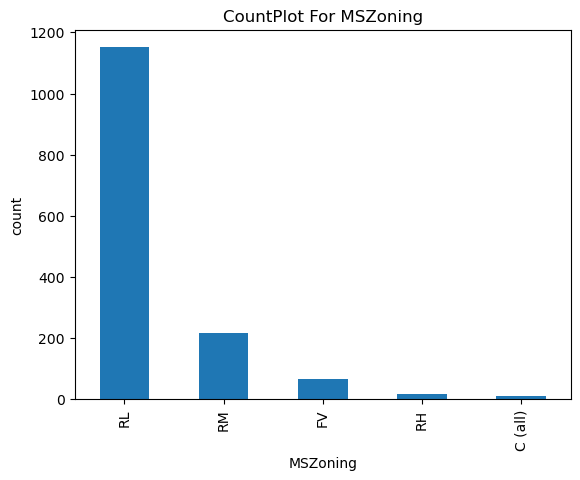

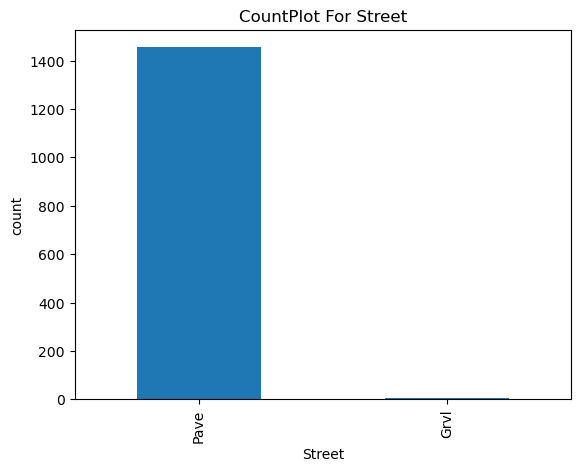

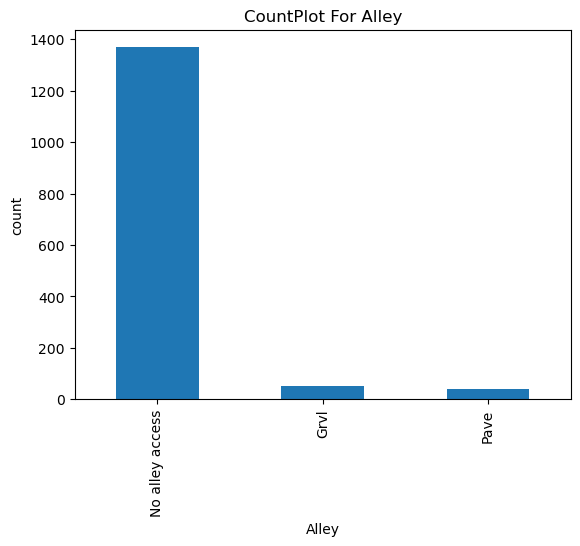

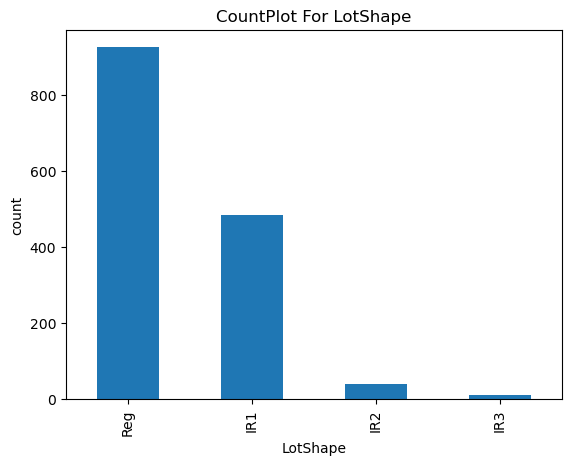

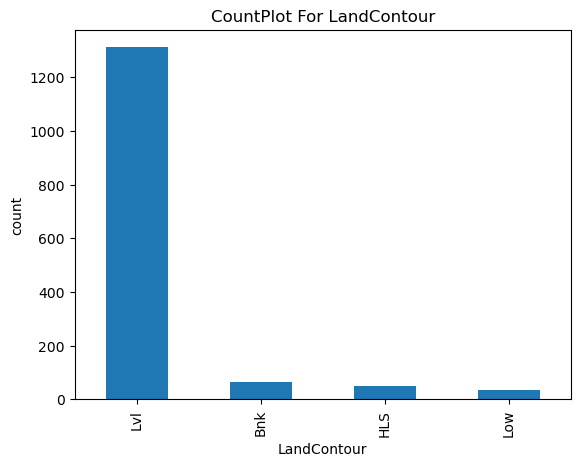

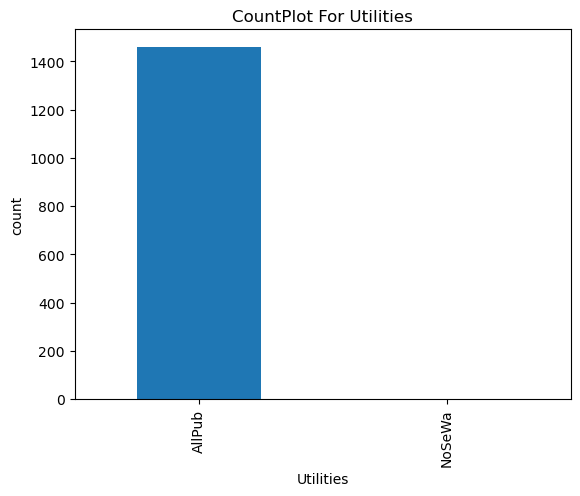

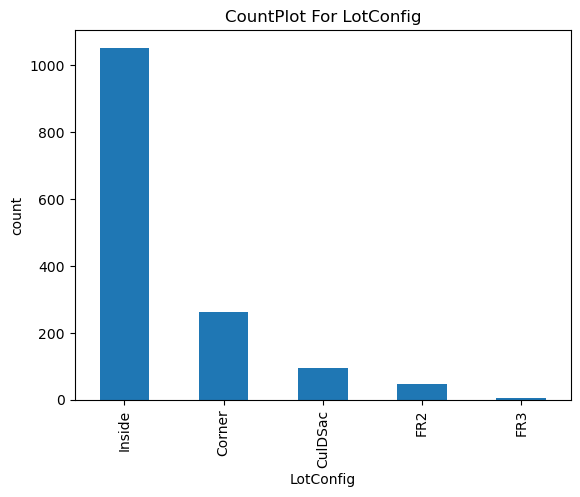

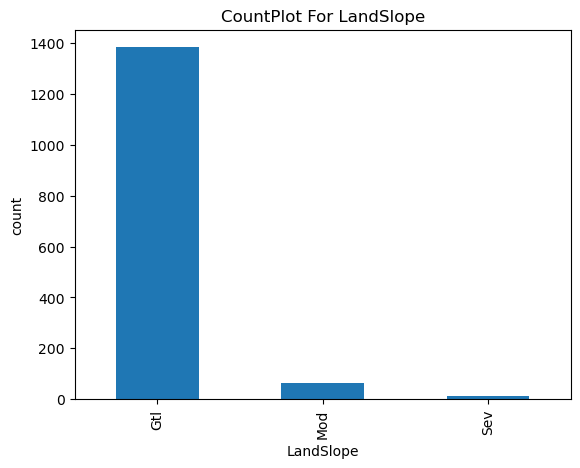

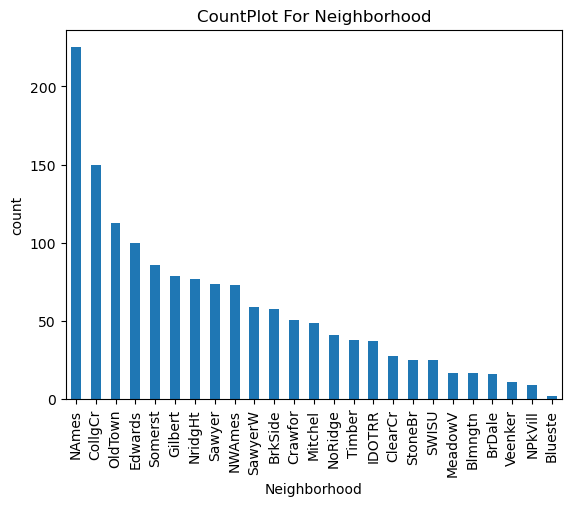

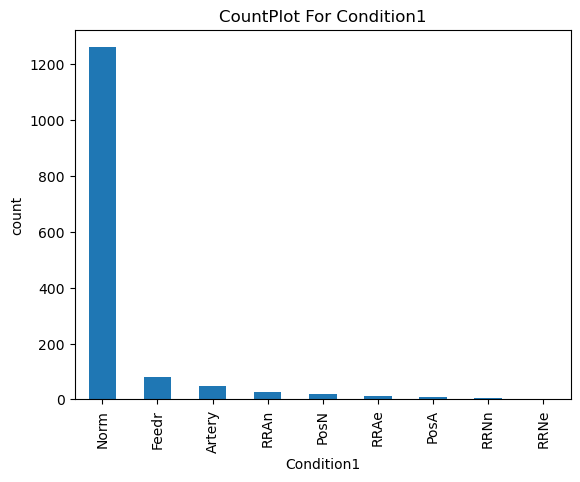

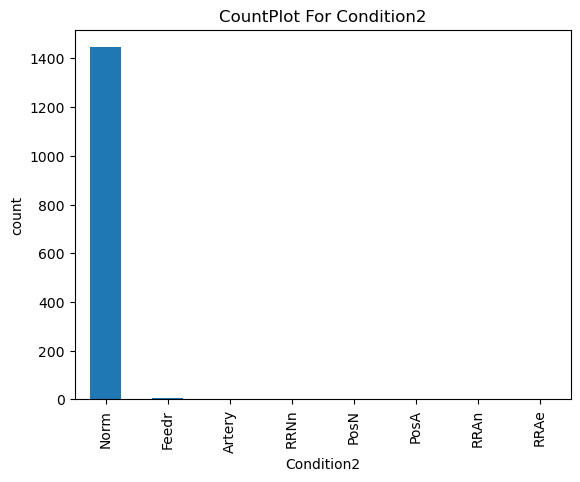

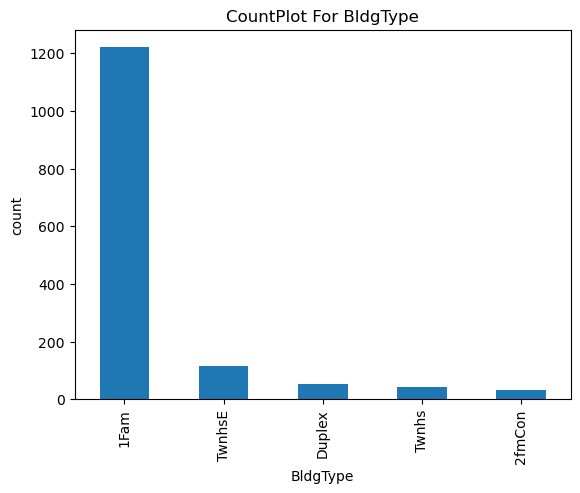

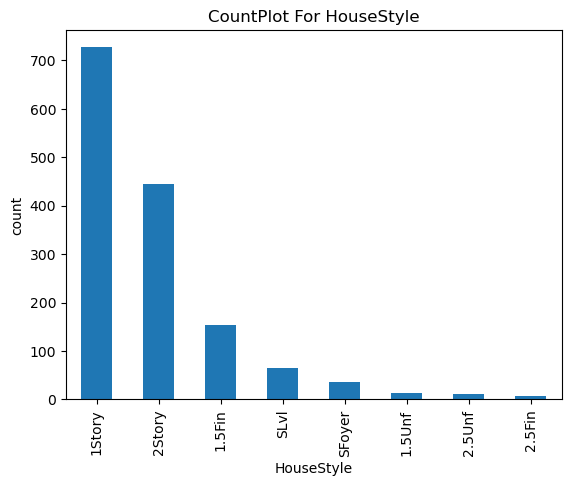

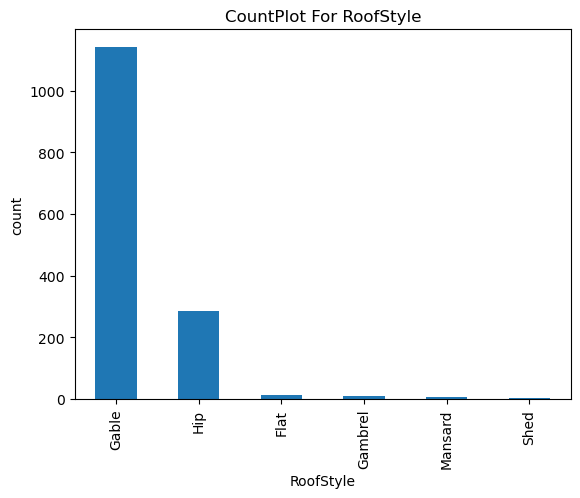

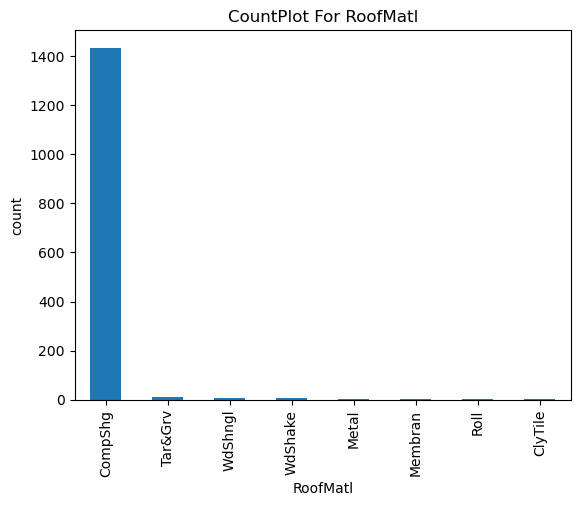

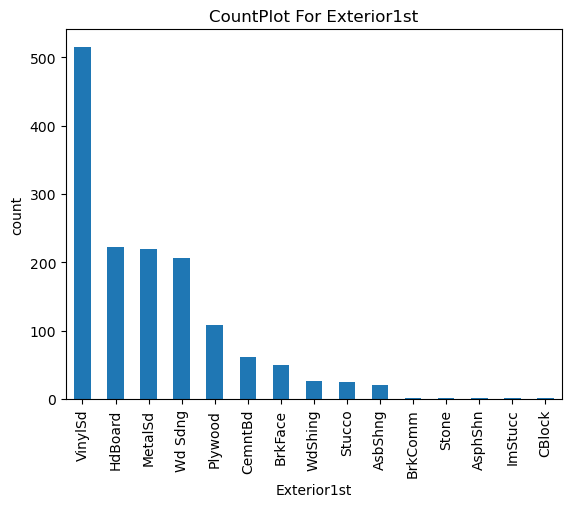

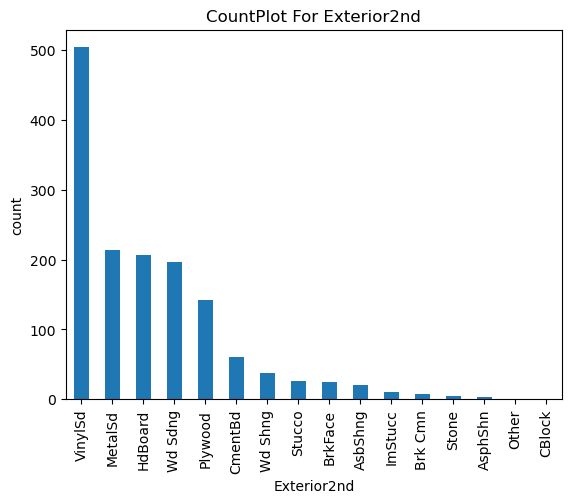

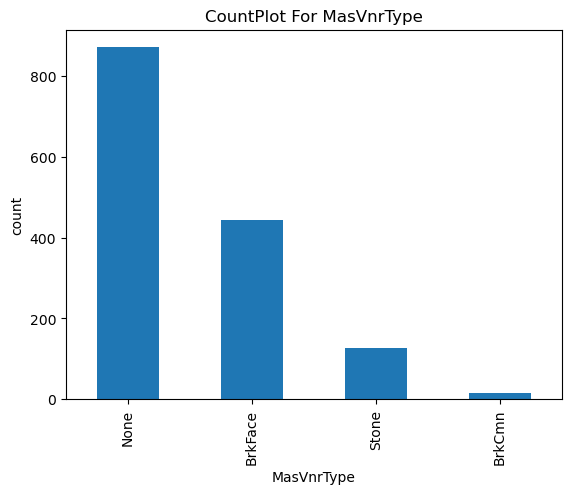

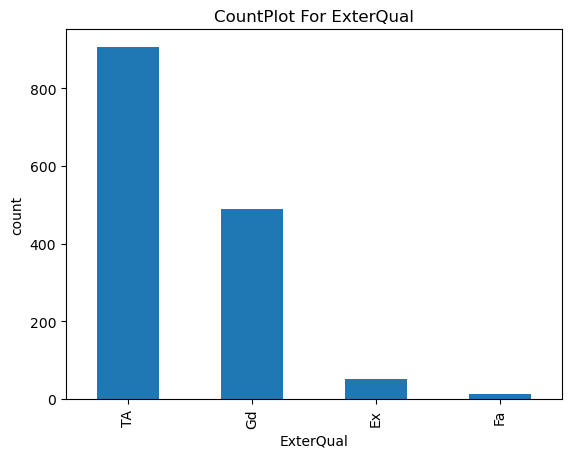

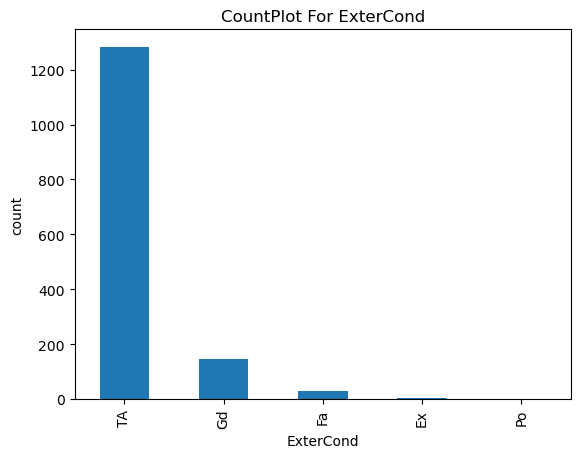

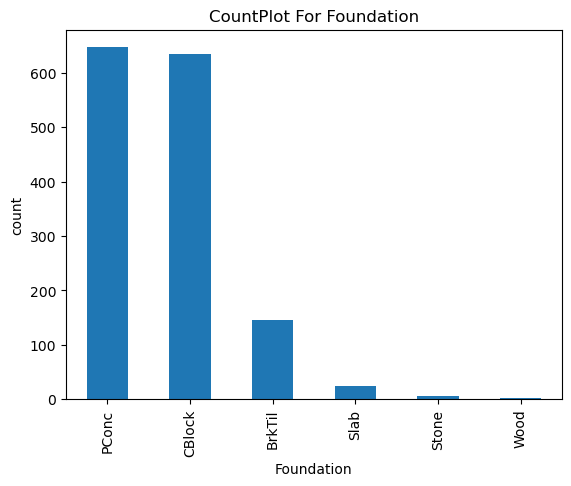

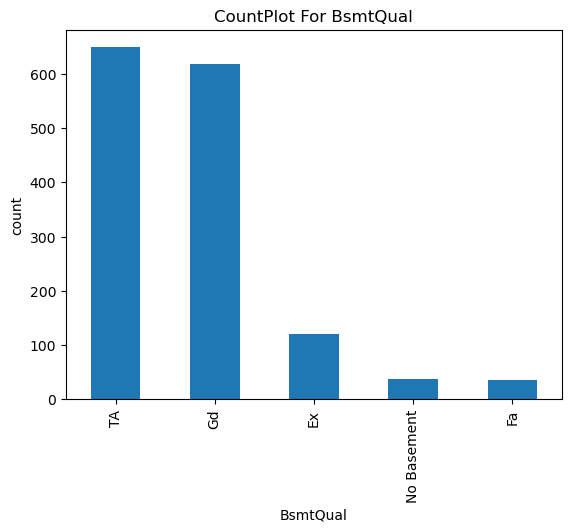

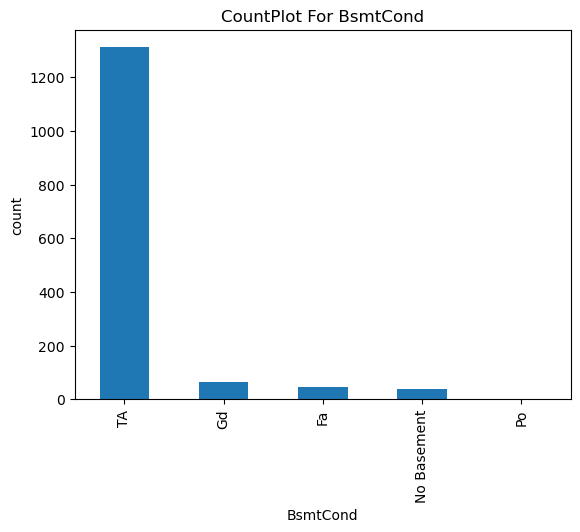

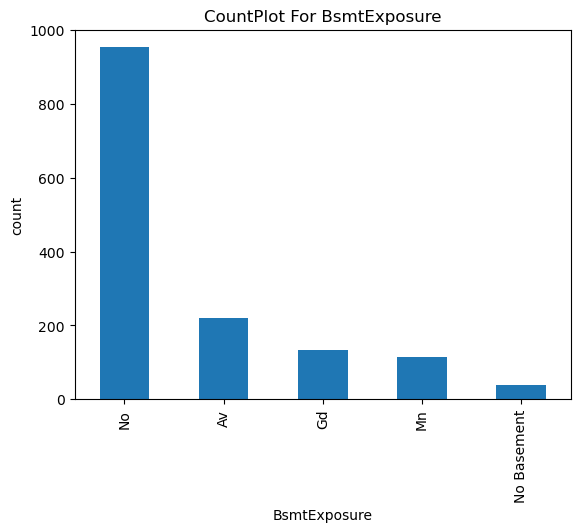

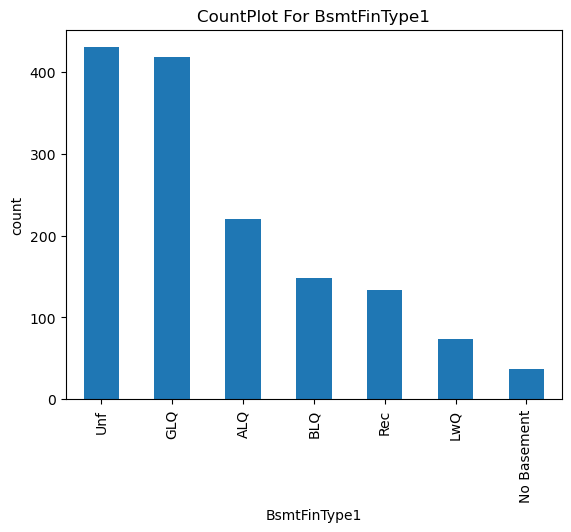

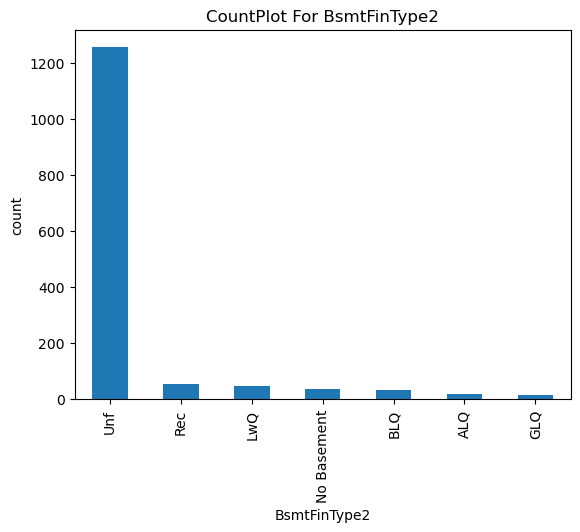

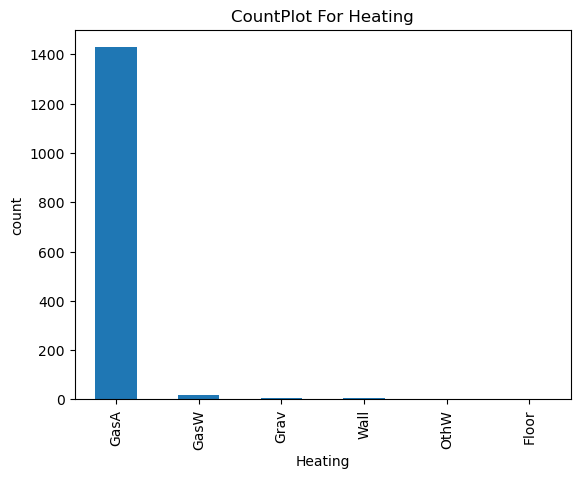

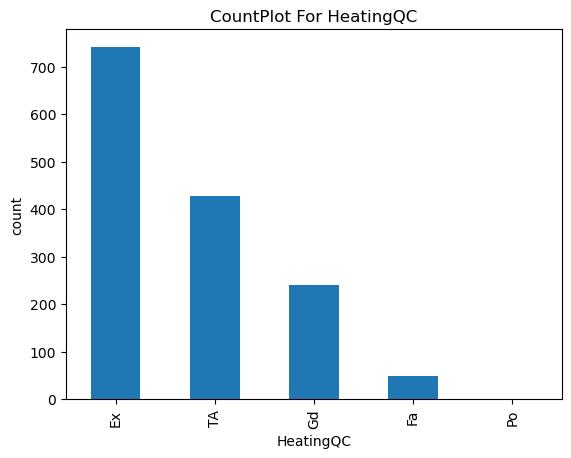

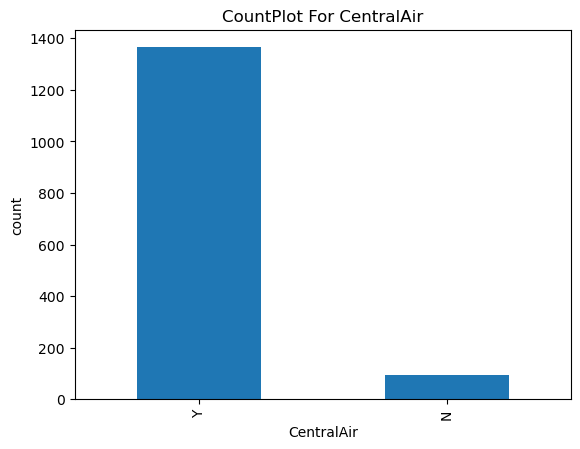

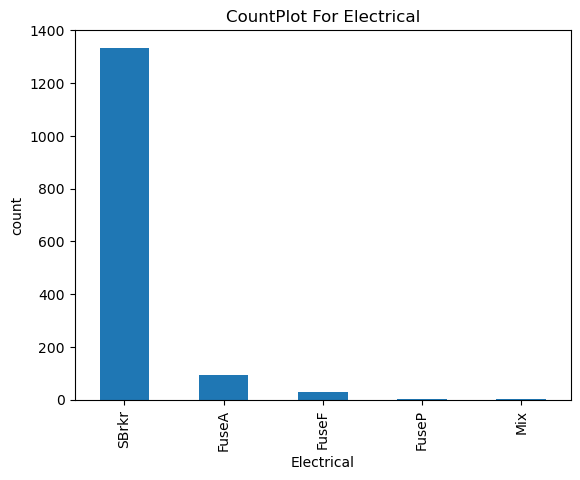

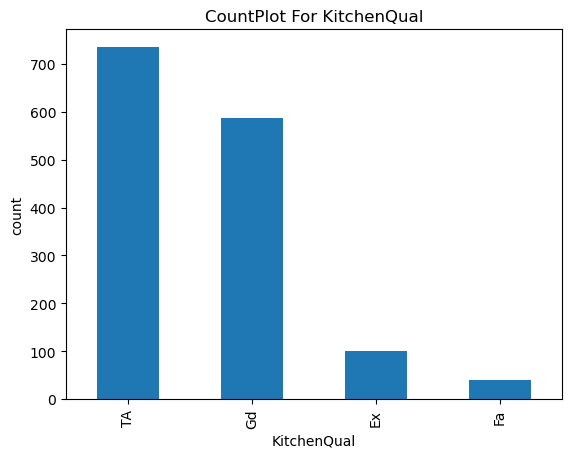

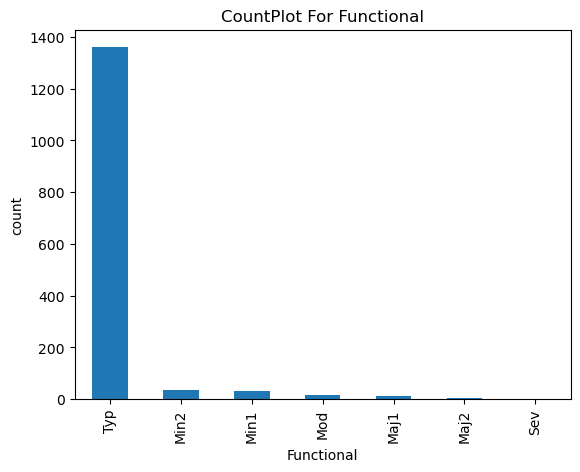

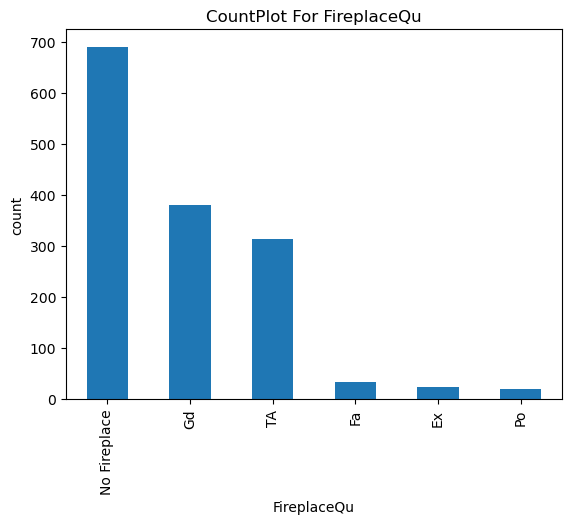

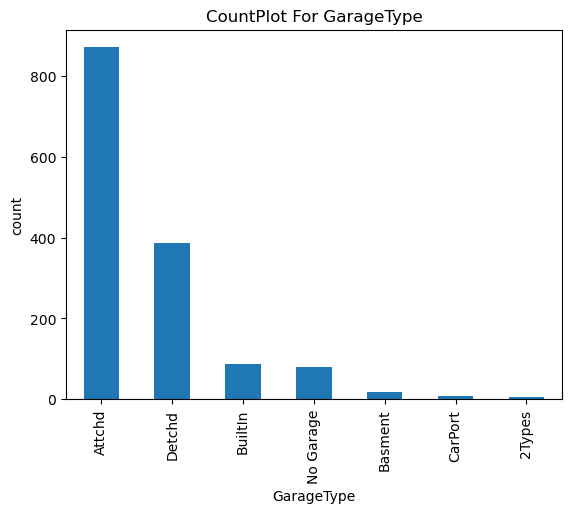

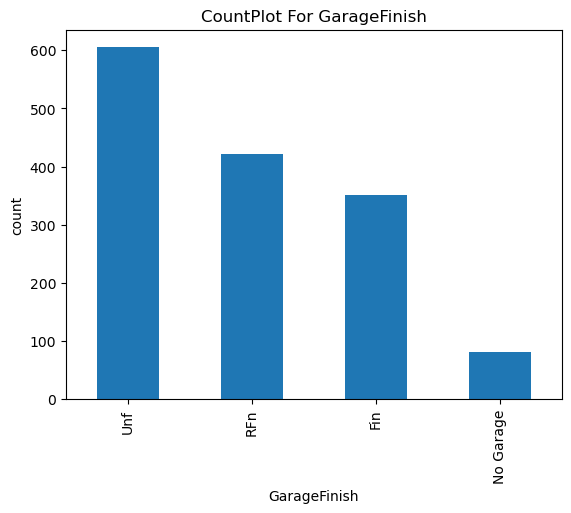

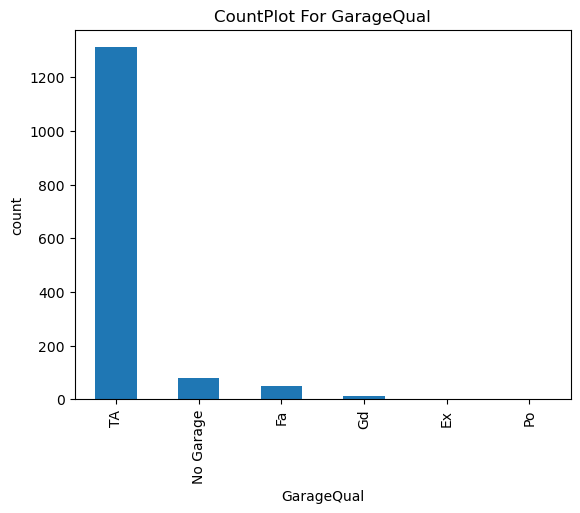

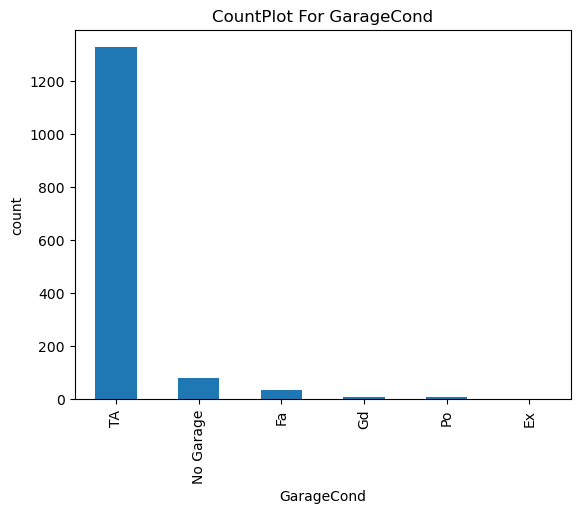

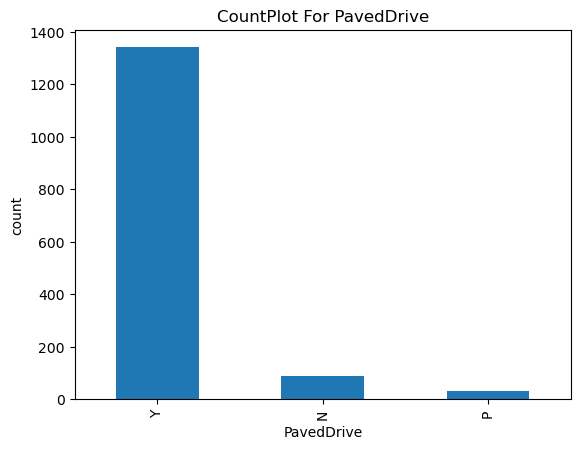

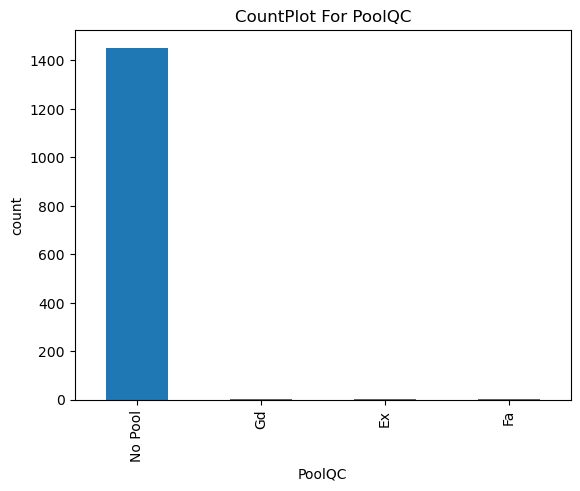

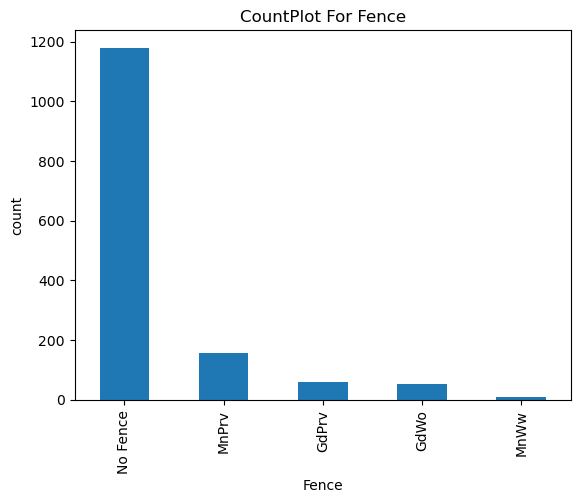

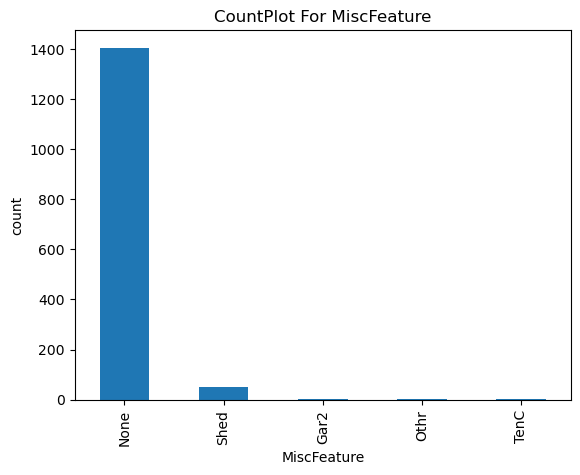

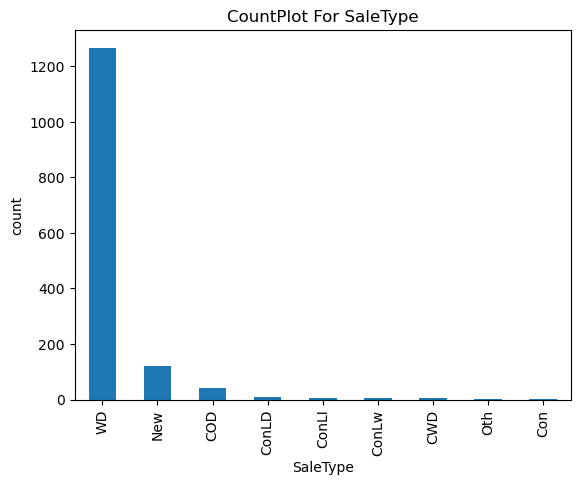

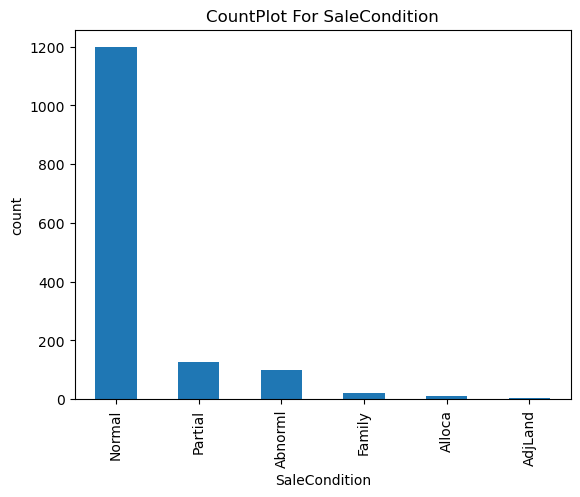

In [20]:
for i in cat:
    train[i].value_counts().plot(kind='bar', xlabel=f'{i}', ylabel='count', title=f'CountPlot For {i}')
    plt.show()

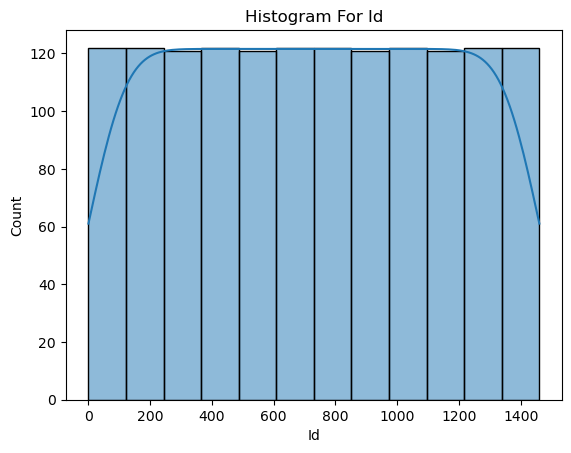

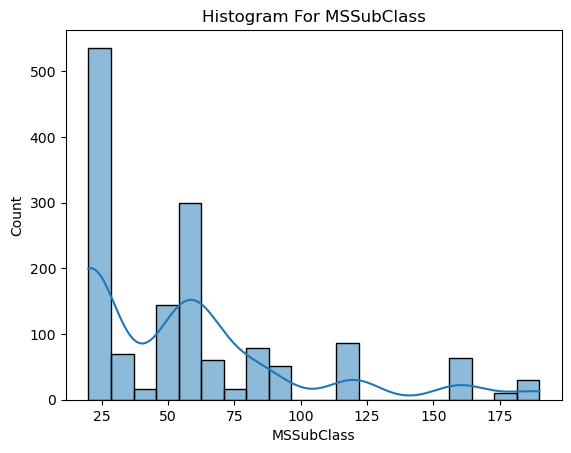

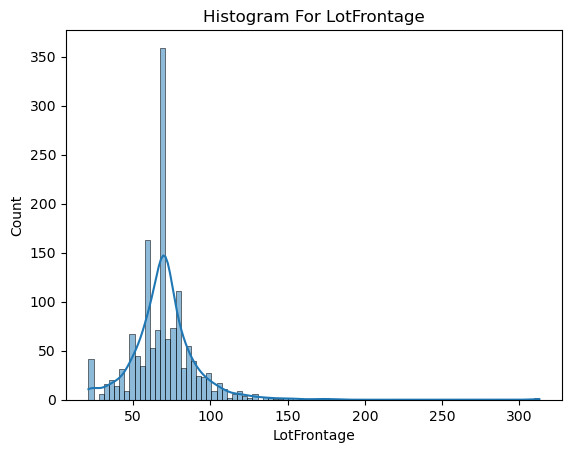

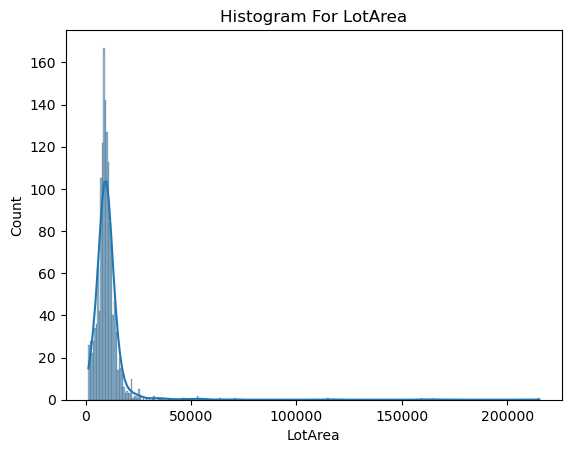

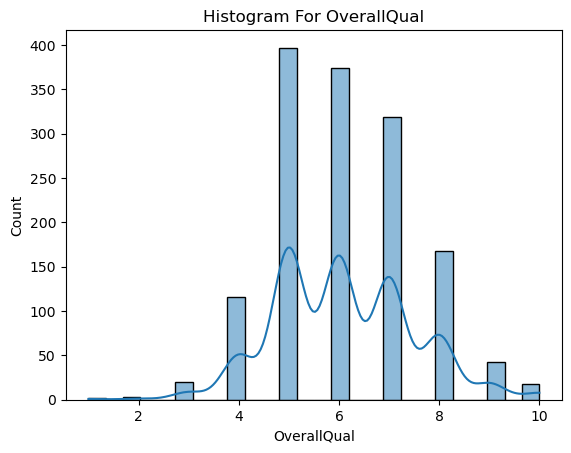

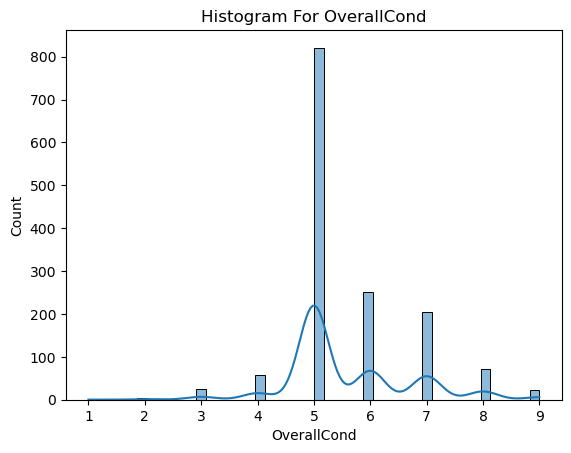

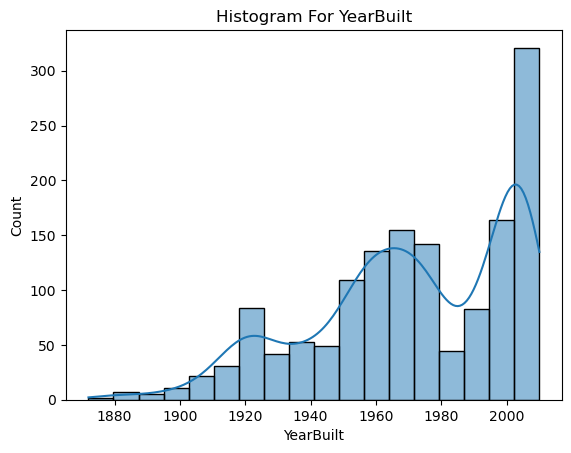

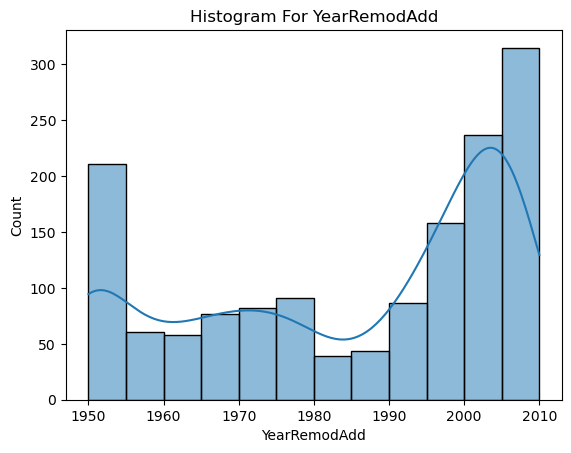

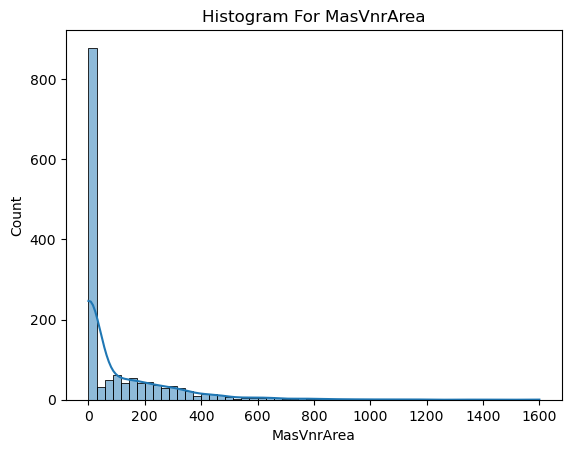

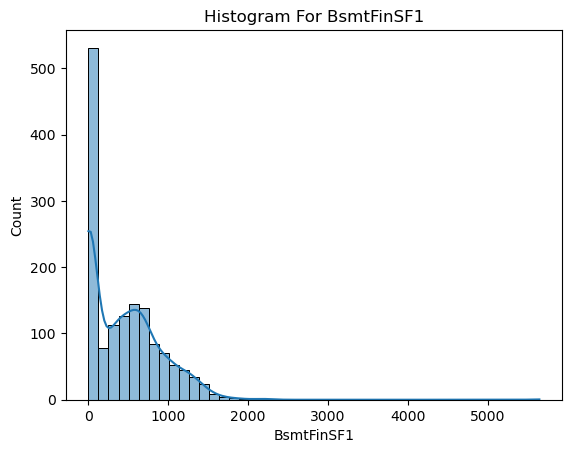

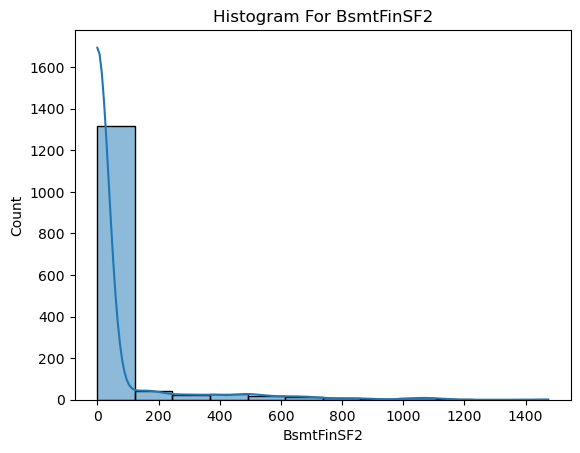

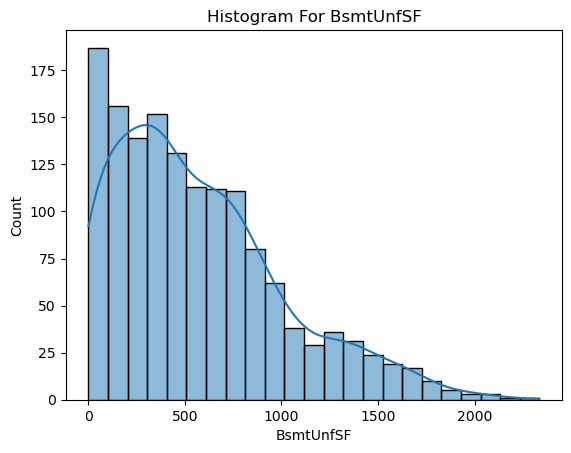

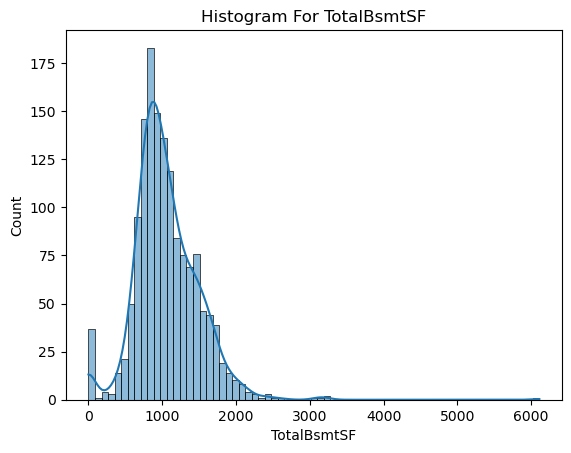

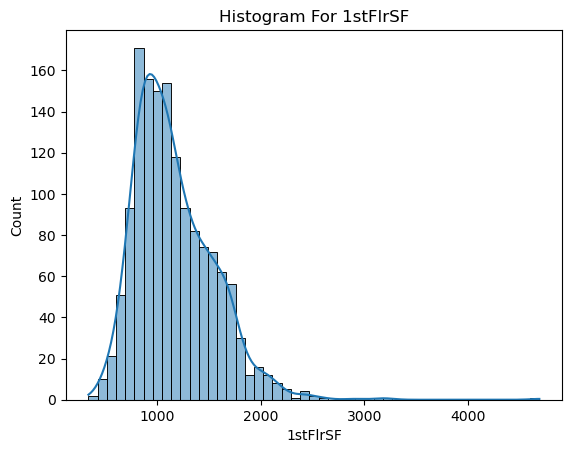

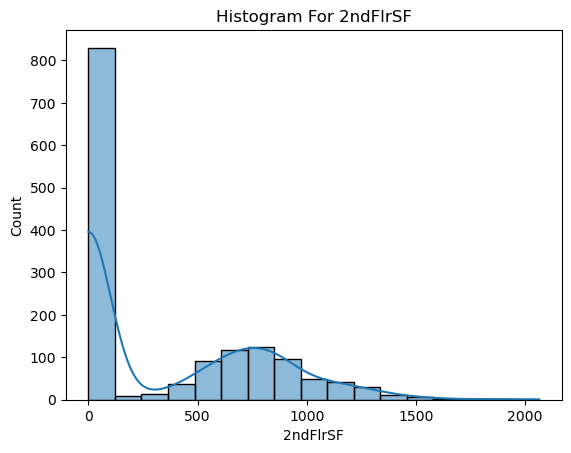

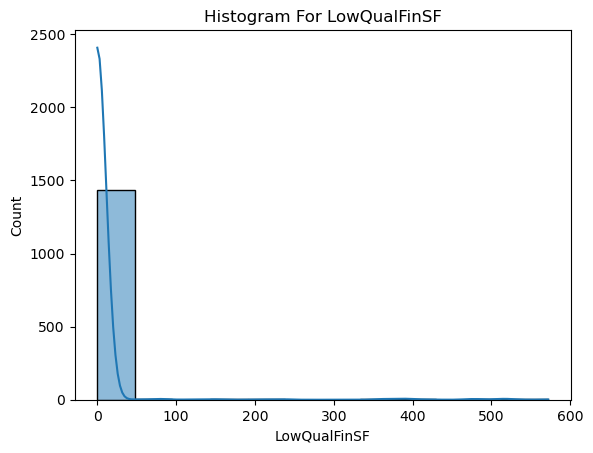

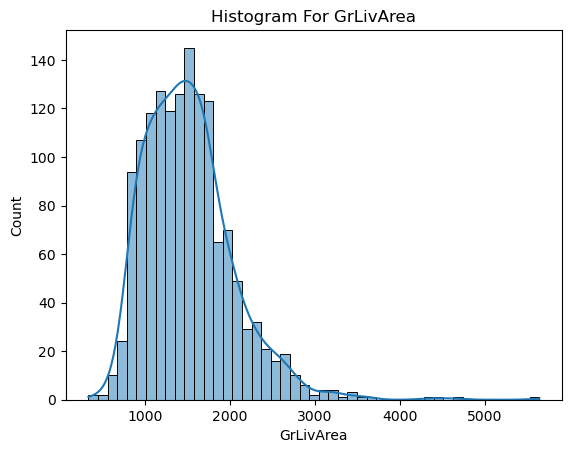

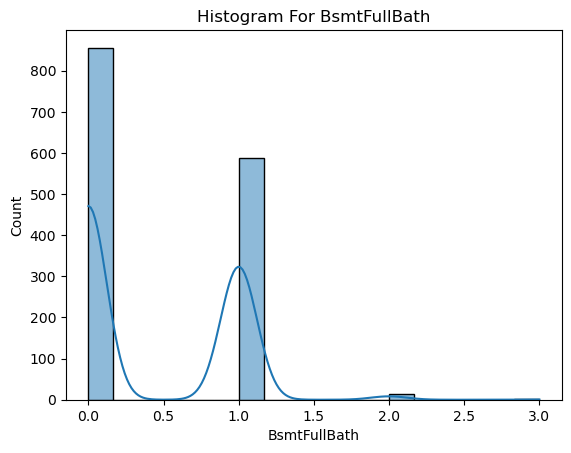

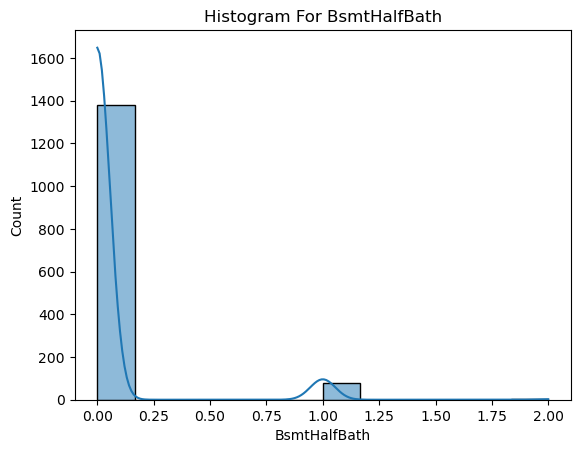

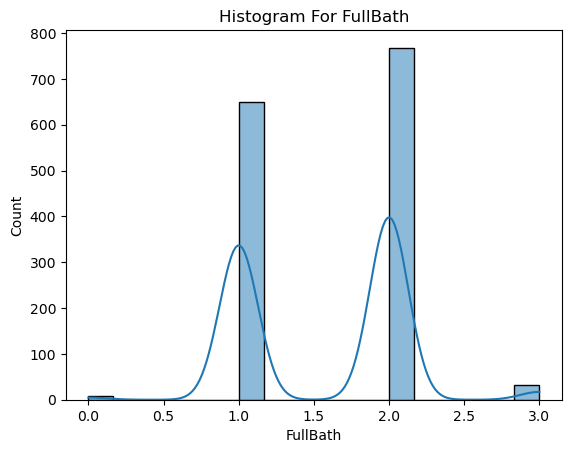

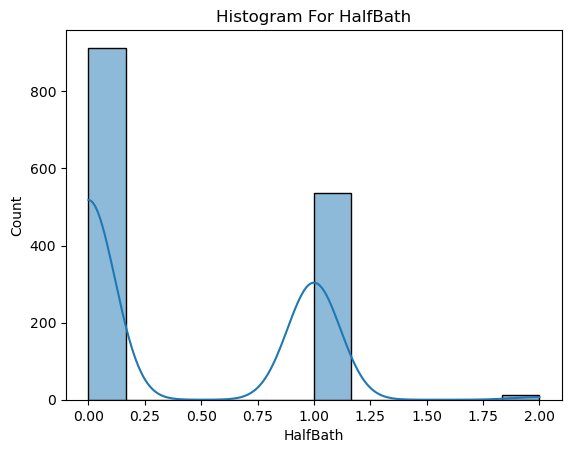

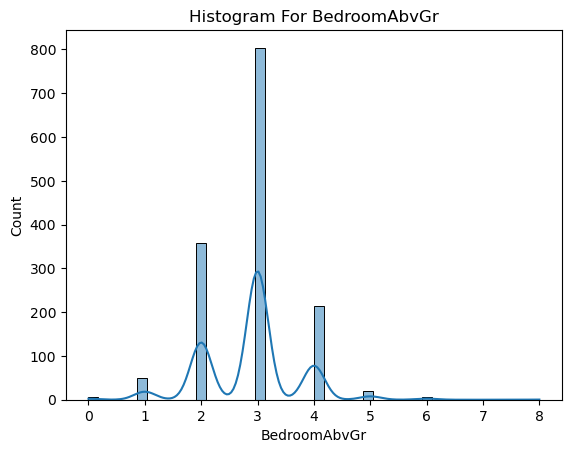

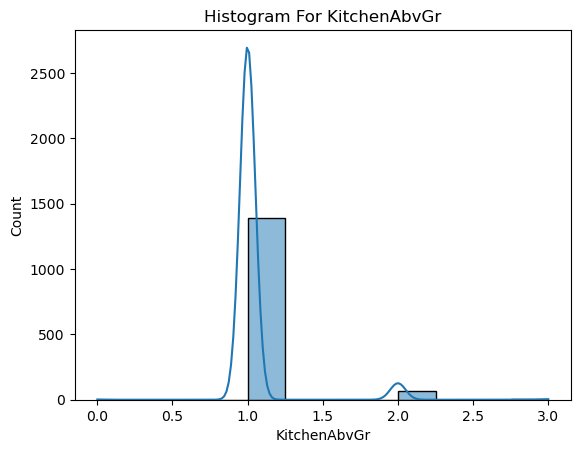

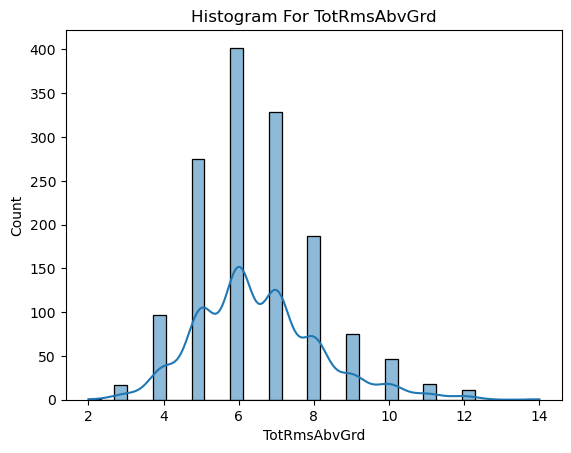

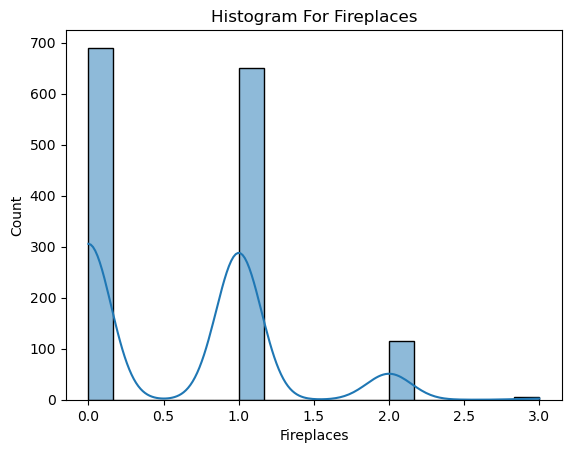

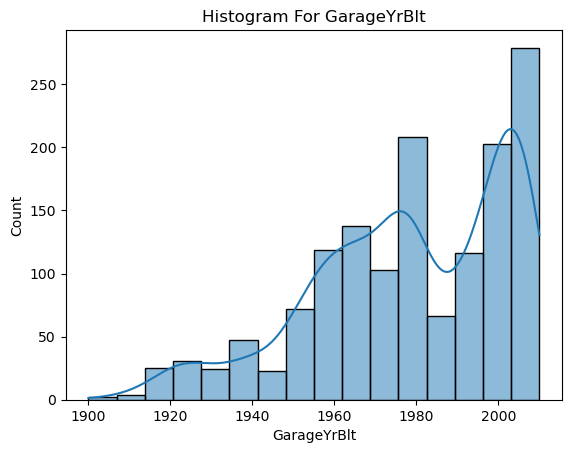

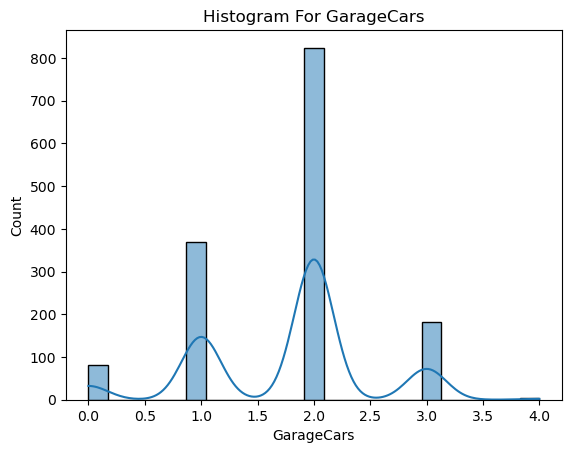

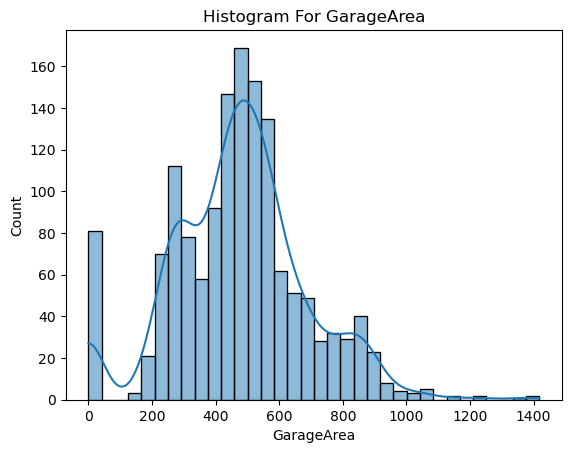

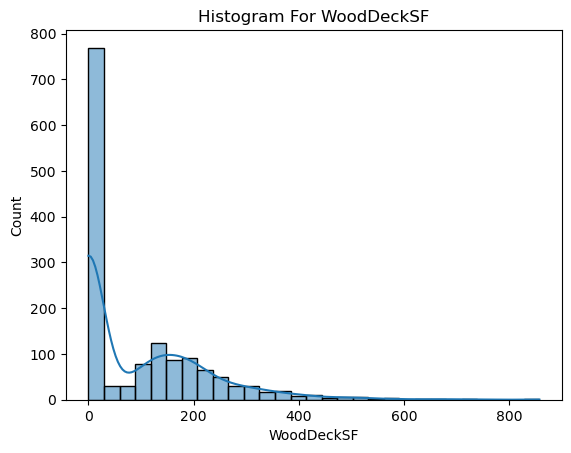

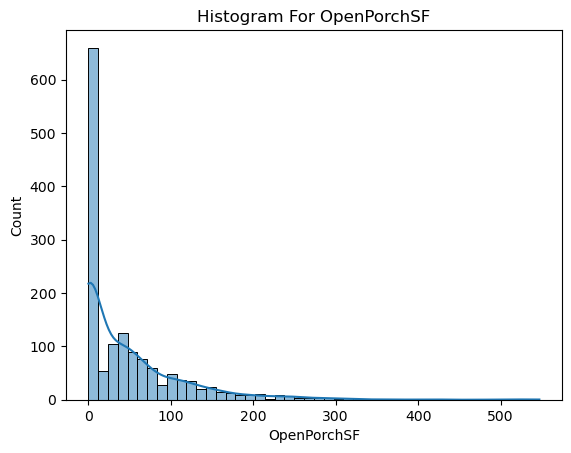

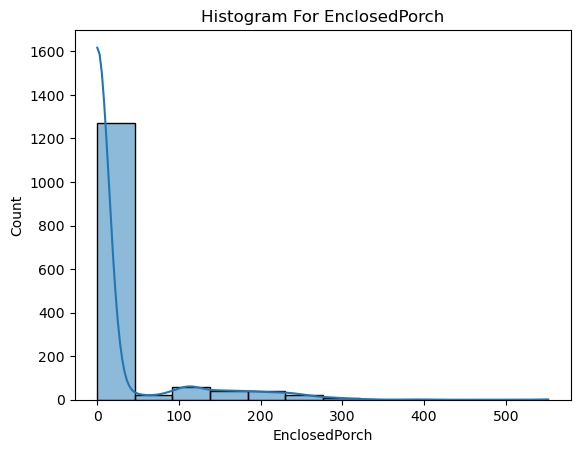

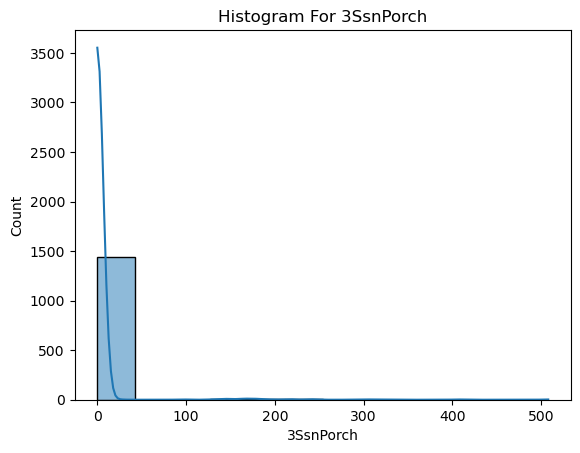

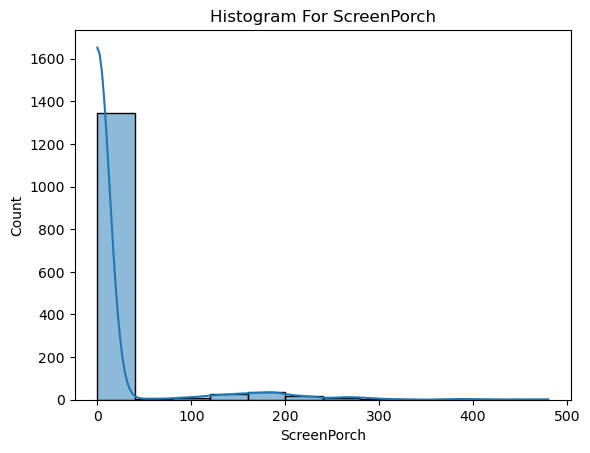

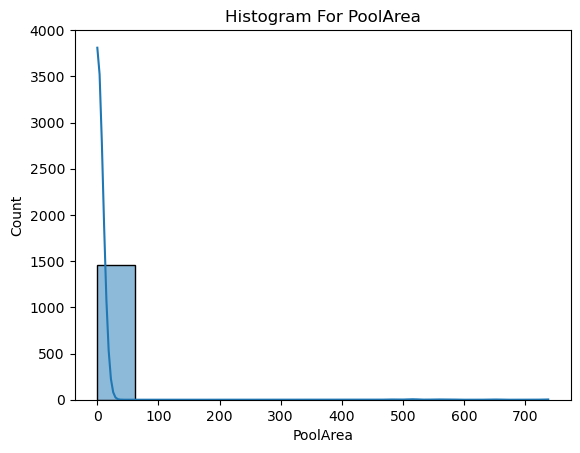

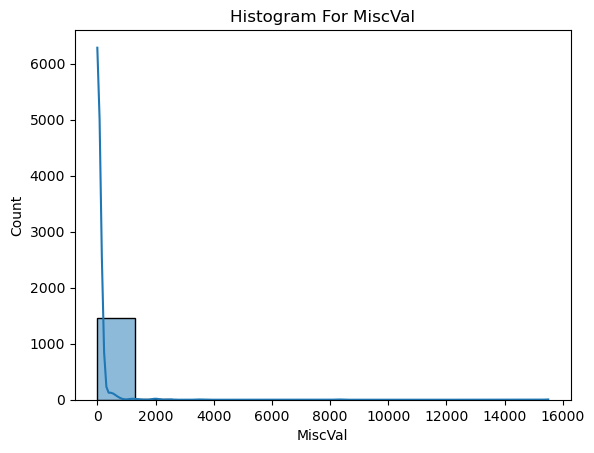

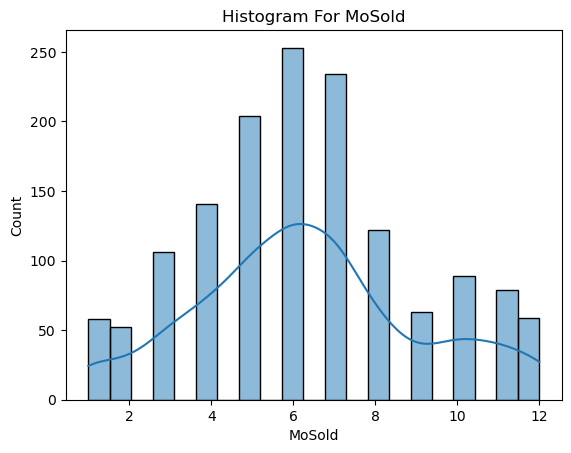

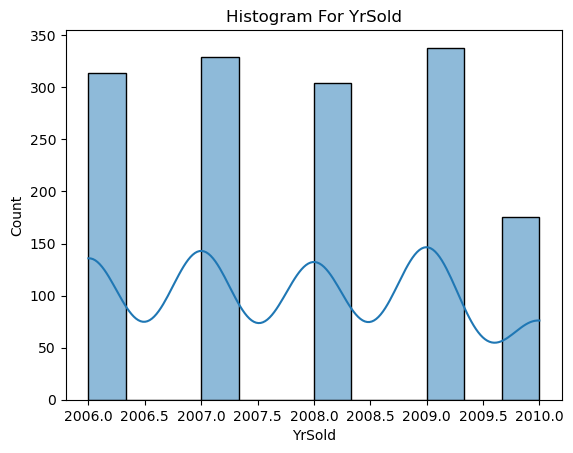

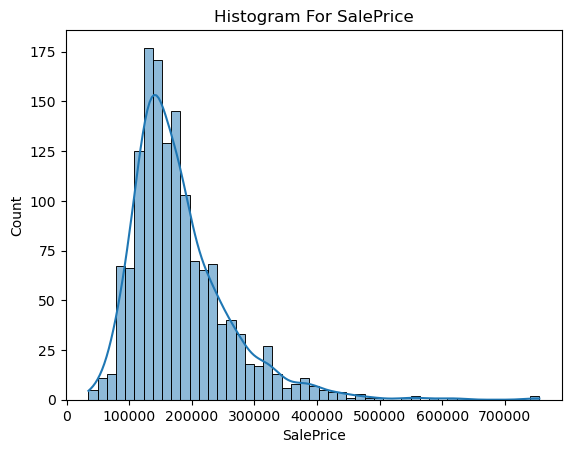

In [21]:
# Plot Histogram For Con Features

for i in con:
    sb.histplot(data=train,x=i, kde=True)
    plt.title(f'Histogram For {i}')
    plt.show()

In [22]:
# Correlation Heatmap

train[con].corr()

Id  MSSubClass  LotFrontage   LotArea  OverallQual  \
Id             1.000000    0.011156    -0.009601 -0.033226    -0.028365   
MSSubClass     0.011156    1.000000    -0.357056 -0.139781     0.032628   
LotFrontage   -0.009601   -0.357056     1.000000  0.306795     0.234196   
LotArea       -0.033226   -0.139781     0.306795  1.000000     0.105806   
OverallQual   -0.028365    0.032628     0.234196  0.105806     1.000000   
OverallCond    0.012609   -0.059316    -0.052820 -0.005636    -0.091932   
YearBuilt     -0.012713    0.027850     0.117598  0.014228     0.572323   
YearRemodAdd  -0.021998    0.040581     0.082746  0.013788     0.550684   
MasVnrArea    -0.050199    0.022895     0.179283  0.103960     0.410238   
BsmtFinSF1    -0.005024   -0.069836     0.215828  0.214103     0.239666   
BsmtFinSF2    -0.005968   -0.065649     0.043340  0.111170    -0.059119   
BsmtUnfSF     -0.007940   -0.140759     0.122156 -0.002618     0.308159   
TotalBsmtSF   -0.015415   -0.238518     0.363358  0.260833     0.537808   
1stFlrSF       0.010496   -0.251758     0.414266  0.299475     0.476224   
2ndFlrSF       0.005590    0.307886     0.072483  0.050986     0.295493   
LowQualFinSF  -0.044230    0.046474     0.036849  0.004779    -0.030429   
GrLivArea      0.008273    0.074853     0.368392  0.263116     0.593007   
BsmtFullBath   0.002289    0.003491     0.091481  0.158155     0.111098   
BsmtHalfBath  -0.020155   -0.002333    -0.006419  0.048046    -0.040150   
FullBath       0.005587    0.131608     0.180424  0.126031     0.550600   
HalfBath       0.006784    0.177354     0.048258  0.014259     0.273458   
BedroomAbvGr   0.037719   -0.023438     0.237023  0.119690     0.101676   
KitchenAbvGr   0.002951    0.281721    -0.005805 -0.017784    -0.183882   
TotRmsAbvGrd   0.027239    0.040380     0.320146  0.190015     0.427452   
Fireplaces    -0.019772   -0.045569     0.235755  0.271364     0.396765   
GarageYrBlt    0.000070    0.080187     0.064324 -0.024812     0.518018   
GarageCars     0.016570   -0.040110     0.269729  0.154871     0.600671   
GarageArea     0.017634   -0.098672     0.323663  0.180403     0.562022   
WoodDeckSF    -0.029643   -0.012579     0.077106  0.171698     0.238923   
OpenPorchSF   -0.000477   -0.006100     0.137454  0.084774     0.308819   
EnclosedPorch  0.002889   -0.012037     0.009790 -0.018340    -0.113937   
3SsnPorch     -0.046635   -0.043825     0.062335  0.020423     0.030371   
ScreenPorch    0.001330   -0.026030     0.037684  0.043160     0.064886   
PoolArea       0.057044    0.008283     0.180868  0.077672     0.065166   
MiscVal       -0.006242   -0.007683     0.001168  0.038068    -0.031406   
MoSold         0.021172   -0.013585     0.010158  0.001205     0.070815   
YrSold         0.000712   -0.021407     0.006768 -0.014261    -0.027347   
SalePrice     -0.021917   -0.084284     0.334901  0.263843     0.790982   

               OverallCond  YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  \
Id                0.012609  -0.012713     -0.021998   -0.050199   -0.005024   
MSSubClass       -0.059316   0.027850      0.040581    0.022895   -0.069836   
LotFrontage      -0.052820   0.117598      0.082746    0.179283    0.215828   
LotArea          -0.005636   0.014228      0.013788    0.103960    0.214103   
OverallQual      -0.091932   0.572323      0.550684    0.410238    0.239666   
OverallCond       1.000000  -0.375983      0.073741   -0.127788   -0.046231   
YearBuilt        -0.375983   1.000000      0.592855    0.314745    0.249503   
YearRemodAdd      0.073741   0.592855      1.000000    0.179186    0.128451   
MasVnrArea       -0.127788   0.314745      0.179186    1.000000    0.263582   
BsmtFinSF1       -0.046231   0.249503      0.128451    0.263582    1.000000   
BsmtFinSF2        0.040229  -0.049107     -0.067759   -0.072302   -0.050117   
BsmtUnfSF        -0.136841   0.149040      0.181133    0.114184   -0.495251   
TotalBsmtSF      -0.171098   0.391452      0.291066    0.362452    0

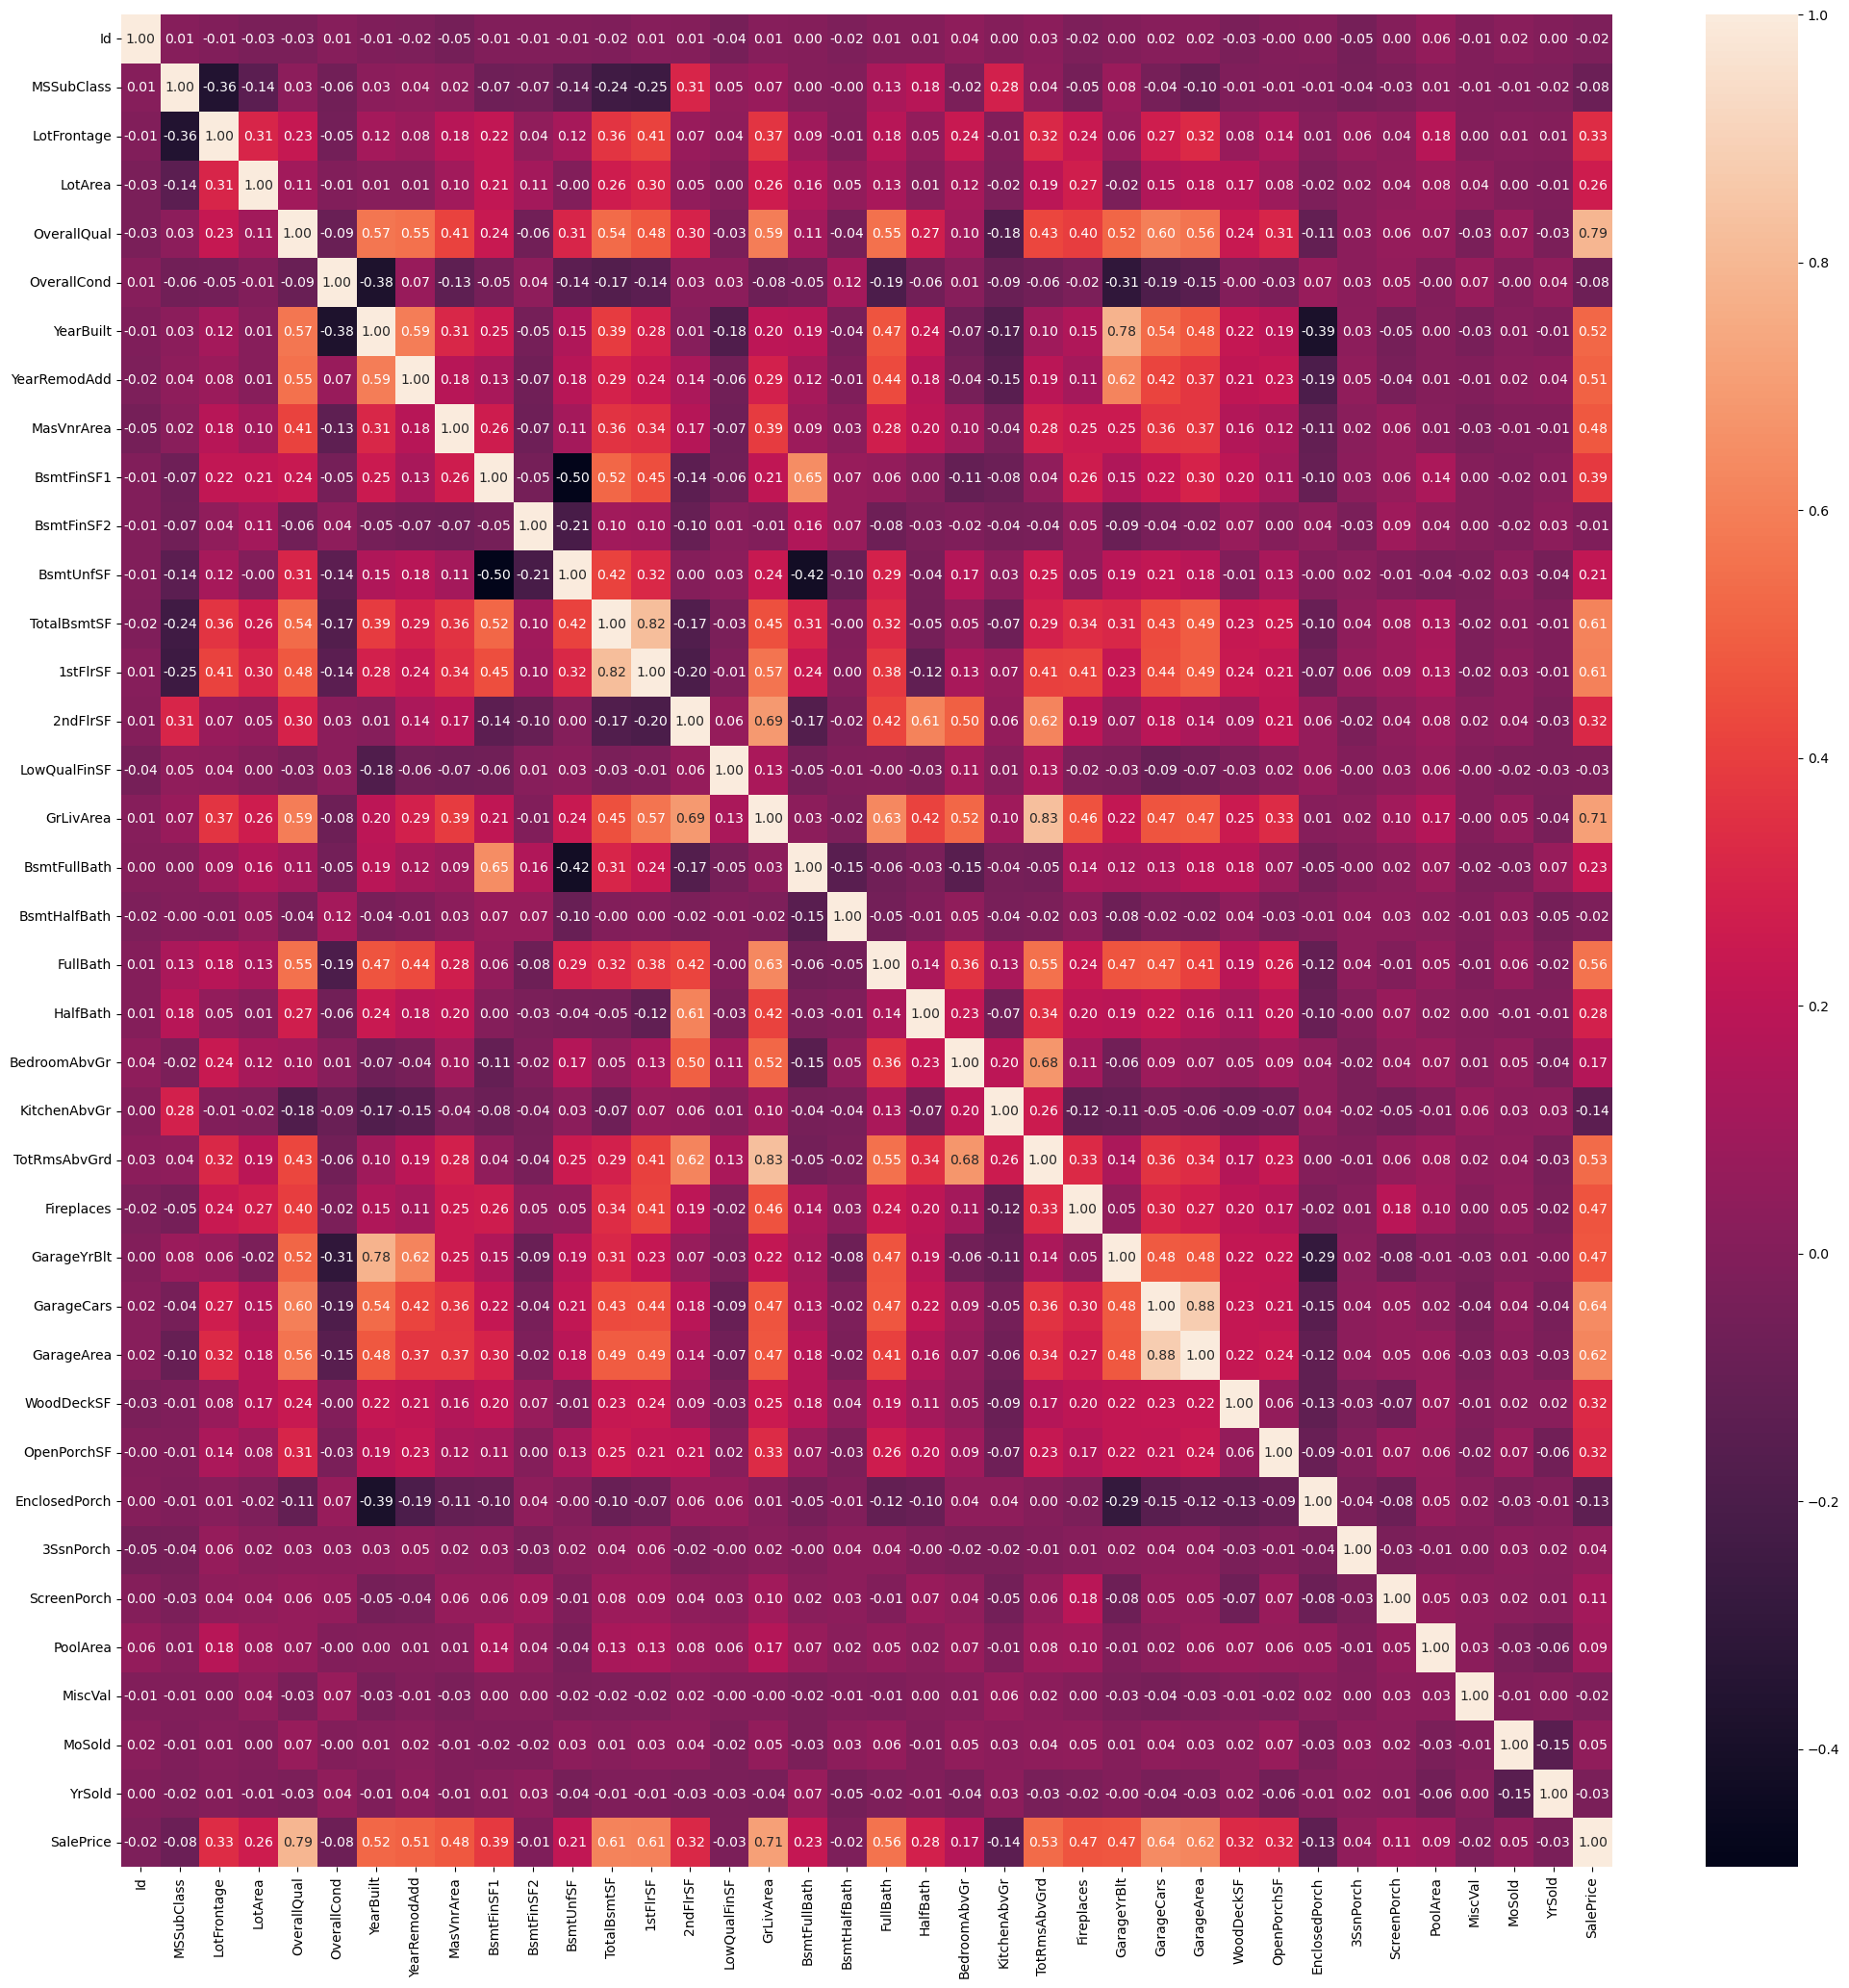

In [23]:
plt.figure(figsize=(25,25))
sb.heatmap(train[con].corr(), annot=True, fmt='.2f')
plt.show()

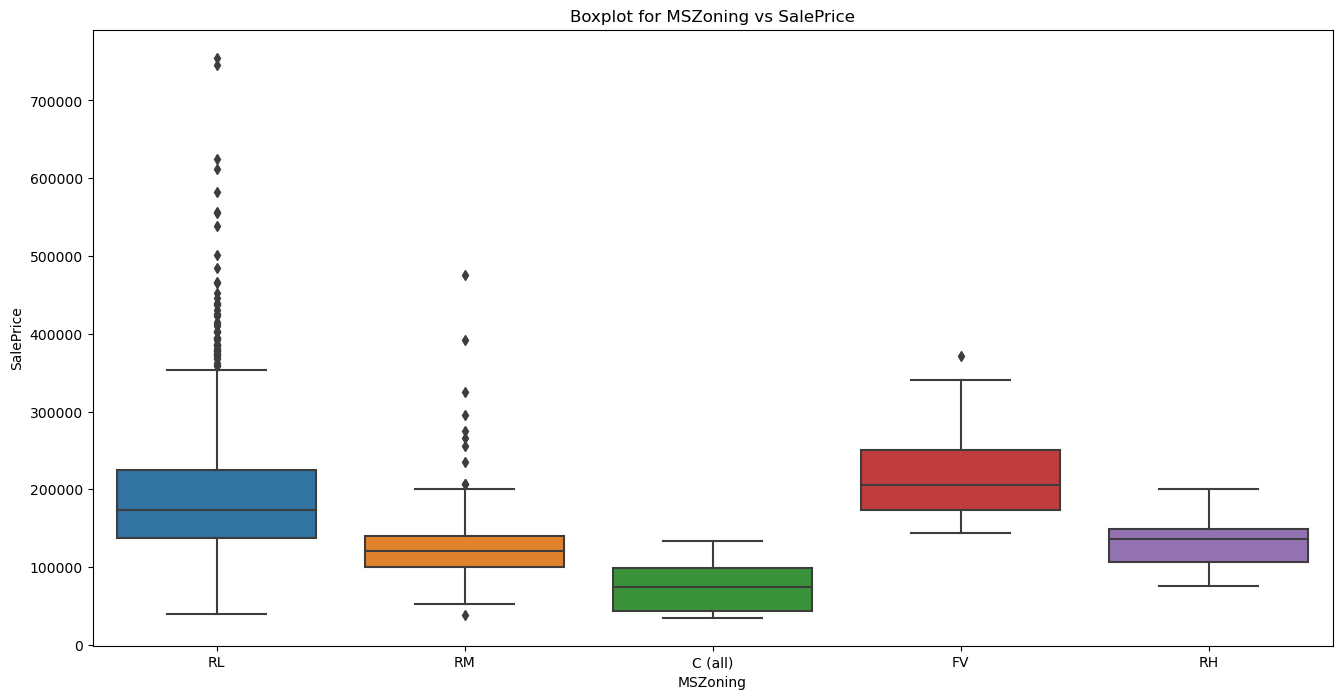

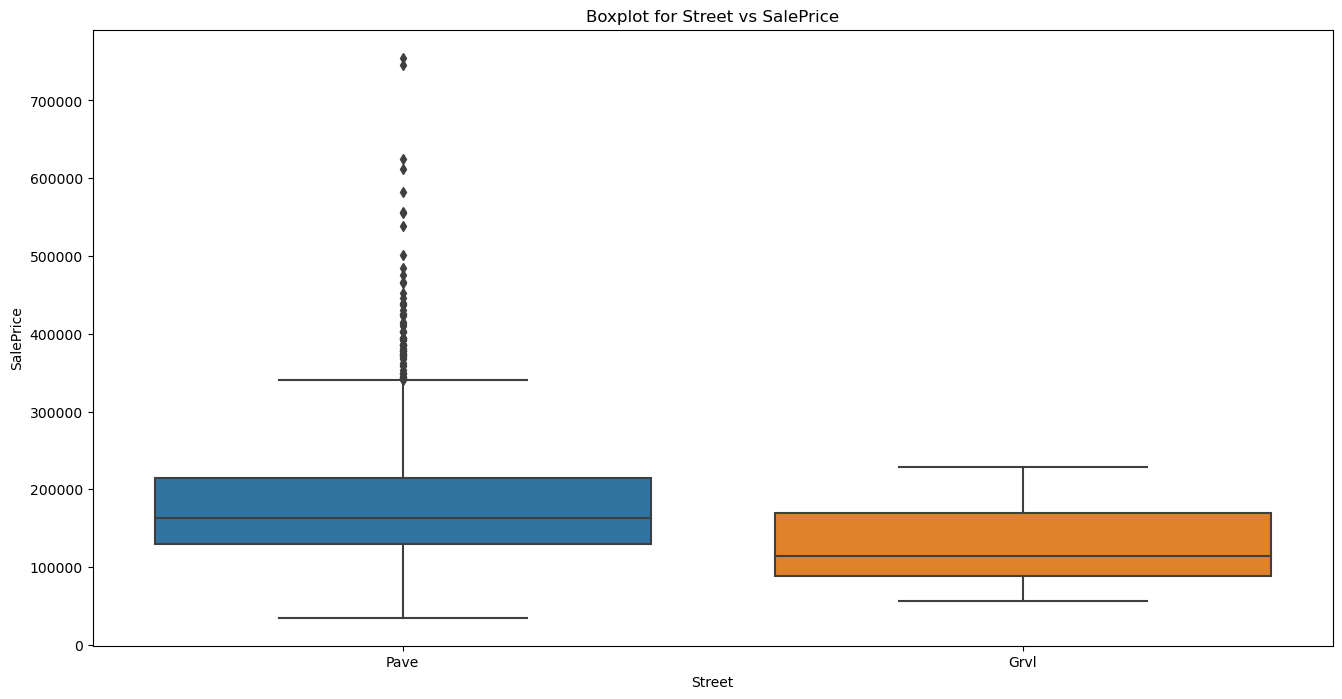

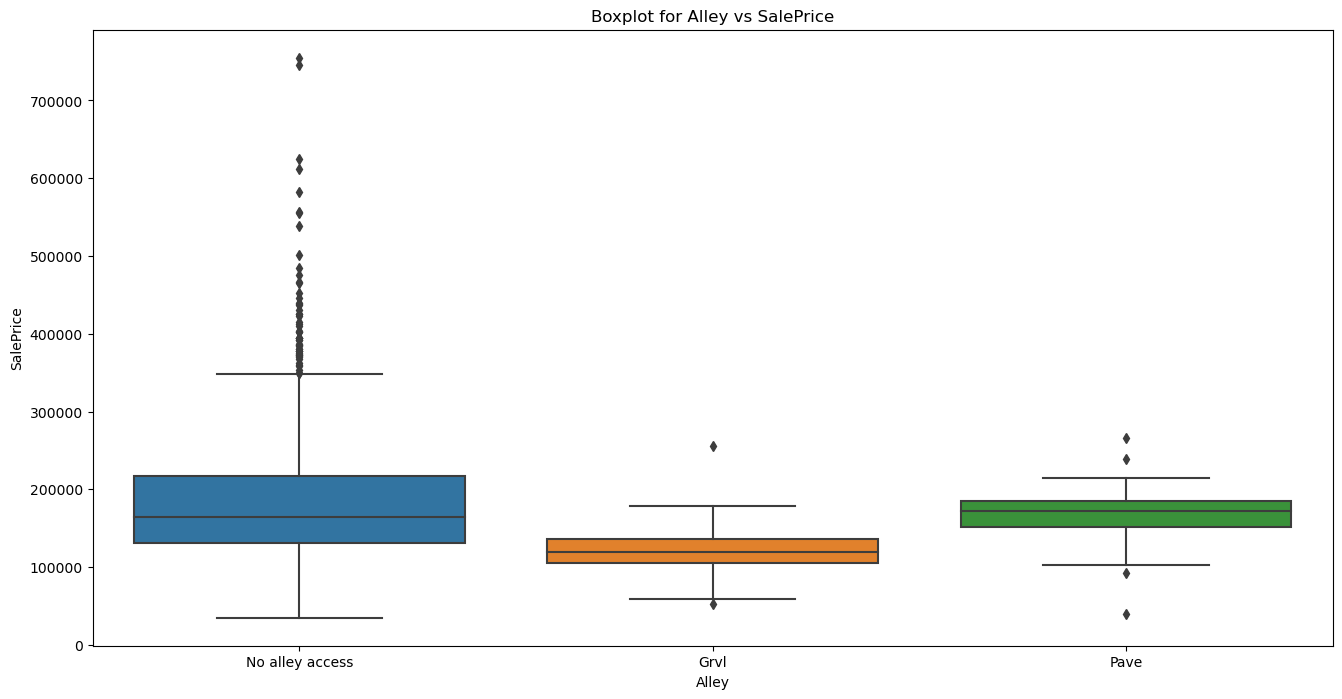

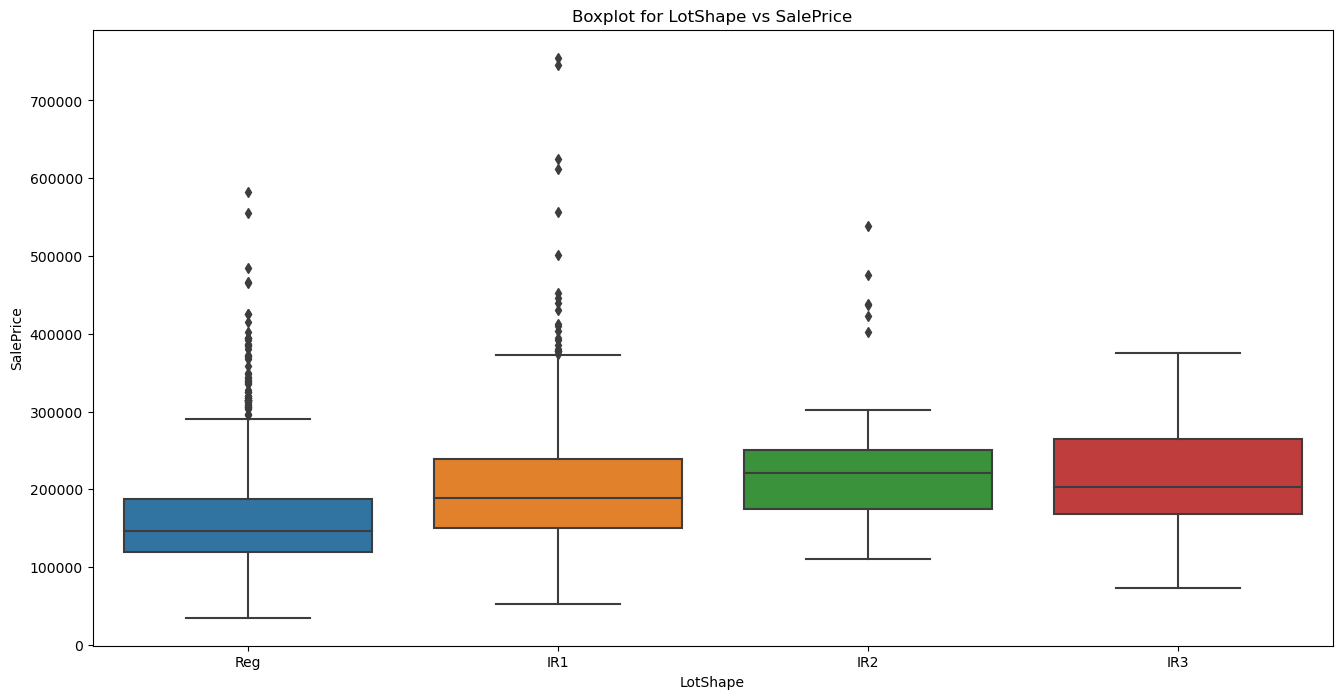

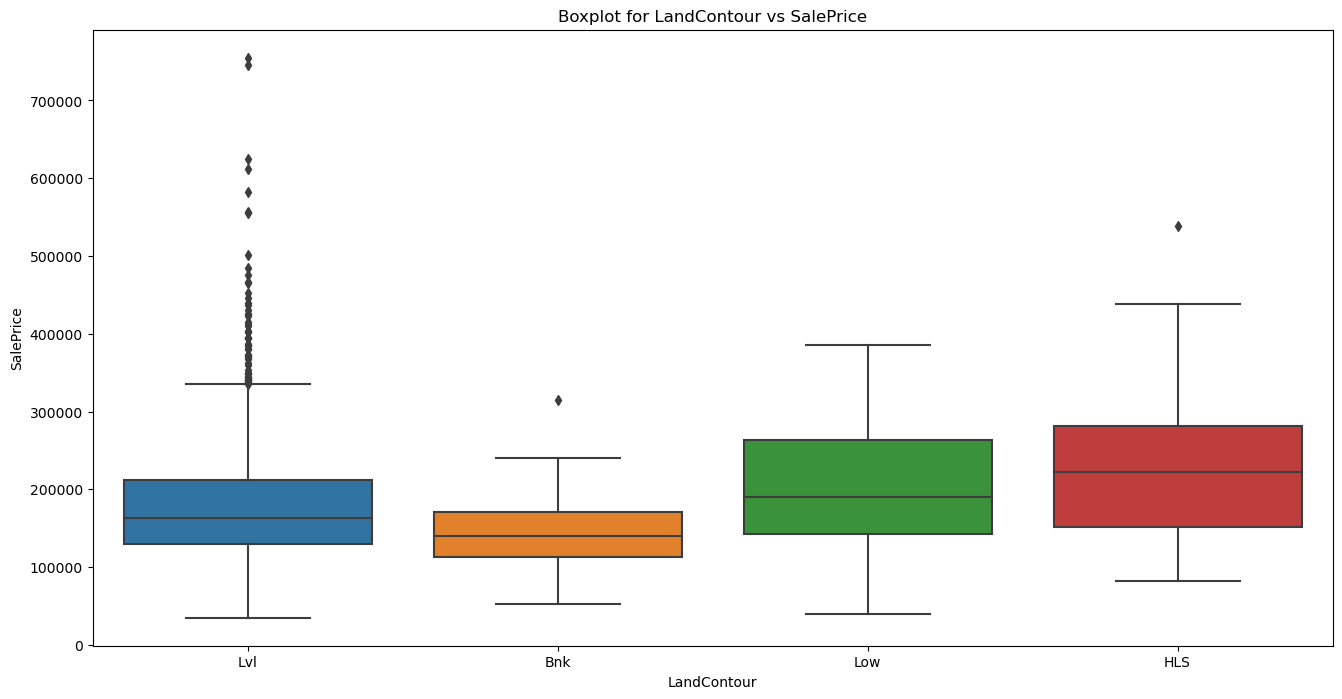

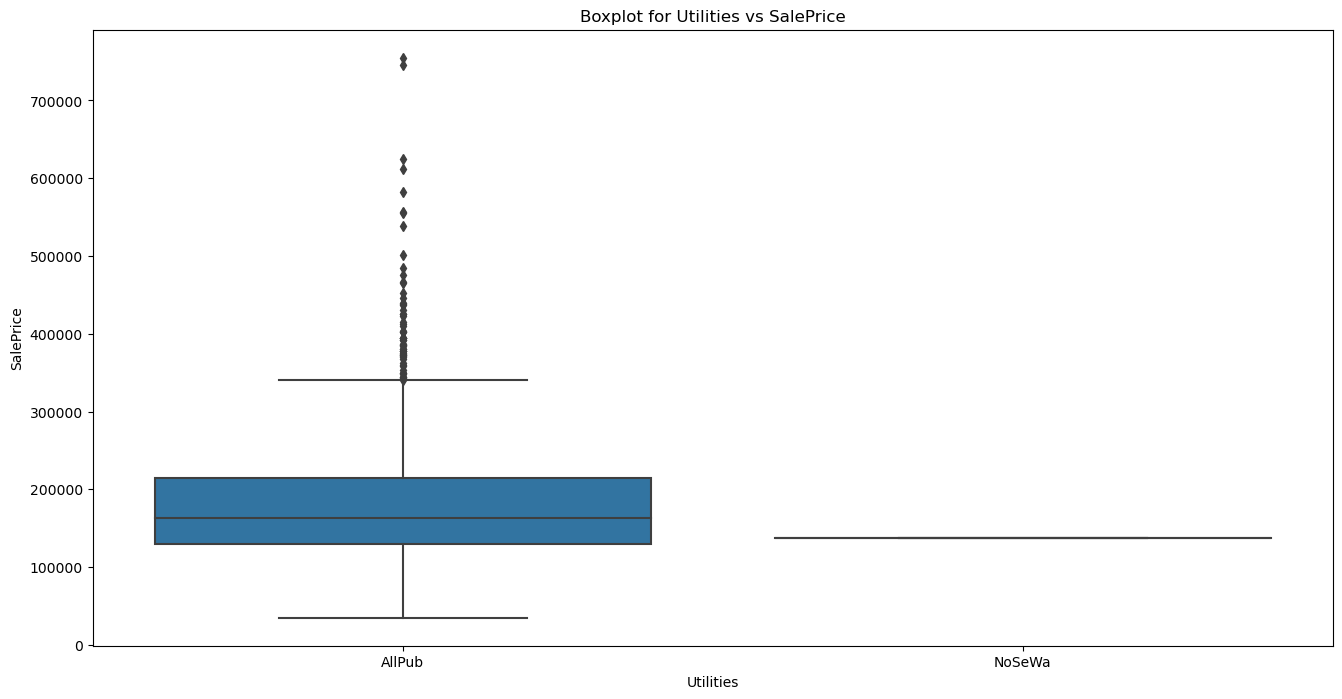

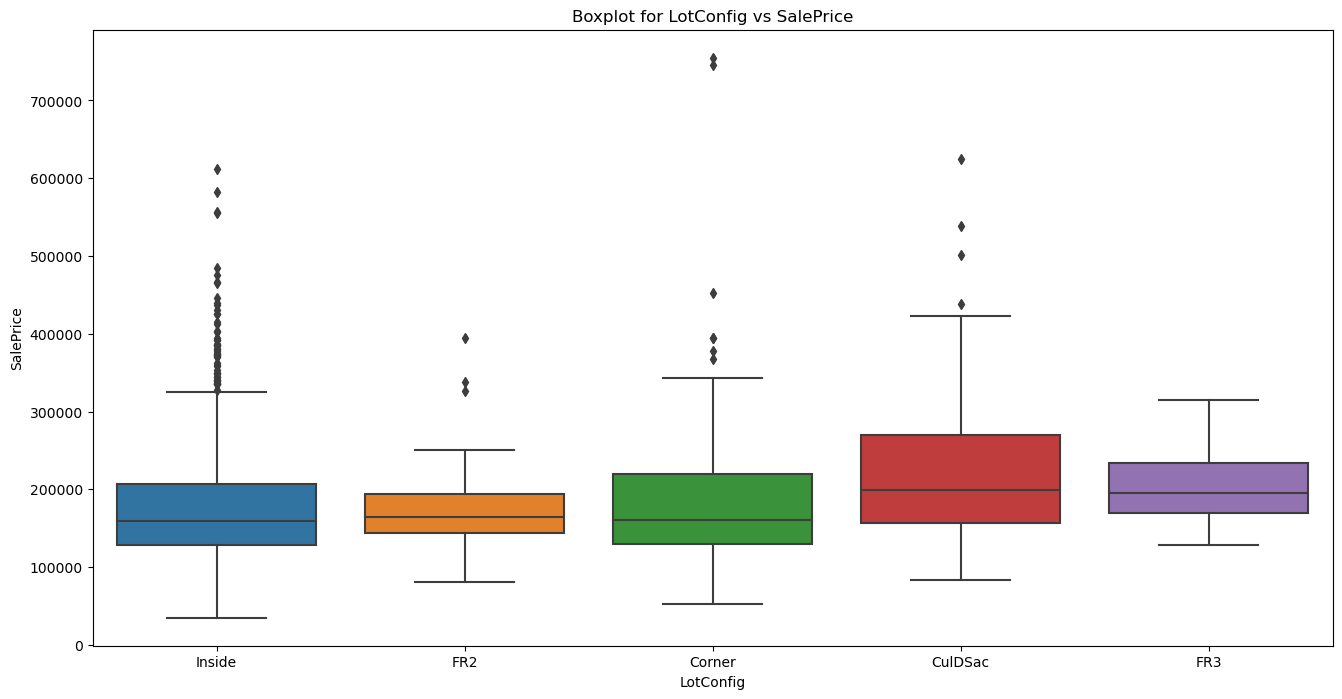

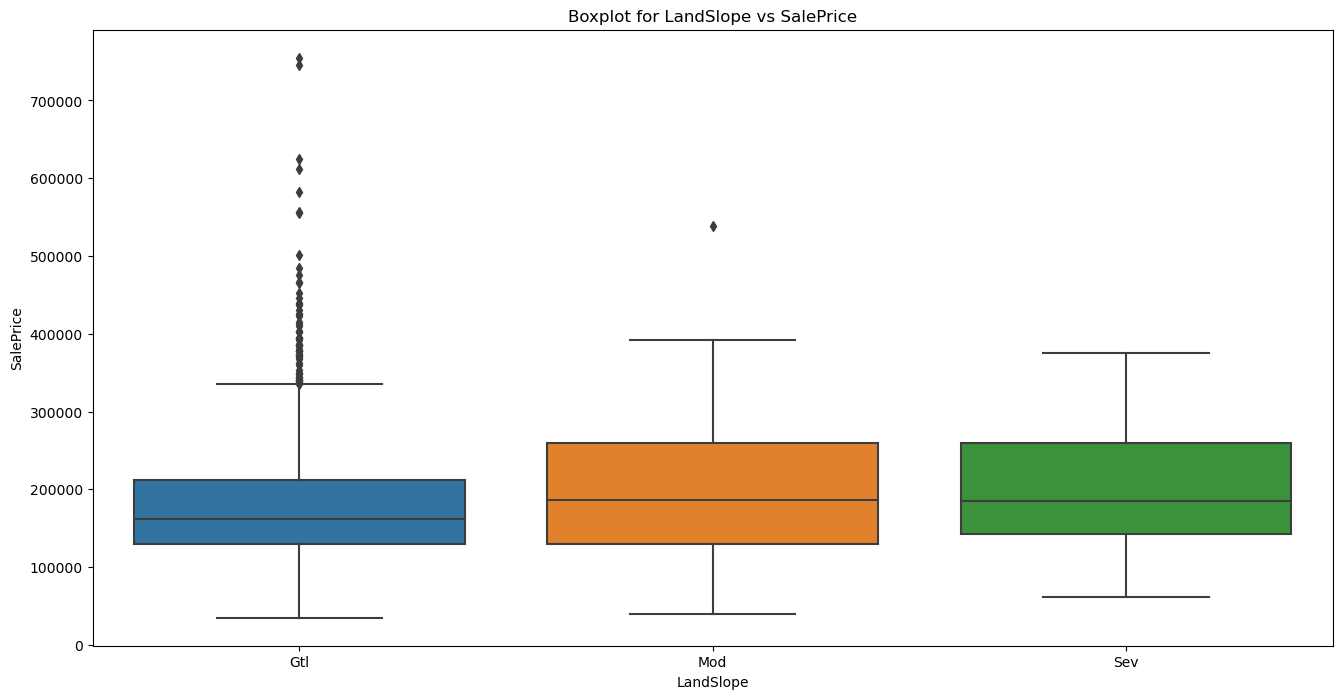

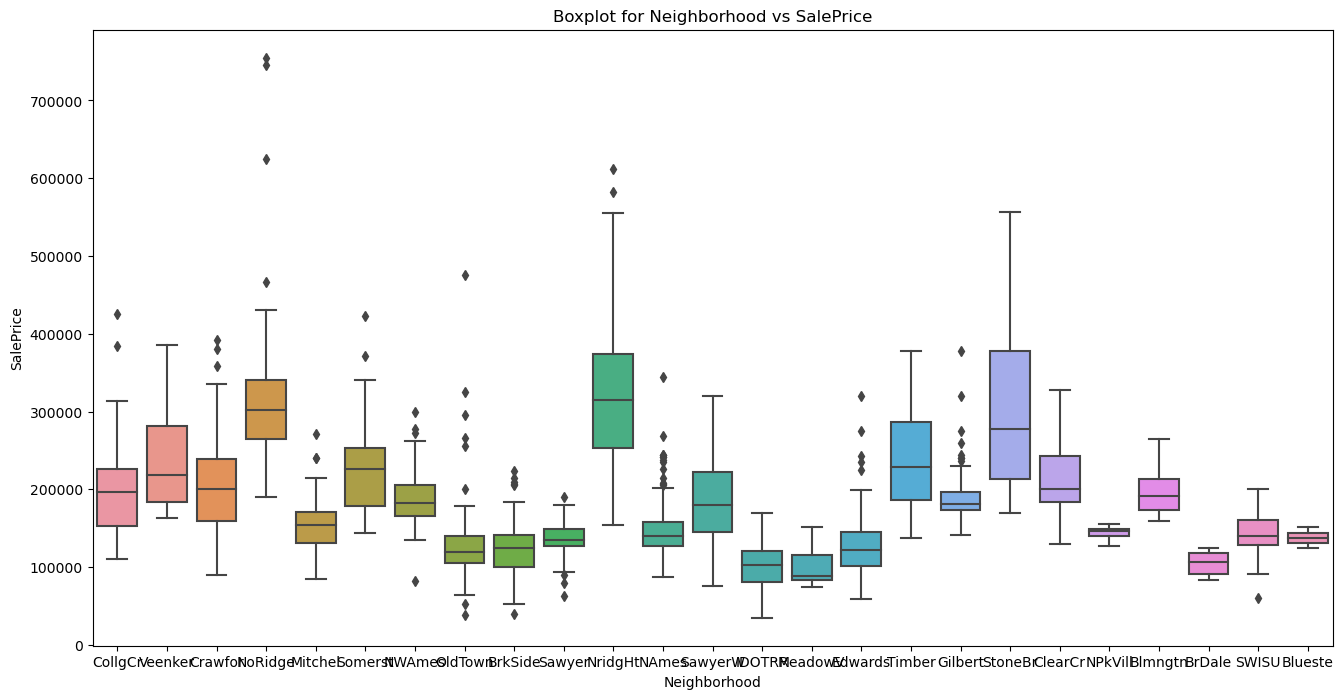

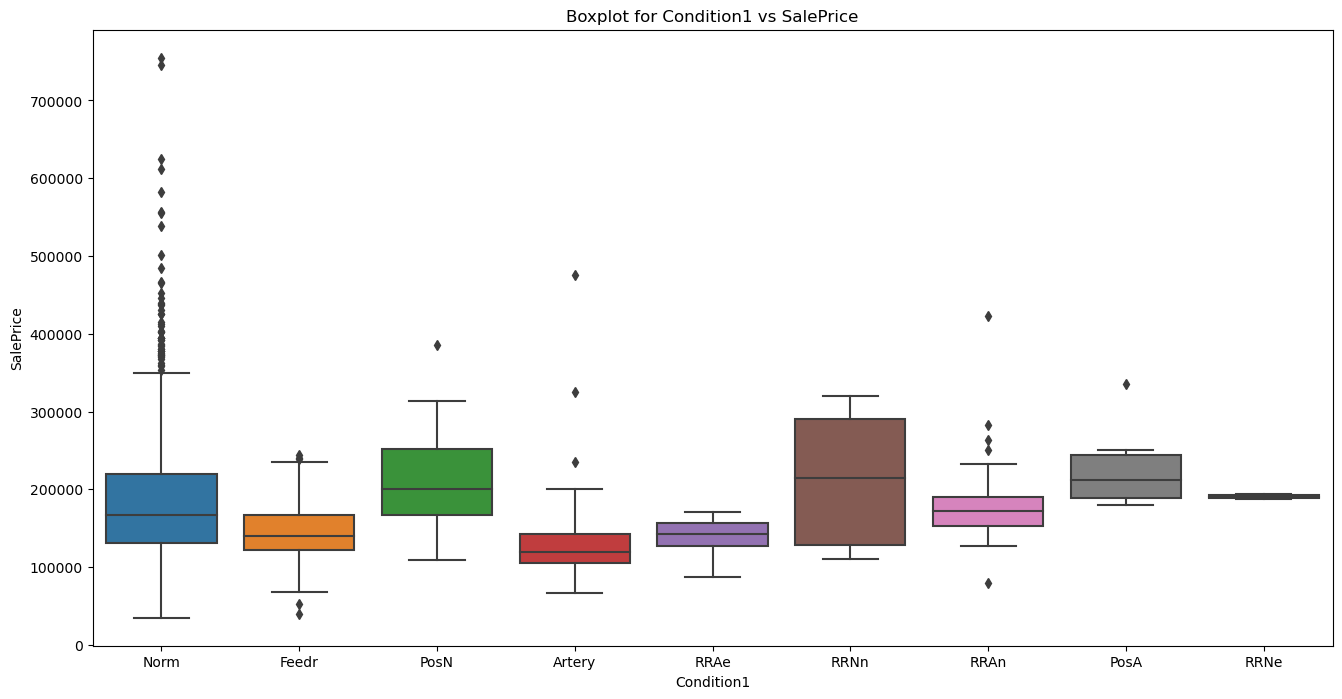

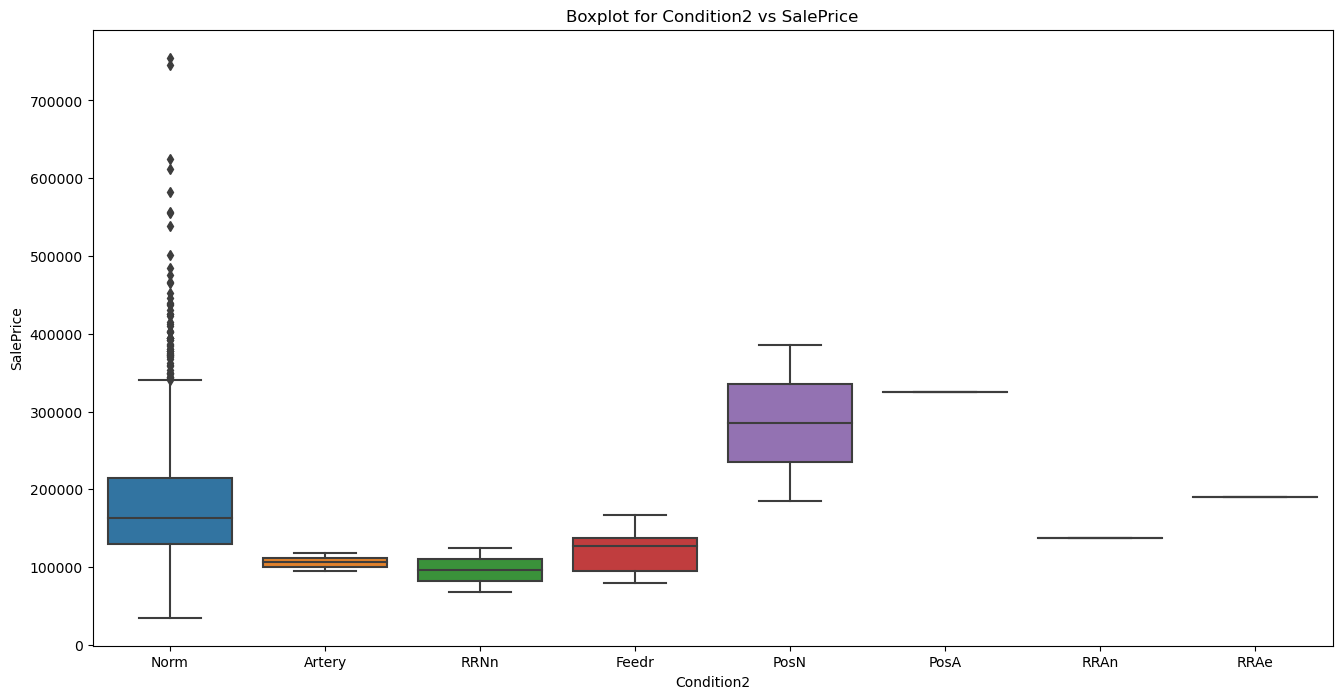

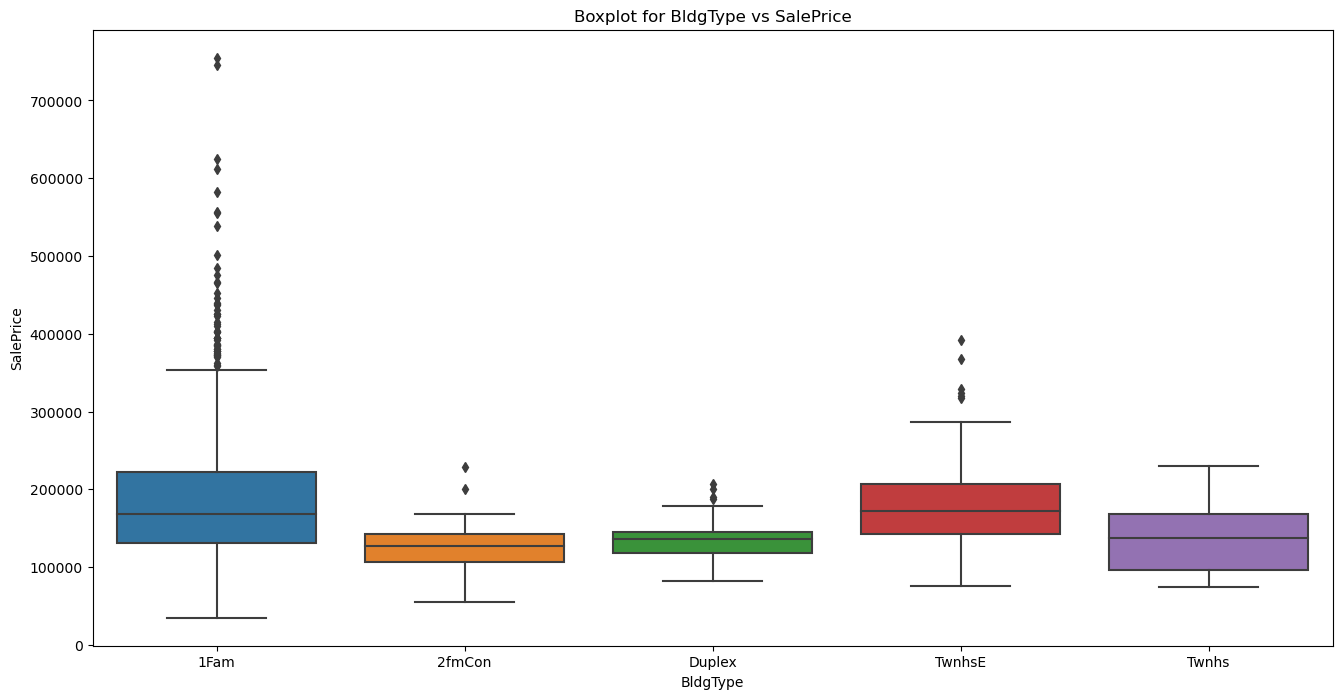

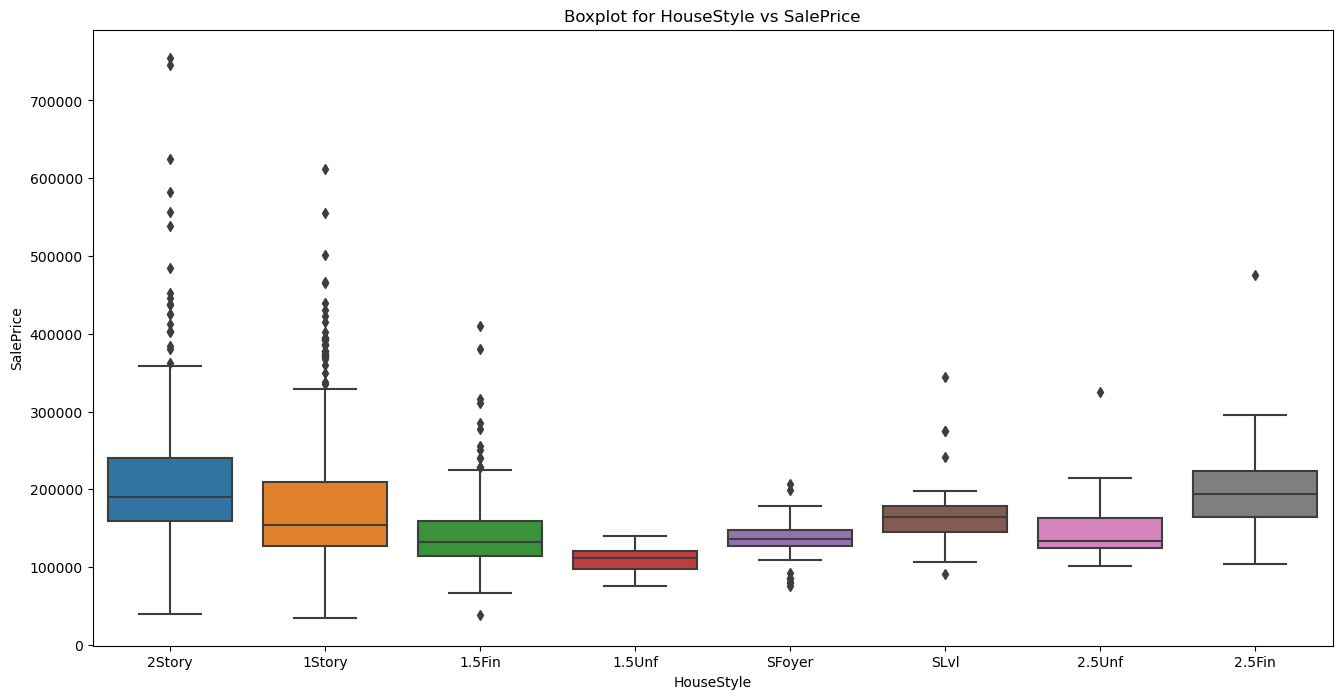

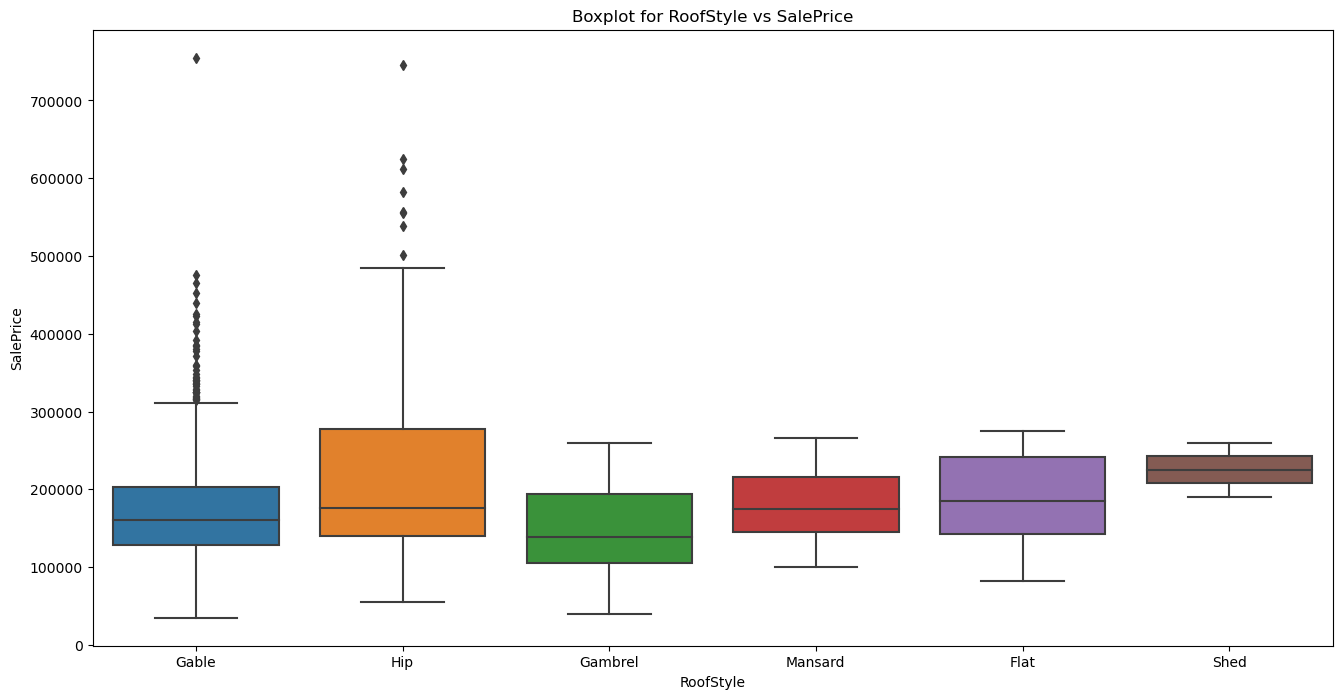

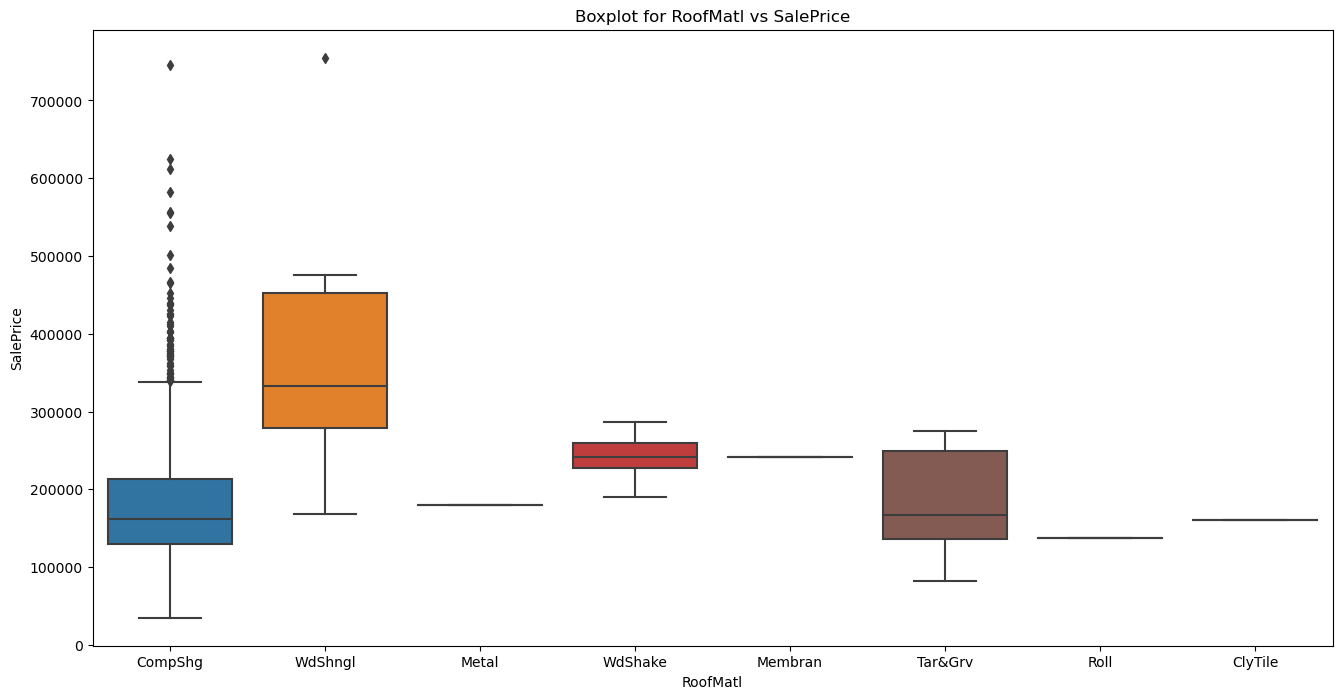

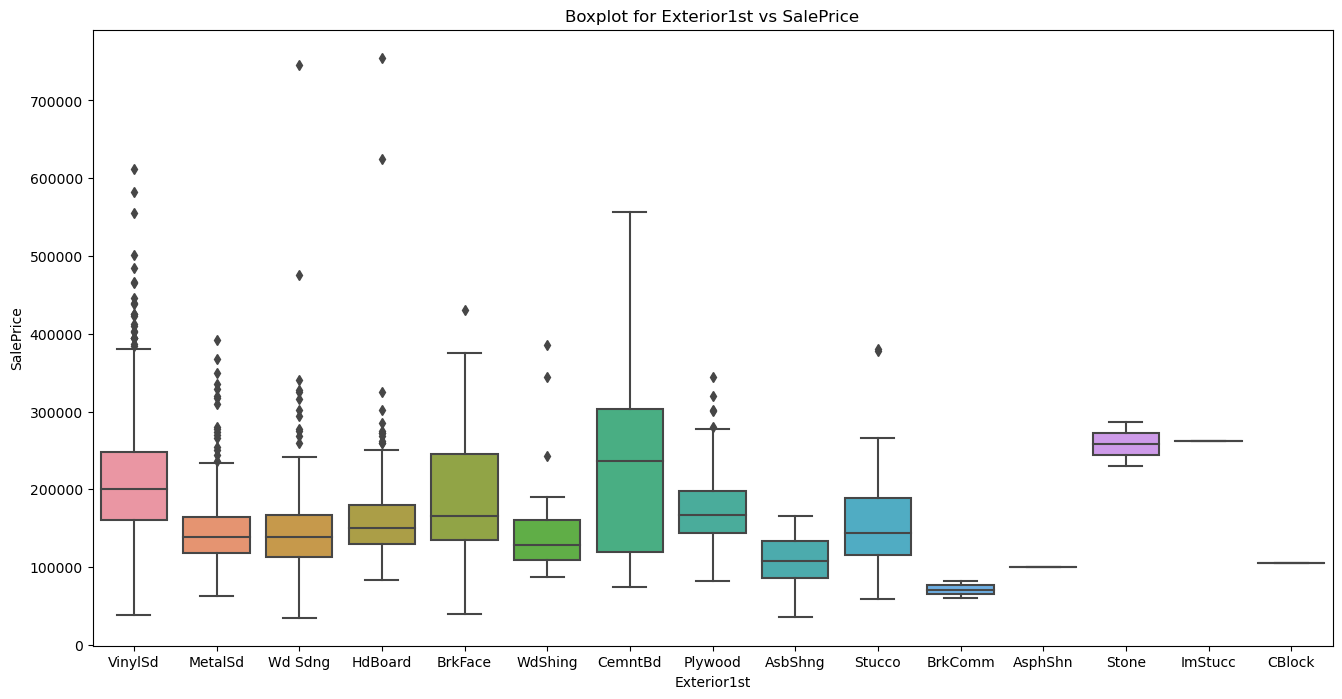

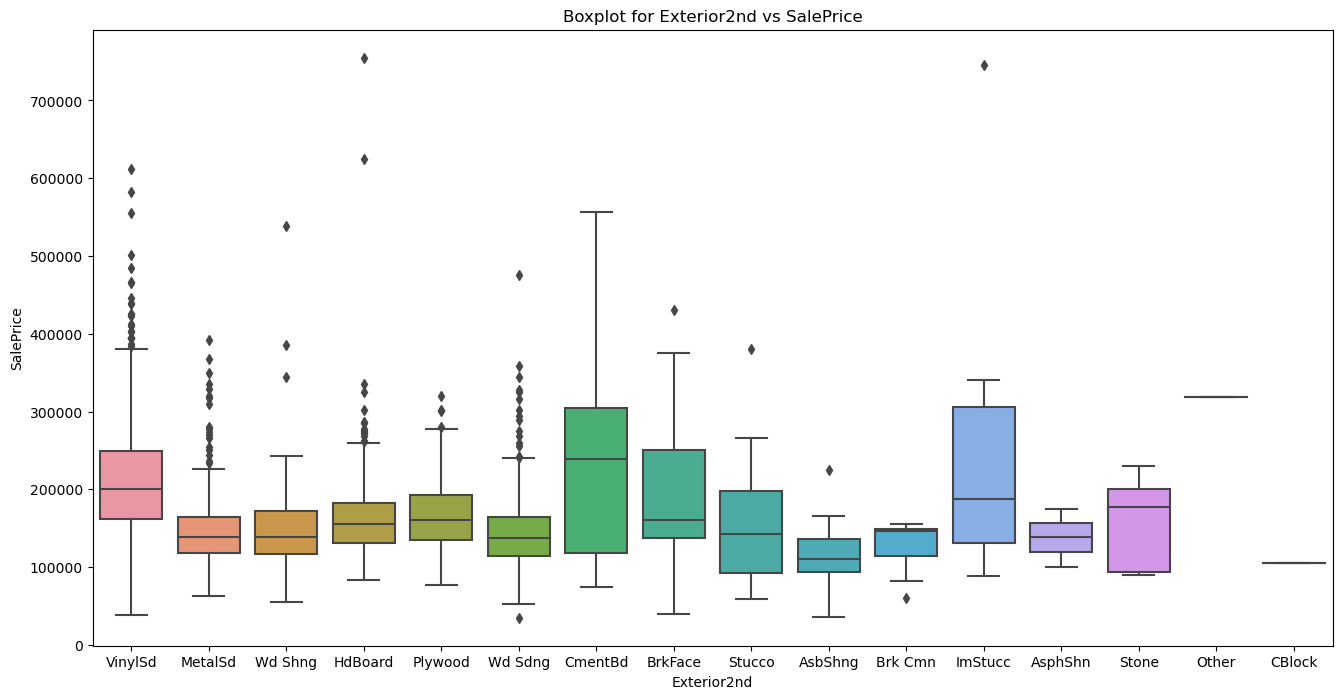

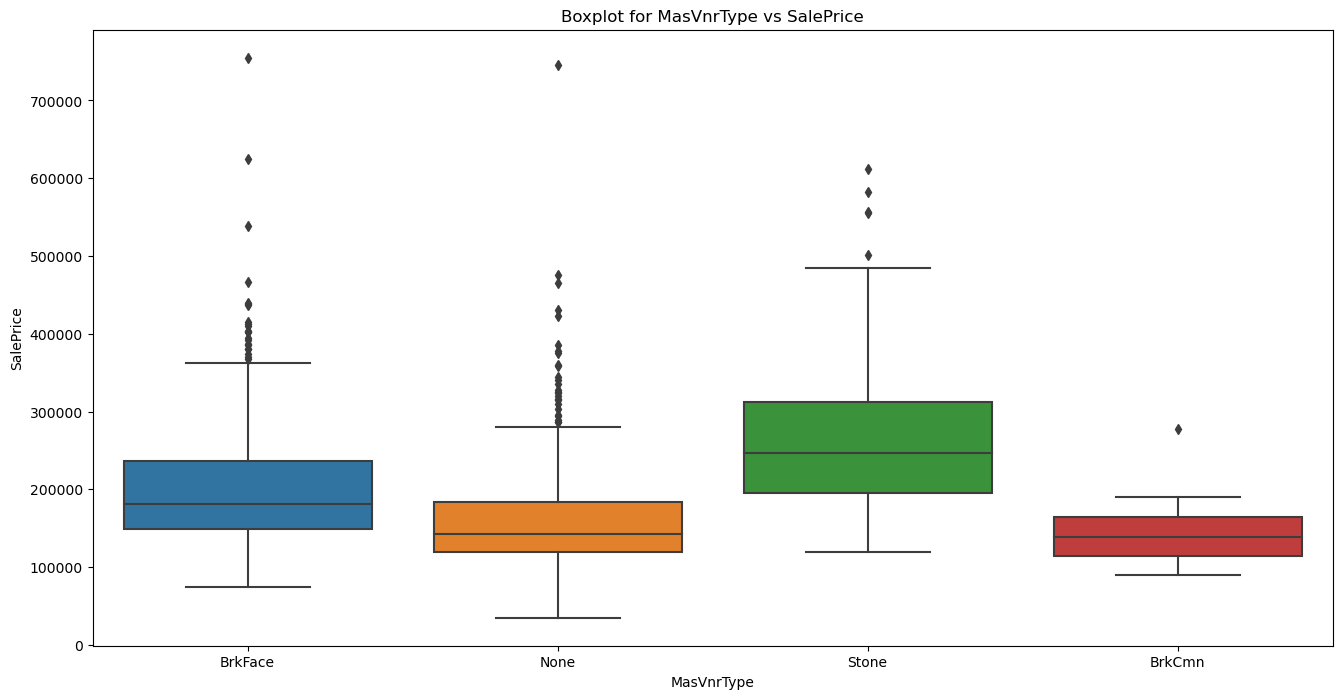

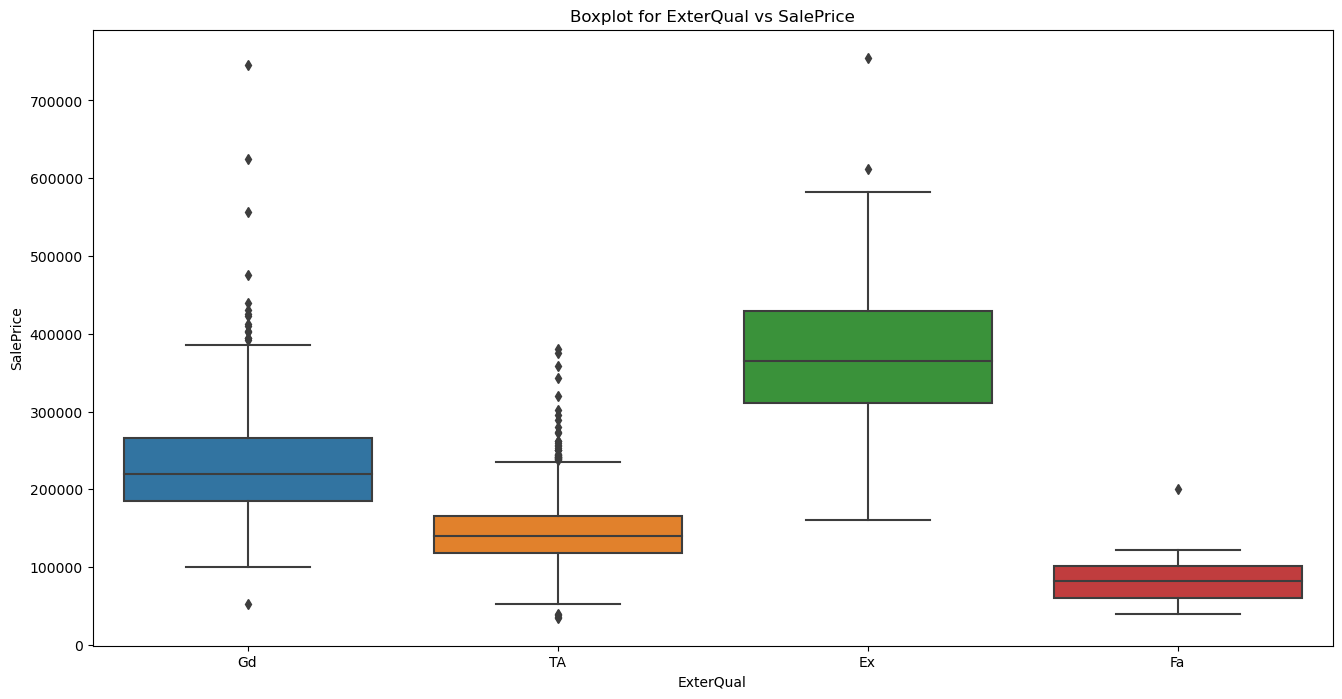

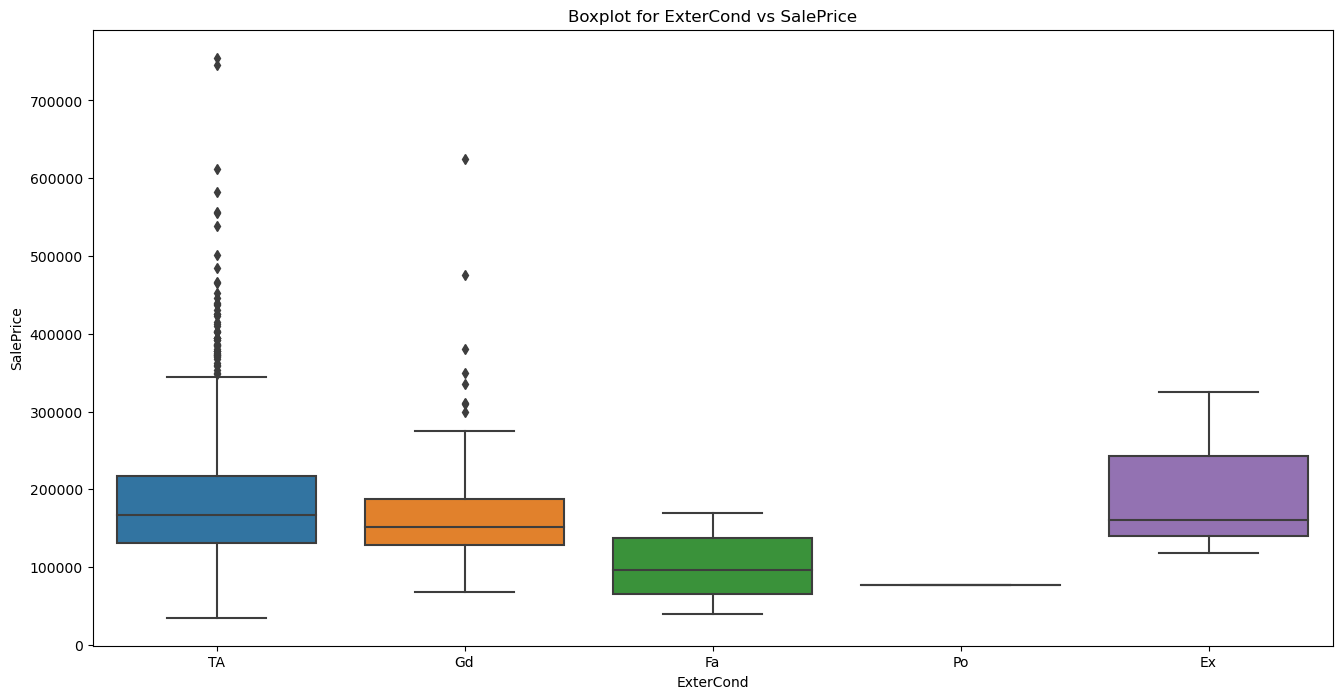

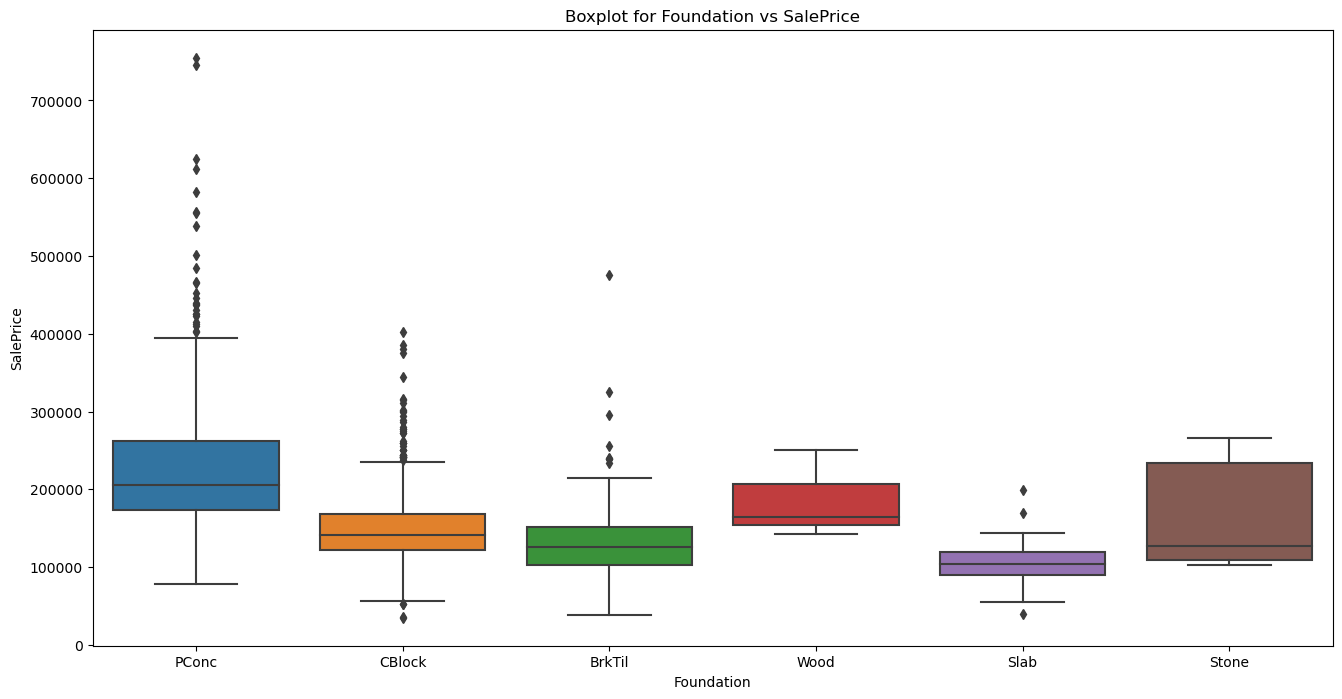

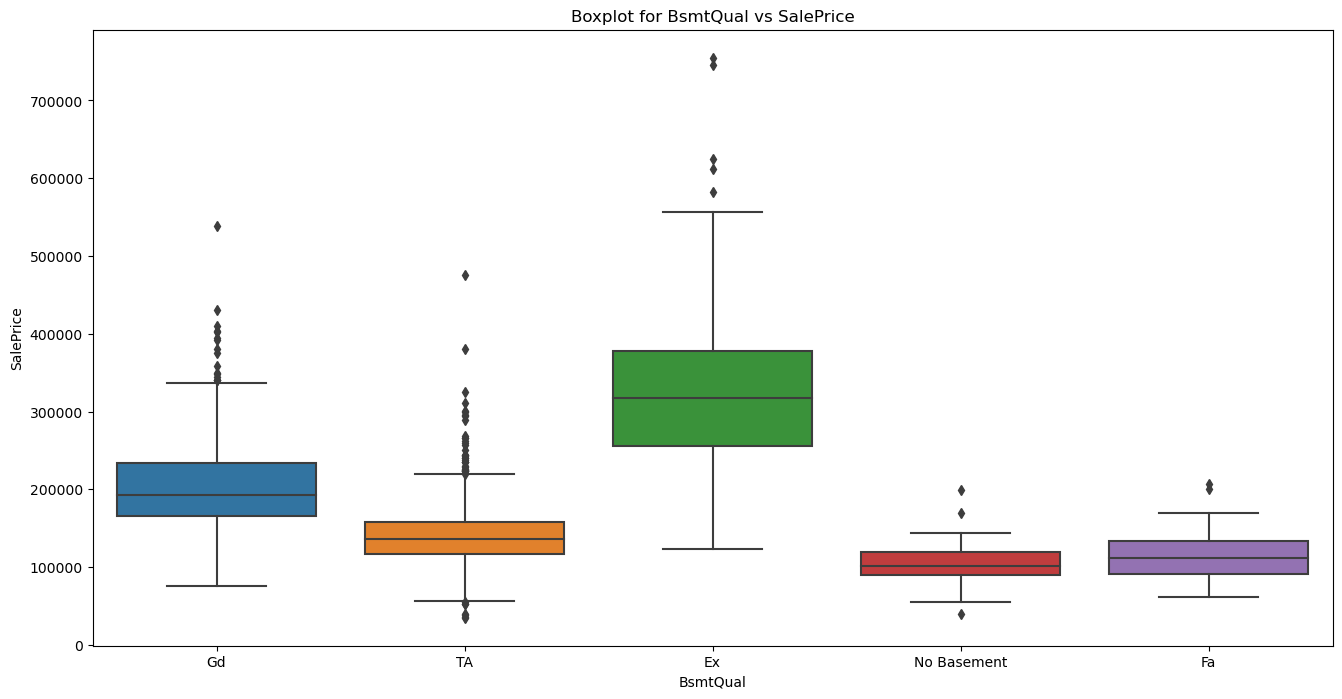

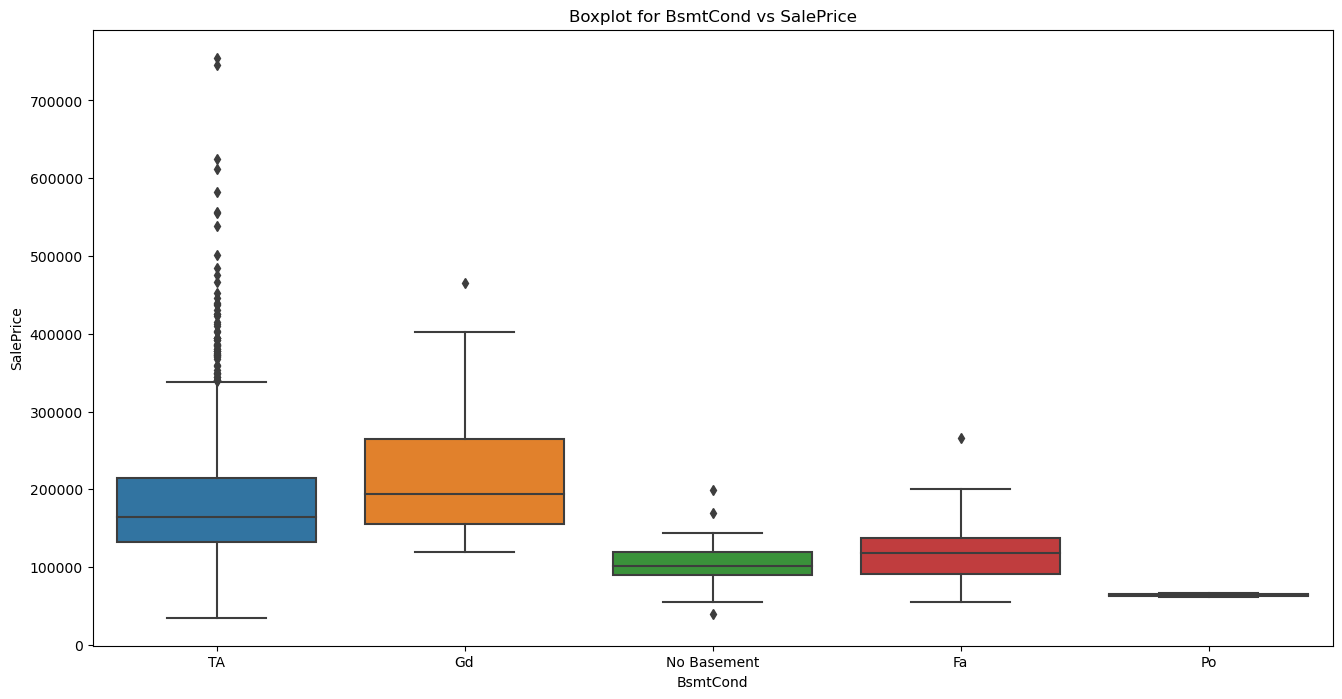

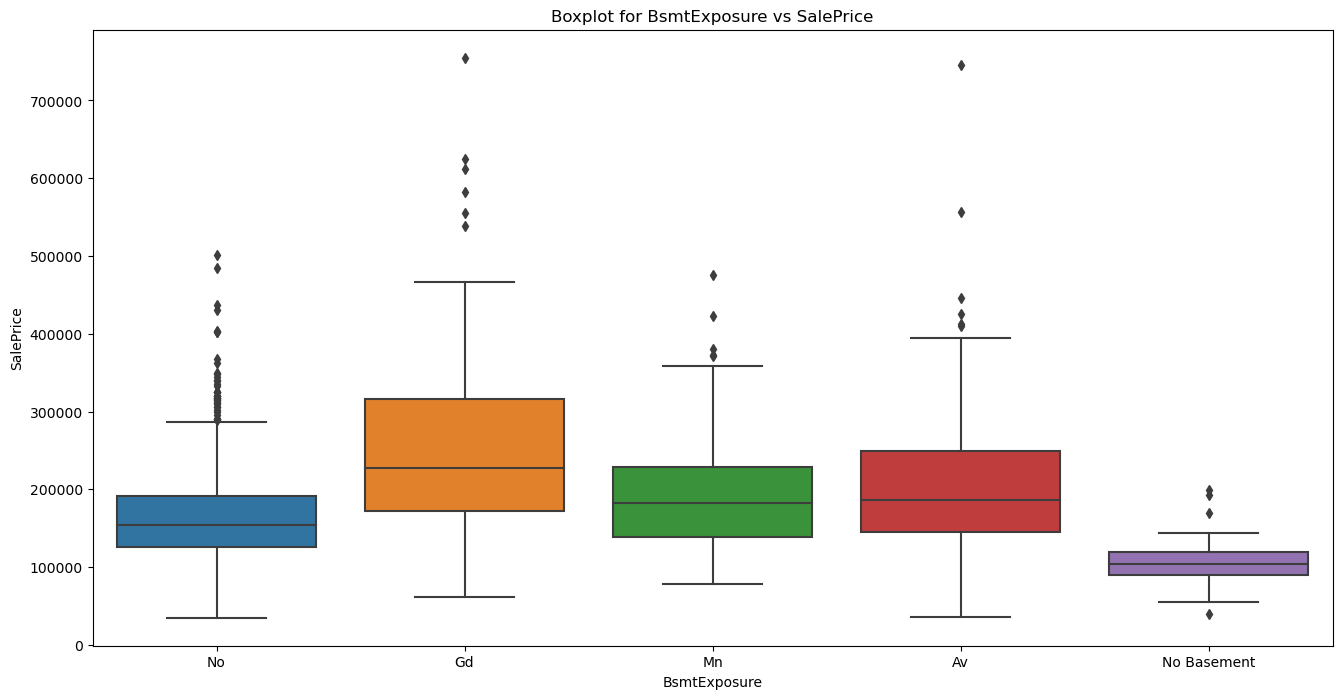

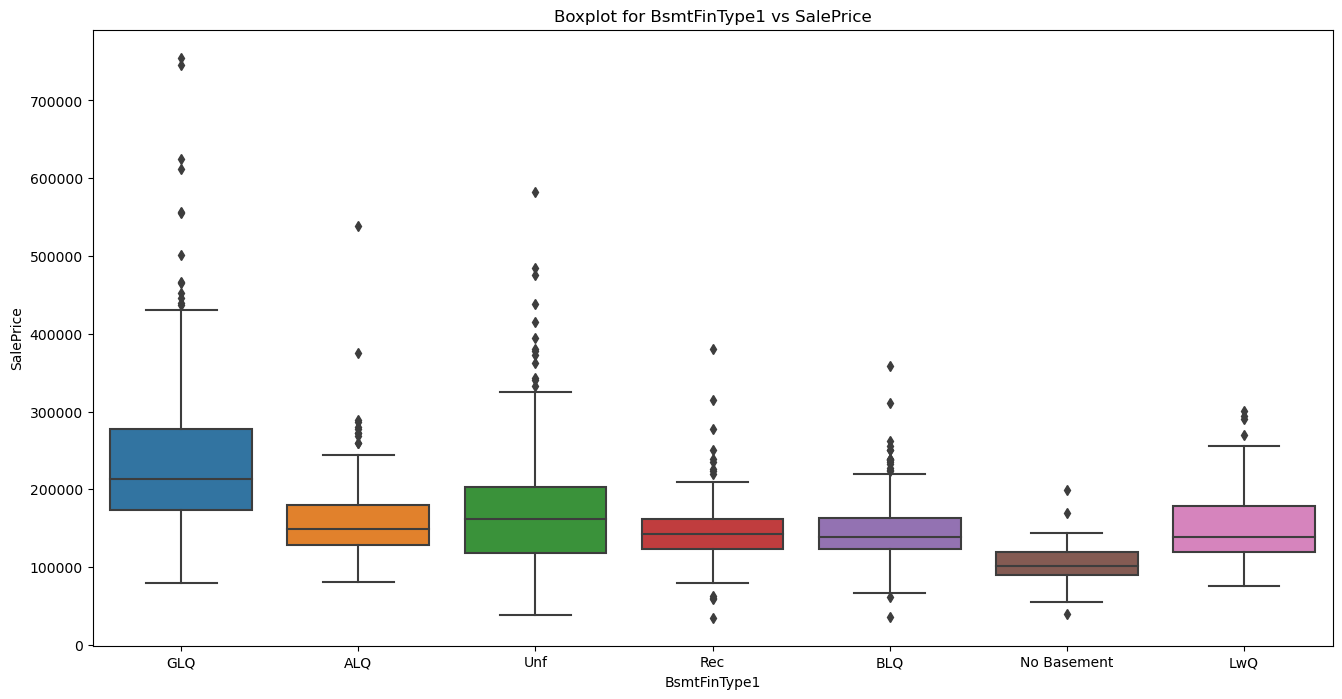

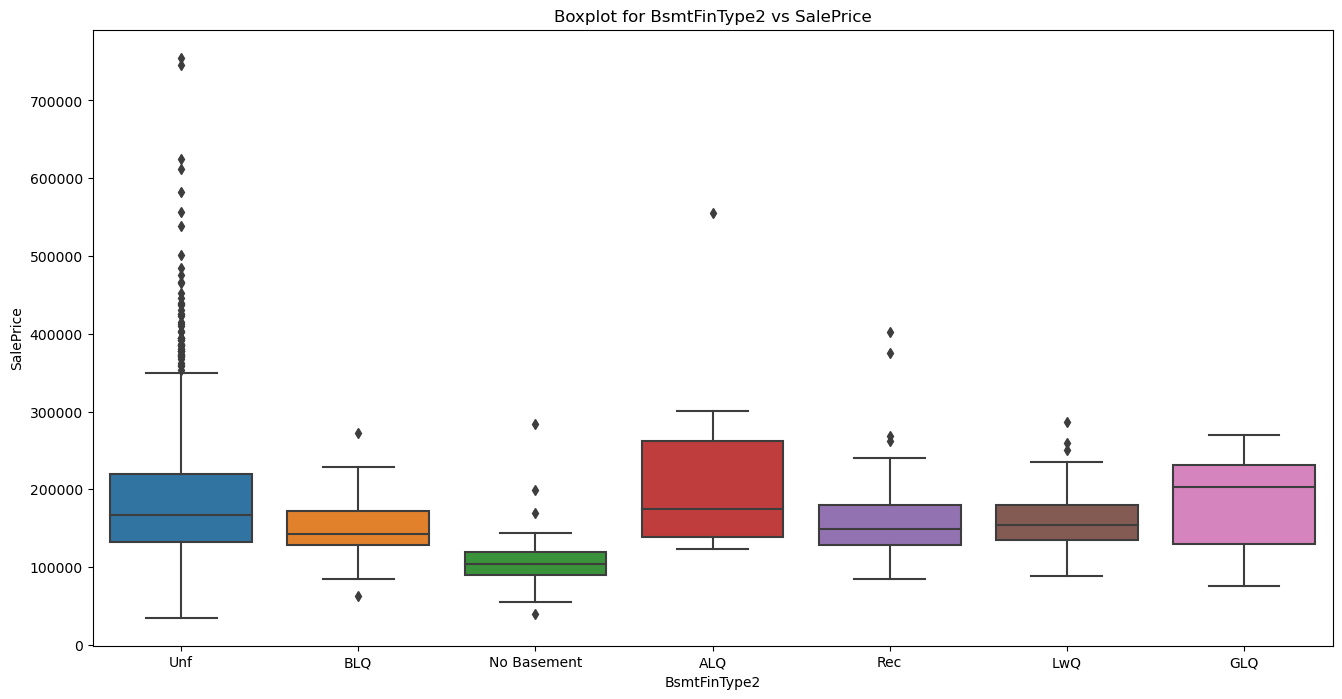

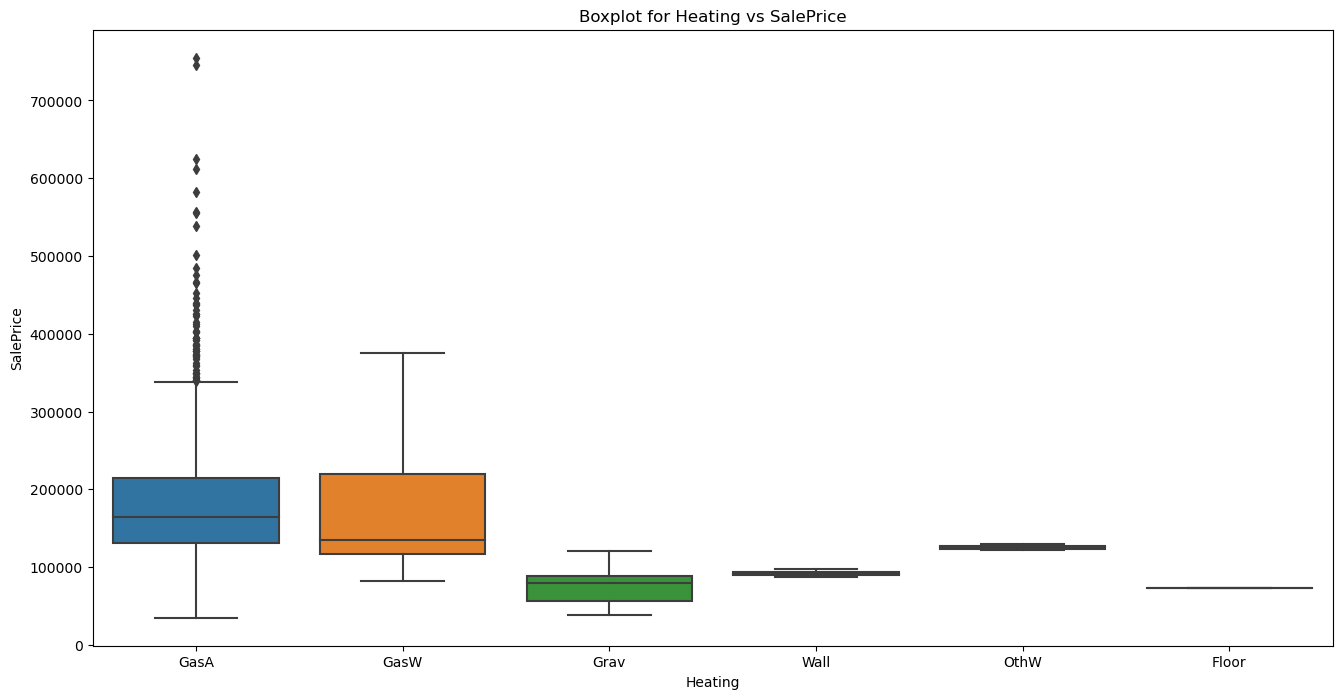

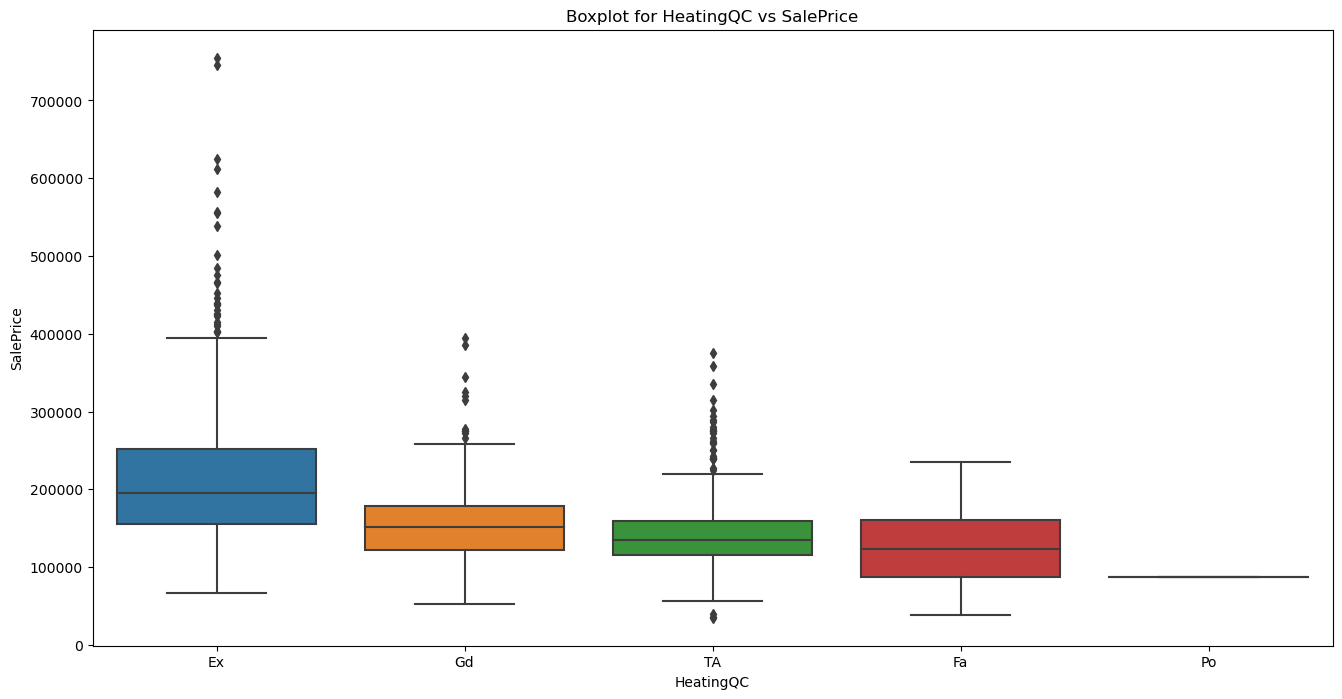

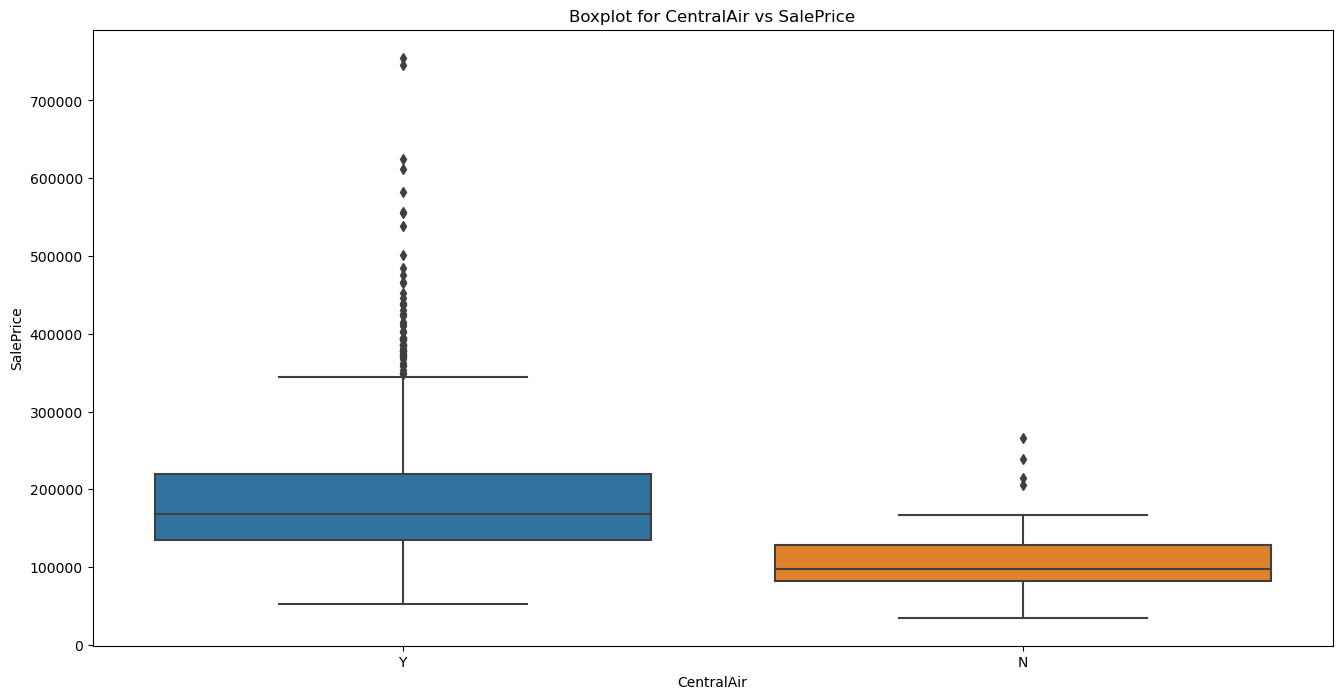

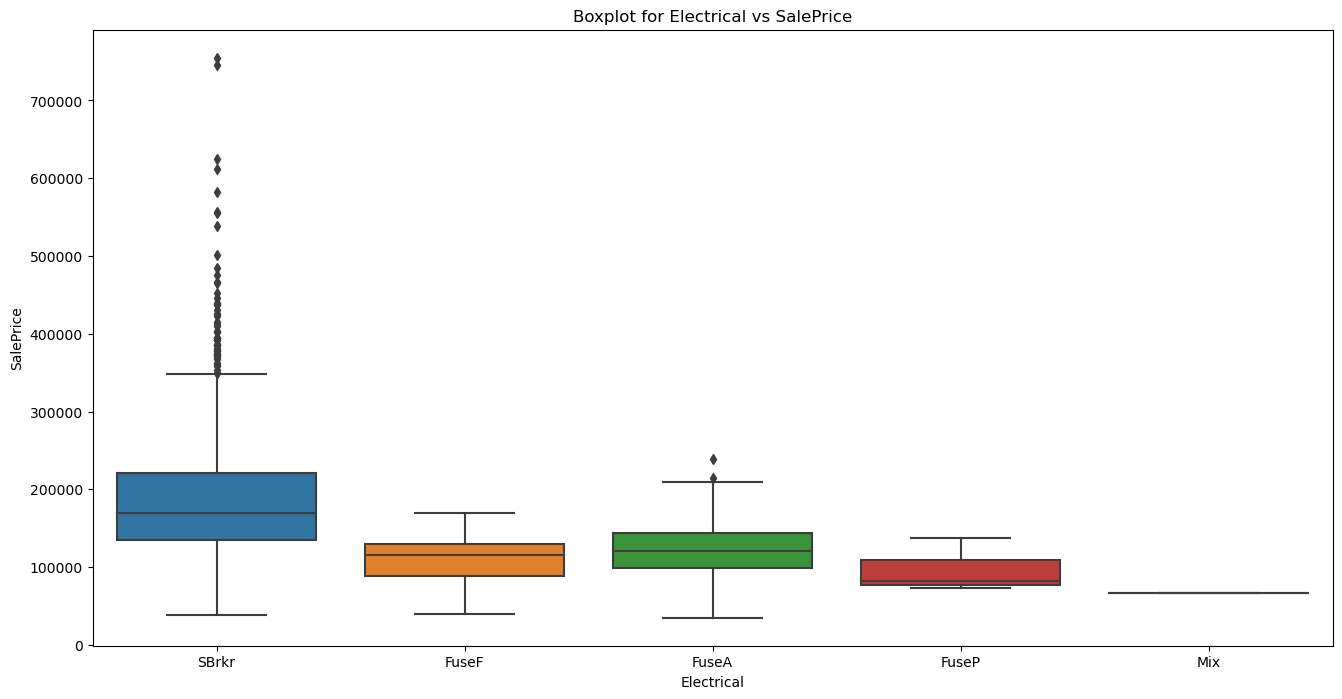

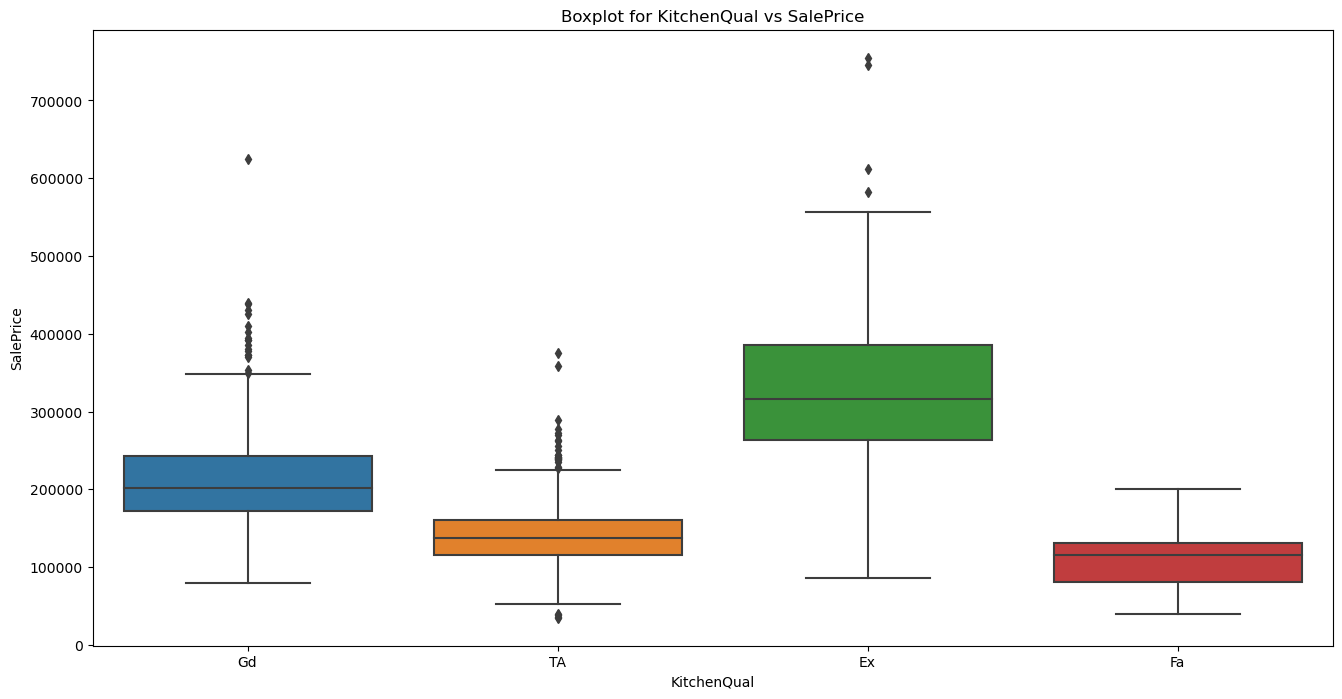

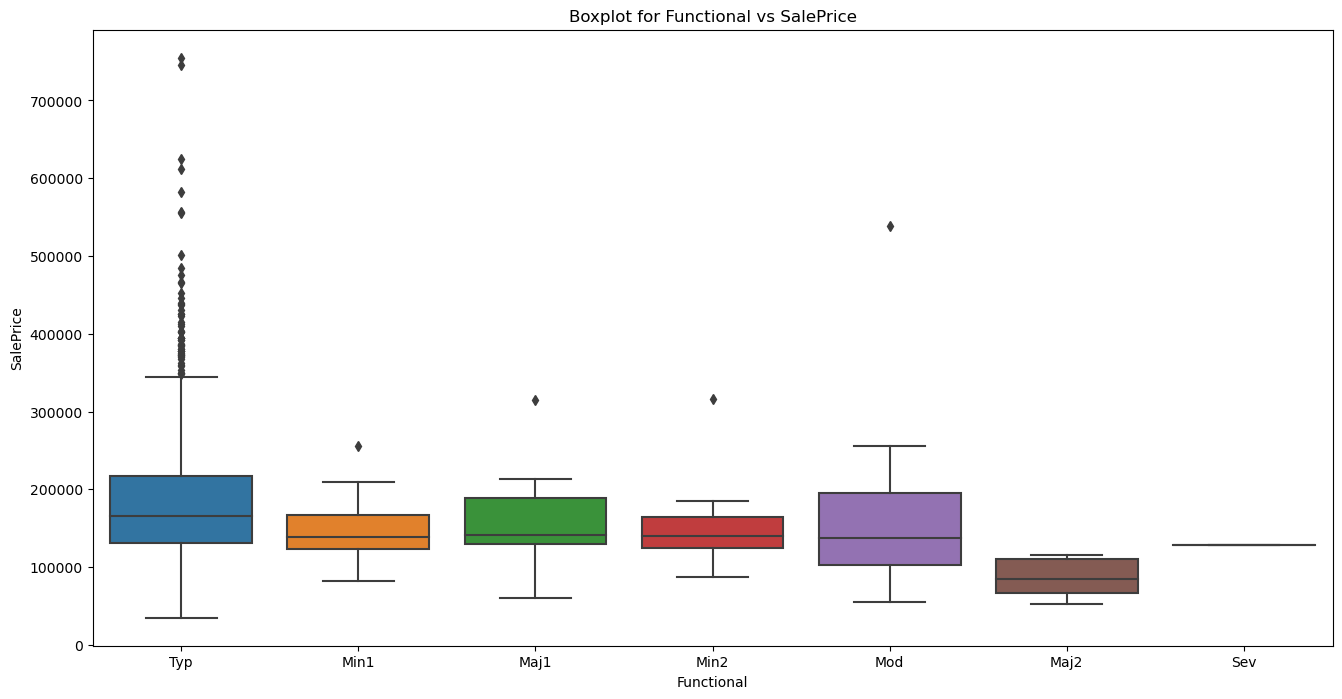

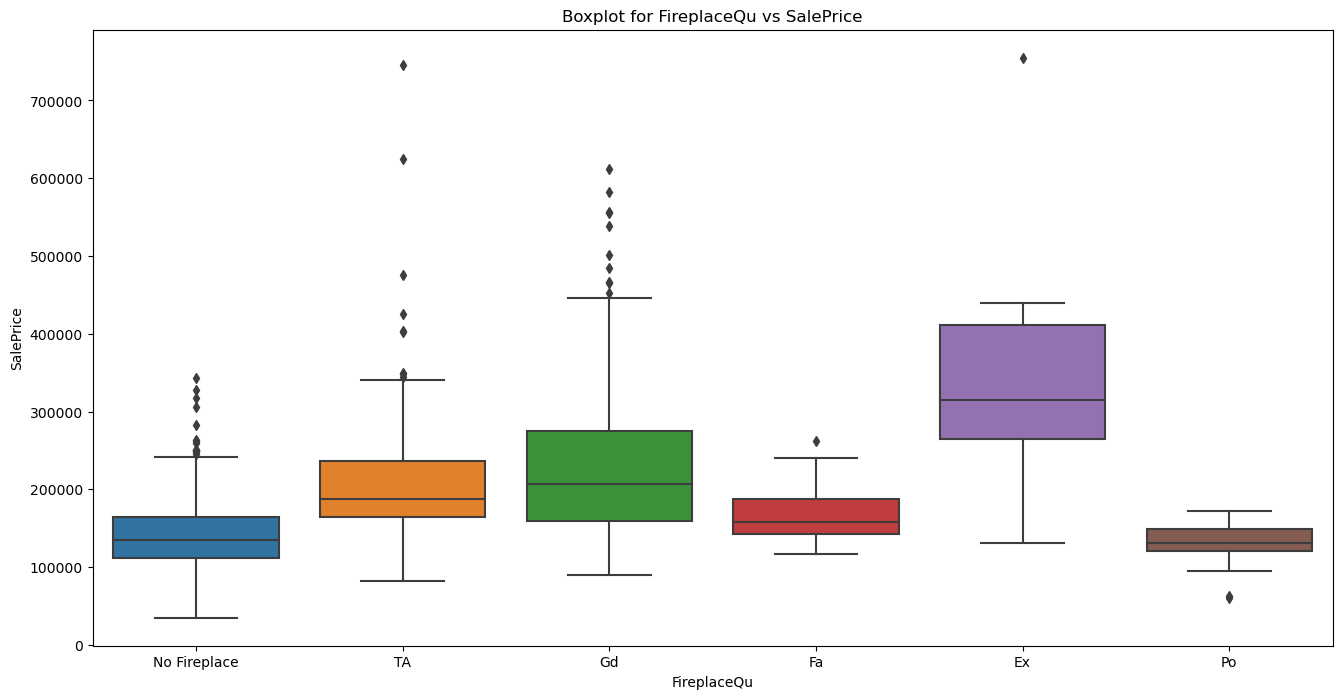

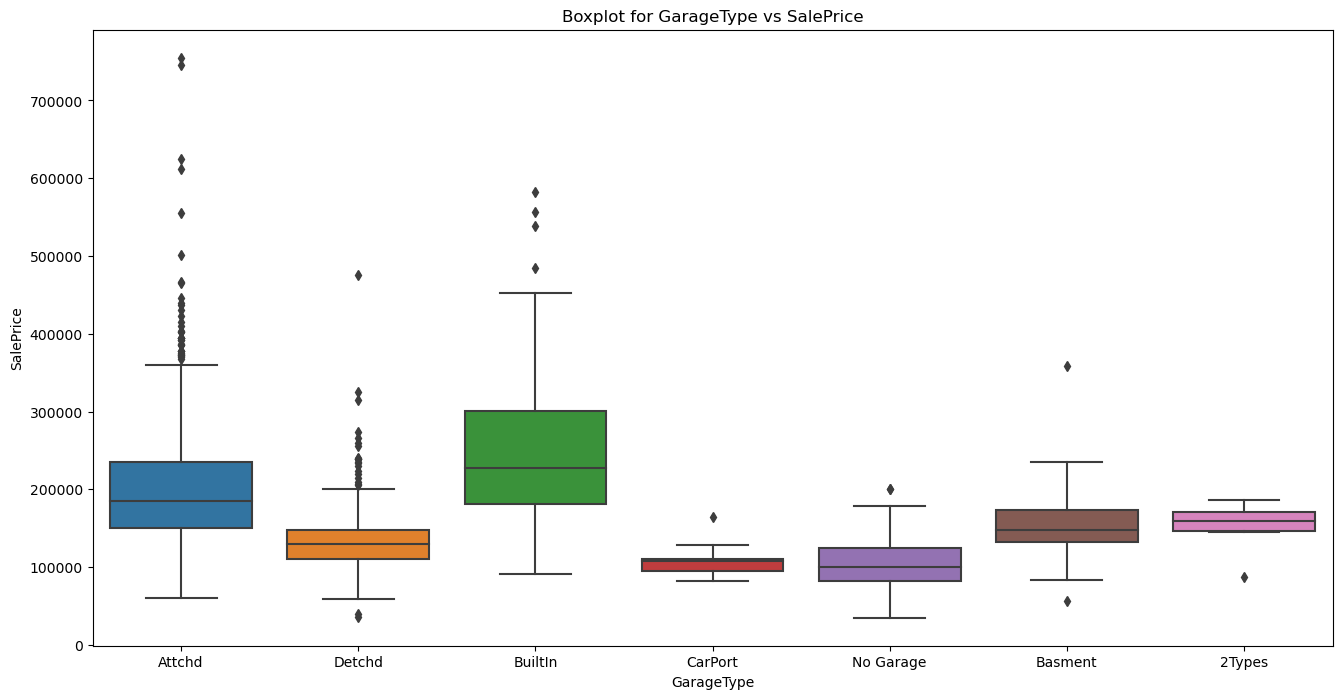

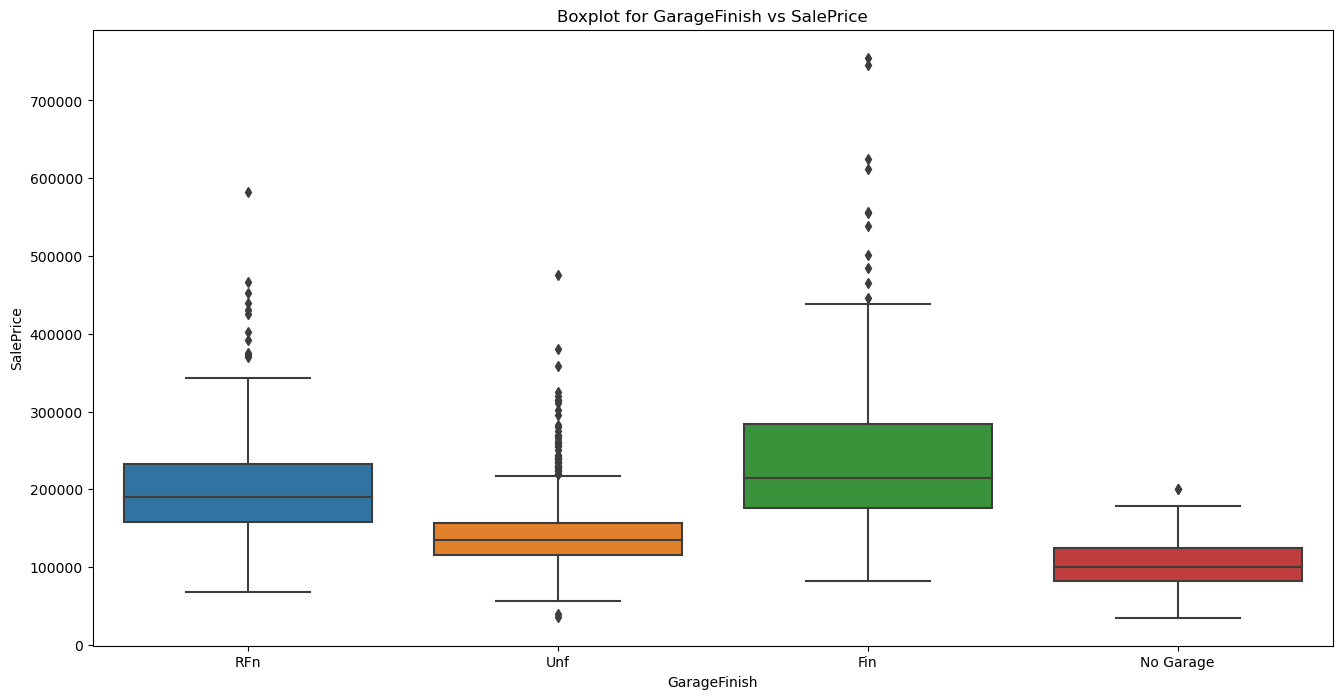

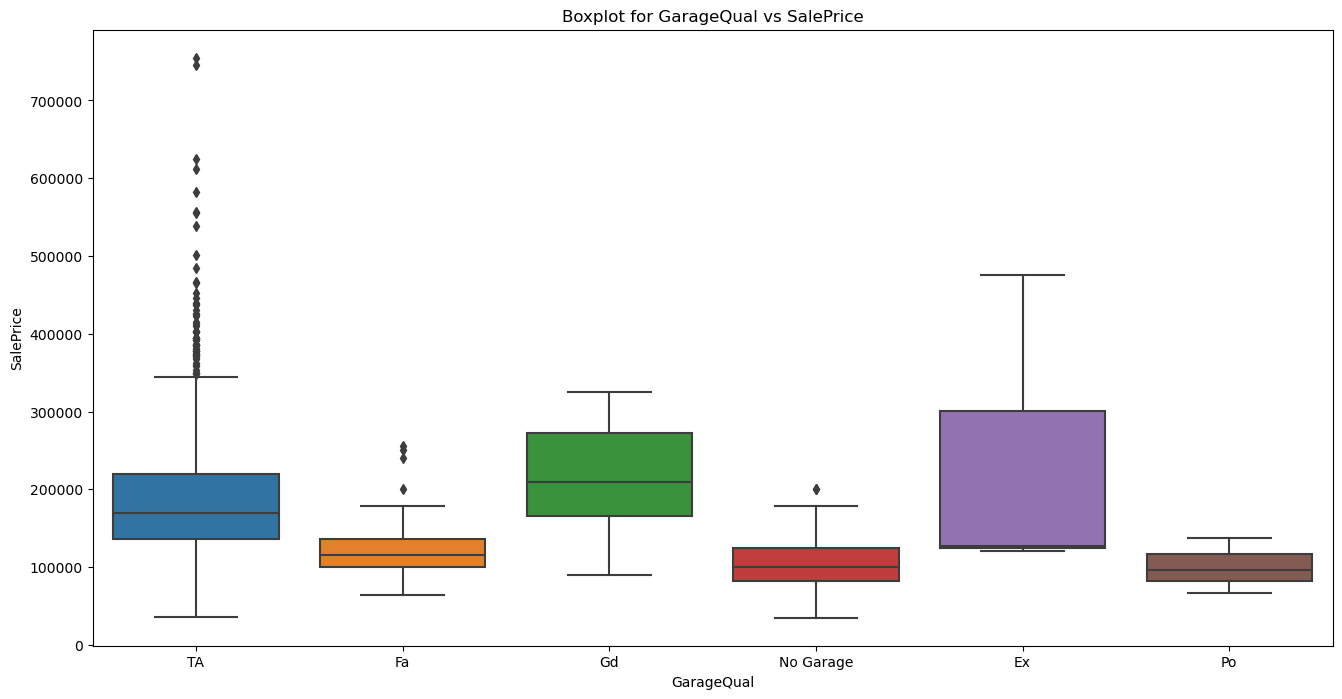

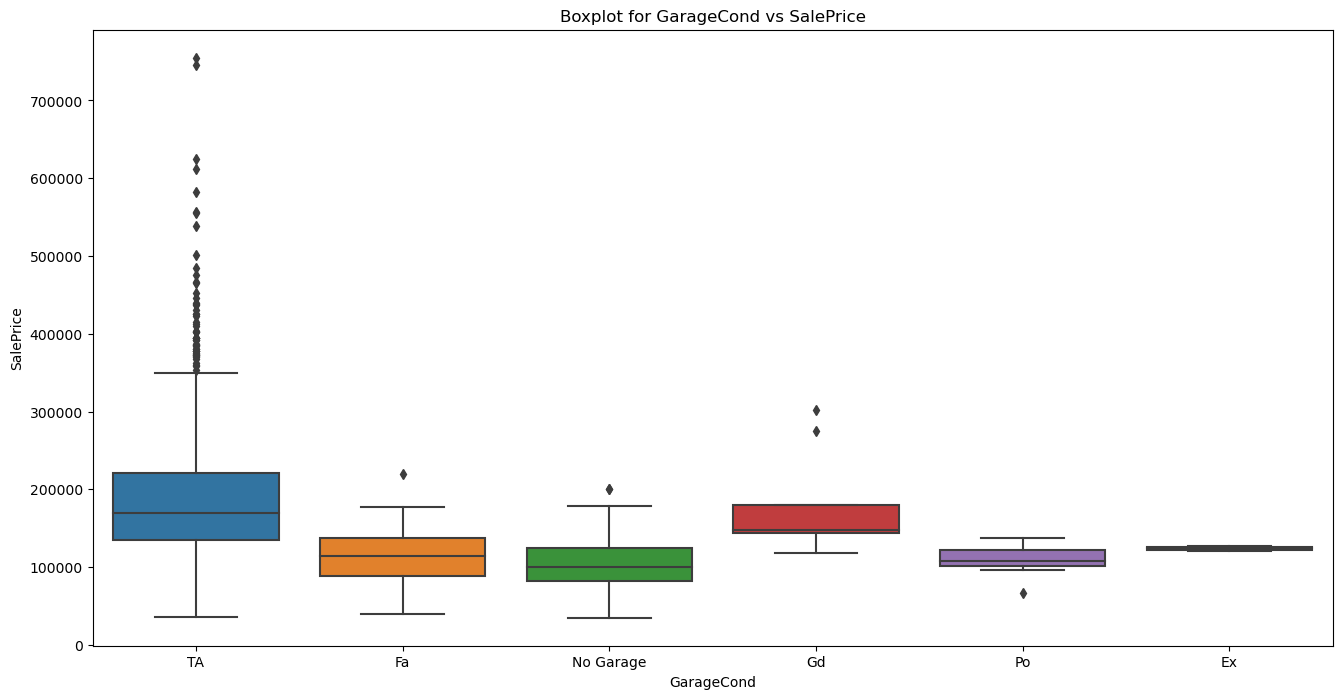

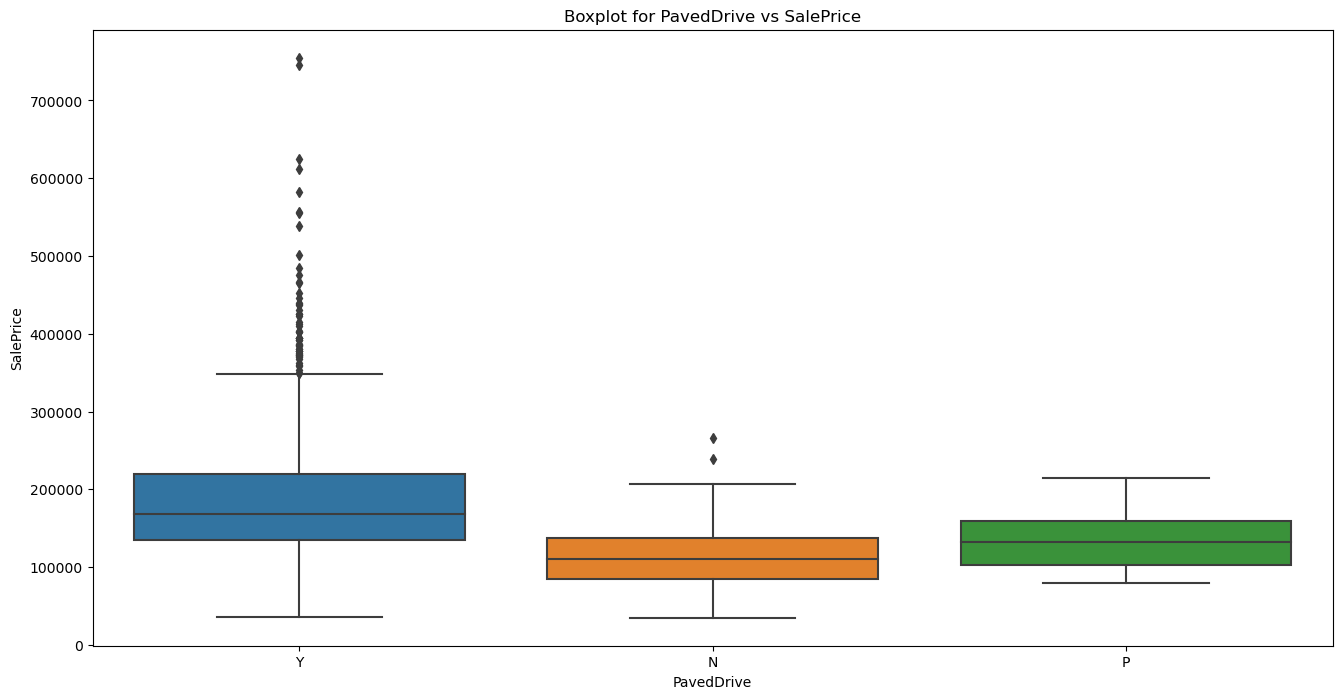

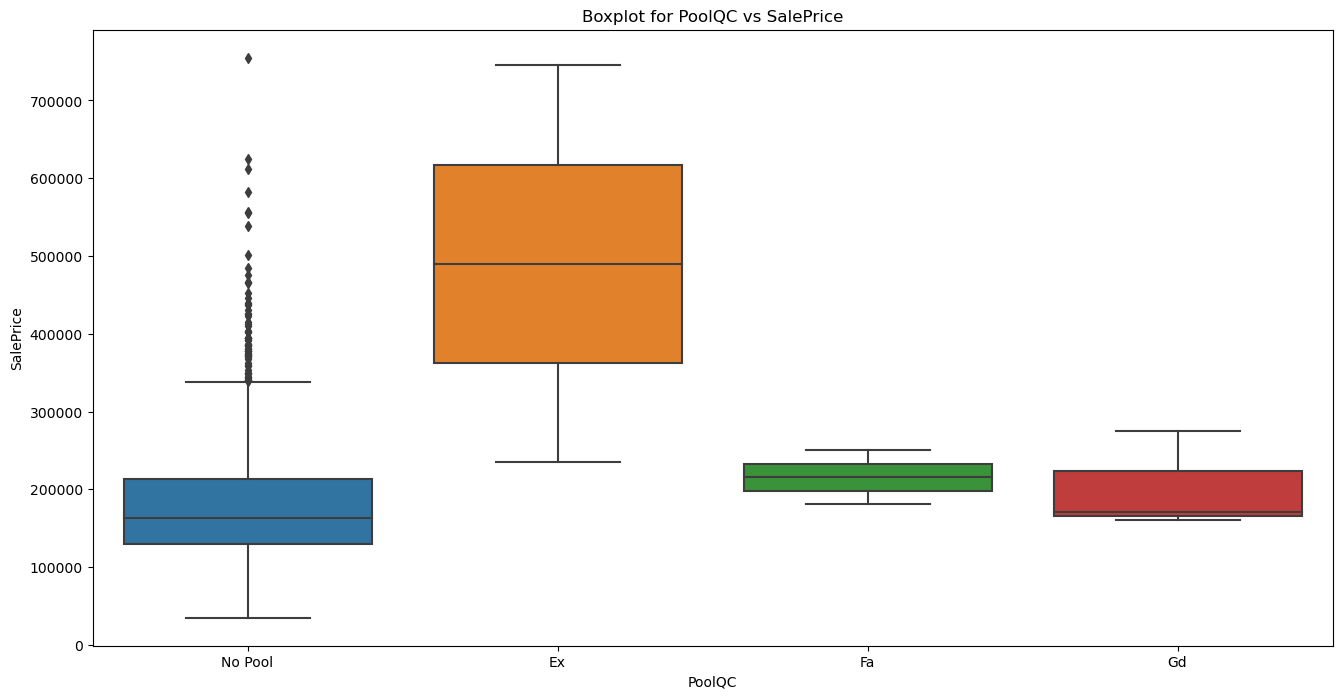

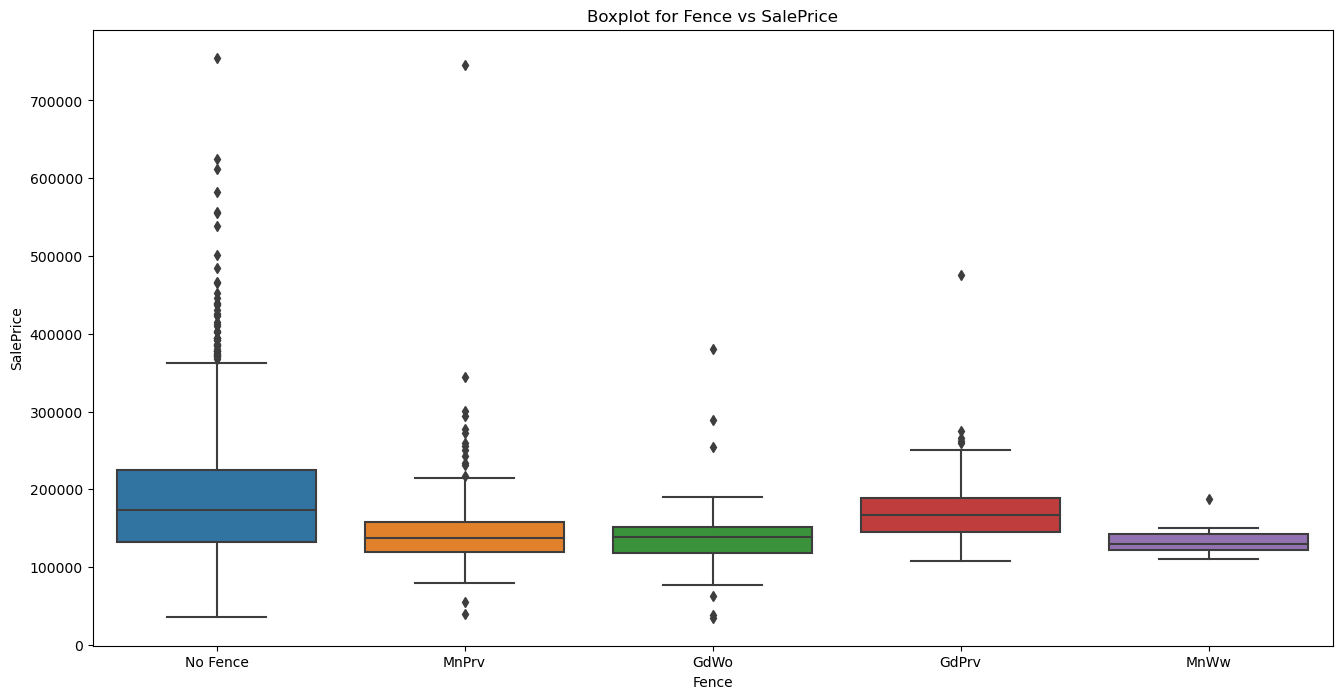

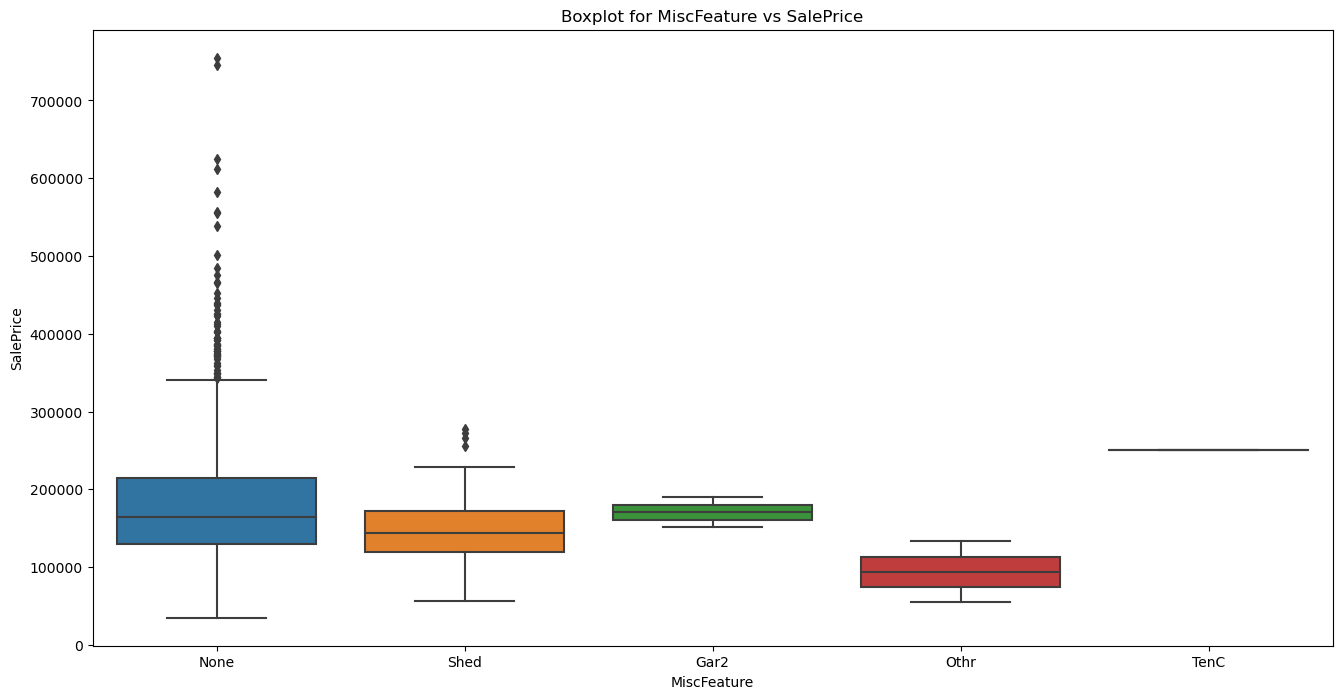

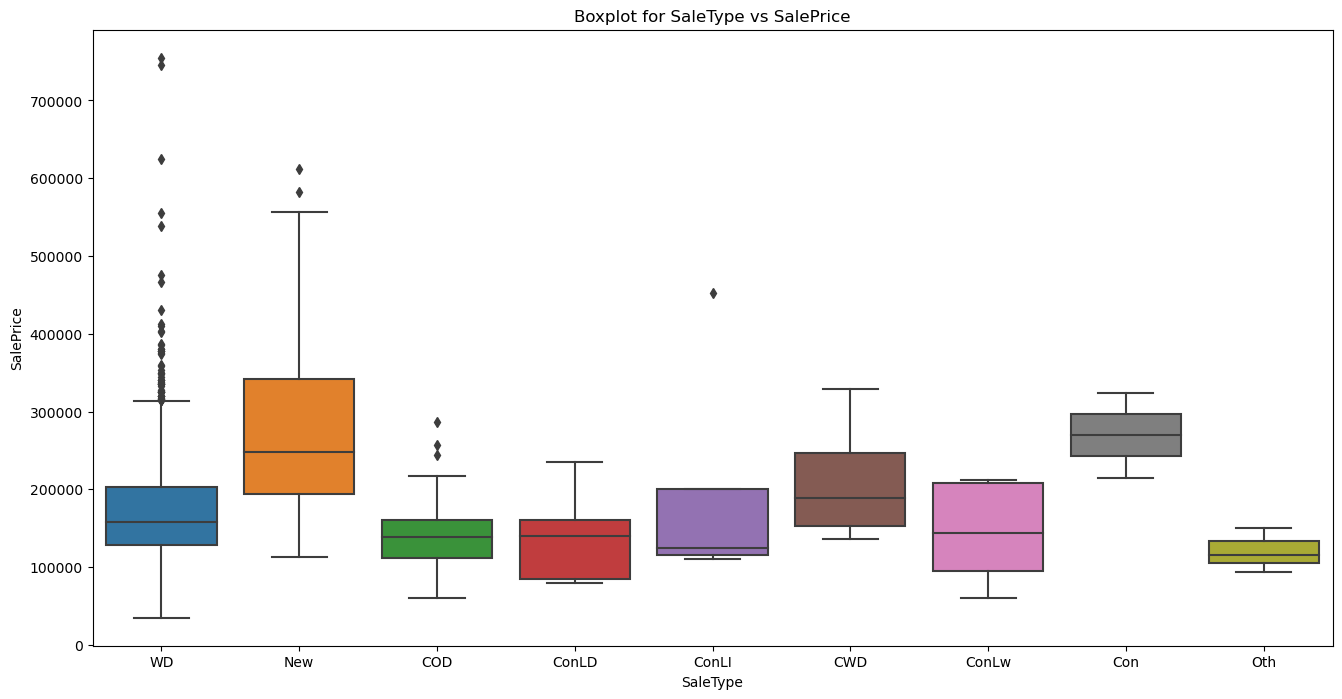

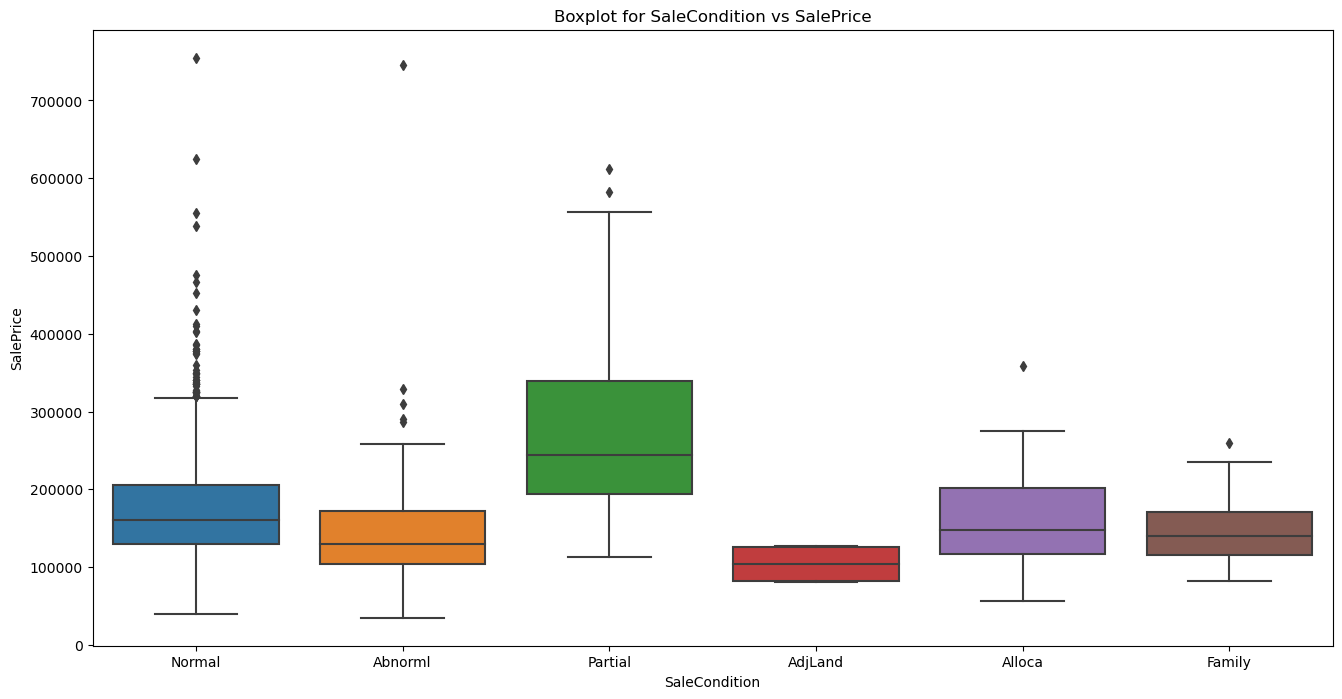

In [24]:
# Boxplot For Categorical Features

for i in cat:
    plt.figure(figsize=(16,8))
    sb.boxplot(data=train, x=i, y='SalePrice')
    plt.title(f'Boxplot for {i} vs SalePrice')
    plt.show()

### Seperate X and Y Variables

In [25]:
X = train.drop(labels=['Id', 'SalePrice'], axis=1)
Y = train[['SalePrice']]

In [26]:
X.isna().sum()

MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
                ..
MiscVal          0
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
Length: 79, dtype: int64

In [27]:
# Seperatecat and con

X1 = X.select_dtypes(include='object')
X2 = X.select_dtypes(exclude='object')

In [28]:
from sklearn.preprocessing import StandardScaler
ss= StandardScaler()

X2 = pd.DataFrame(ss.fit_transform(X2), columns=X2.columns)

In [29]:
outliers = []

for i in X2.columns:
    ol = X2 [(X2[i] <-3) | (X2[i] >3)].index
    outliers.extend(ol)

### Outliers

In [30]:
X = X.drop(index=outliers, axis=0)
Y = Y.drop(index=outliers, axis=0)

In [31]:
X.shape

(1021, 79)

In [32]:
X.index = range(0,1021,1)
Y.index = range(0,1021,1)

In [33]:
cat = X1.columns
con = X2.columns

In [34]:
X_cat = pd.get_dummies(X[cat])

In [35]:
X_cat

MSZoning_C (all)  MSZoning_FV  MSZoning_RH  MSZoning_RL  MSZoning_RM  \
0                    0            0            0            1            0   
1                    0            0            0            1            0   
2                    0            0            0            1            0   
3                    0            0            0            1            0   
4                    0            0            0            1            0   
...                ...          ...          ...          ...          ...   
1016                 0            0            0            0            1   
1017                 0            0            0            1            0   
1018                 0            1            0            0            0   
1019                 0            0            0            1            0   
1020                 0            0            0            1            0   

      Street_Grvl  Street_Pave  Alley_Grvl  Alley_No alley access  Alley_Pave  \
0               0            1           0                      1           0   
1               0            1           0                      1           0   
2               0            1           0                      1           0   
3               0            1           0                      1           0   
4               0            1           0                      1           0   
...           ...          ...         ...                    ...         ...   
1016            0            1           0                      1           0   
1017            0            1           0                      1           0   
1018            0            1           0                      0           1   
1019            0            1           0                      1           0   
1020            0            1           0                      1           0   

      ...  SaleType_ConLw  SaleType_New  SaleType_Oth  SaleType_WD  \
0     ...               0             0             0            1   
1     ...               0             0             0            1   
2     ...               0             0             0            1   
3     ...               0             0             0            1   
4     ...               0             0             0            1   
...   ...             ...           ...           ...          ...   
1016  ...               0             0             0            1   
1017  ...               0             0             0            1   
1018  ...               0             0             0            1   
1019  ...               0             0             0            1   
1020  ...               0             0             0            1   

      SaleCondition_Abnorml  SaleCondition_AdjLand  SaleCondition_Alloca  \
0                         0                      0                     0   
1                         0                      0                     0   
2                         0                      0                     0   
3                         0                      0                     0   
4                         0                      0                     0   
...                     ...                    ...                   ...   
1016                      0                      0                     0   
1017                      1                      0                     0   
1018                      0                      0                     0   
1019                      0                      0                     0   
1020                      0                      0                     0   

      SaleCondition_Family  SaleCondition_Normal  SaleCondition_Partial  
0                        0                     1                      0  
1                        0                     1                      0  
2                        0                     1                      0  
3                        0                    

In [36]:
X_con = X[con]
X_con = pd.DataFrame(ss.fit_transform(X[con]), columns=con)

X_con.head()

MSSubClass  LotFrontage   LotArea  OverallQual  OverallCond  YearBuilt  \
0    0.151802    -0.142725 -0.196750     0.683815    -0.527526   0.953684   
1    0.151802     0.020779  0.572050     0.683815    -0.527526   0.884839   
2    0.151802     0.892795  1.398510     1.435348    -0.527526   0.850416   
3   -0.841723     0.402286  0.251900     1.435348    -0.527526   0.988107   
4   -0.841723     0.129781  0.558321    -0.819253    -0.527526  -0.354374   

   YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  ...  GarageArea  \
0      0.812282    0.861524    0.708378   -0.246206  ...    0.407109   
1      0.764039    0.600445    0.168088   -0.246206  ...    0.708398   
2      0.667554    2.044059    0.583129   -0.246206  ...    1.853296   
3      0.908768    0.784736    2.336615   -0.246206  ...    0.849000   
4     -1.020940   -0.643521    1.199551   -0.246206  ...   -0.416414   

   WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  \
0   -0.824474     0.343944      -0.344188  -0.031311    -0.207246       0.0   
1   -0.824474    -0.009792      -0.344188  -0.031311    -0.207246       0.0   
2    0.968551     0.772152      -0.344188  -0.031311    -0.207246       0.0   
3    1.556888     0.269474      -0.344188  -0.031311    -0.207246       0.0   
4   -0.824474    -0.791736      -0.344188  -0.031311    -0.207246       0.0   

    MiscVal    MoSold    YrSold  
0 -0.145363 -1.590024  0.142357  
1 -0.145363  1.022367  0.142357  
2 -0.145363  2.141963  0.142357  
3 -0.145363  0.649168 -0.603008  
4 -0.145363 -1.590024  0.142357  

[5 rows x 36 columns]

In [37]:
Xnew = X_con.join(X_cat)
Xnew.head()

MSSubClass  LotFrontage   LotArea  OverallQual  OverallCond  YearBuilt  \
0    0.151802    -0.142725 -0.196750     0.683815    -0.527526   0.953684   
1    0.151802     0.020779  0.572050     0.683815    -0.527526   0.884839   
2    0.151802     0.892795  1.398510     1.435348    -0.527526   0.850416   
3   -0.841723     0.402286  0.251900     1.435348    -0.527526   0.988107   
4   -0.841723     0.129781  0.558321    -0.819253    -0.527526  -0.354374   

   YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  ...  SaleType_ConLw  \
0      0.812282    0.861524    0.708378   -0.246206  ...               0   
1      0.764039    0.600445    0.168088   -0.246206  ...               0   
2      0.667554    2.044059    0.583129   -0.246206  ...               0   
3      0.908768    0.784736    2.336615   -0.246206  ...               0   
4     -1.020940   -0.643521    1.199551   -0.246206  ...               0   

   SaleType_New  SaleType_Oth  SaleType_WD  SaleCondition_Abnorml  \
0             0             0            1                      0   
1             0             0            1                      0   
2             0             0            1                      0   
3             0             0            1                      0   
4             0             0            1                      0   

   SaleCondition_AdjLand  SaleCondition_Alloca  SaleCondition_Family  \
0                      0                     0                     0   
1                      0                     0                     0   
2                      0                     0                     0   
3                      0                     0                     0   
4                      0                     0                     0   

   SaleCondition_Normal  SaleCondition_Partial  
0                     1                      0  
1                     1                      0  
2                     1                      0  
3                     1                      0  
4                     1                      0  

[5 rows x 273 columns]

In [38]:
Xnew.isna().sum()

MSSubClass               0
LotFrontage              0
LotArea                  0
OverallQual              0
OverallCond              0
                        ..
SaleCondition_AdjLand    0
SaleCondition_Alloca     0
SaleCondition_Family     0
SaleCondition_Normal     0
SaleCondition_Partial    0
Length: 273, dtype: int64

### Spliting of Data: 

In [39]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(Xnew, Y, test_size=0.2, random_state=21)

### Create a Backward elemination OLS Model 

In [40]:
from statsmodels.api import OLS,add_constant
xconst = add_constant(xtrain)
ol = OLS(ytrain,xconst)
model = ol.fit()
rsq = model.rsquared_adj
col_to_drop = model.pvalues.sort_values().index[-1]
print("Dropped: column:",col_to_drop,"\tRsquared:",round(rsq,4))
Xnew = Xnew.drop(labels=col_to_drop,axis=1)
xtrain,xtest,ytrain,ytest=train_test_split(Xnew,Y,test_size=0.2,random_state=21)
xconst = add_constant(xtrain)
ol = OLS(ytrain,xconst)
model = ol.fit()
rsq = model.rsquared_adj

Dropped: column: BldgType_Twnhs 	Rsquared: 0.9341


In [41]:
for i in range(0,10):
    from statsmodels.api import OLS,add_constant
    xconst = add_constant(xtrain)
    ol = OLS(ytrain,xconst)
    model = ol.fit()
    rsq = model.rsquared_adj
    col_to_drop = model.pvalues.sort_values().index[-1]
    
    print("Dropped: column:",col_to_drop,"\tRsquared:",round(rsq,4))
    
    Xnew = Xnew.drop(labels=col_to_drop,axis=1)
    xtrain,xtest,ytrain,ytest=train_test_split(Xnew,Y,test_size=0.2,random_state=21)
    xconst = add_constant(xtrain)
    ol = OLS(ytrain,xconst)
    model = ol.fit()
    rsq = model.rsquared_adj

Dropped: column: Neighborhood_Veenker 	Rsquared: 0.9341
Dropped: column: HalfBath 	Rsquared: 0.9341
Dropped: column: Neighborhood_SawyerW 	Rsquared: 0.9342
Dropped: column: Fence_GdPrv 	Rsquared: 0.9343
Dropped: column: ExterQual_Fa 	Rsquared: 0.9343
Dropped: column: BsmtFinType1_ALQ 	Rsquared: 0.9343
Dropped: column: PoolArea 	Rsquared: 0.9343
Dropped: column: BsmtHalfBath 	Rsquared: 0.9343
Dropped: column: MasVnrArea 	Rsquared: 0.9343
Dropped: column: KitchenAbvGr 	Rsquared: 0.9344


#### Create a Linear model based on selected features

In [42]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()

model = lm.fit(xtrain,ytrain)
tr_pred = model.predict(xtrain)
ts_pred = model.predict(xtest)

from sklearn.metrics import mean_absolute_error

tr_err = mean_absolute_error(ytrain,tr_pred)
ts_err = mean_absolute_error(ytest,ts_pred)

In [43]:
tr_err

10457.877450980392

In [44]:
ts_err

13441514031447.04

### Regularize:

In [45]:
lambdas = []
q = 8
for i in range(0,4000,1):
    q = q + 0.001
    q = round(q,4)
    lambdas.append(q)

In [46]:
from sklearn.linear_model import Ridge
tr = []
ts = []
for i in lambdas:
    rr = Ridge(alpha=i)
    model = rr.fit(xtrain,ytrain)
    tr_pred = model.predict(xtrain)
    ts_pred = model.predict(xtest)
    from sklearn.metrics import mean_absolute_error
    tr_err = mean_absolute_error(ytrain,tr_pred)
    ts_err = mean_absolute_error(ytest,ts_pred)
    tr.append(tr_err)
    ts.append(ts_err)

In [47]:
t = range(0,4000,1)

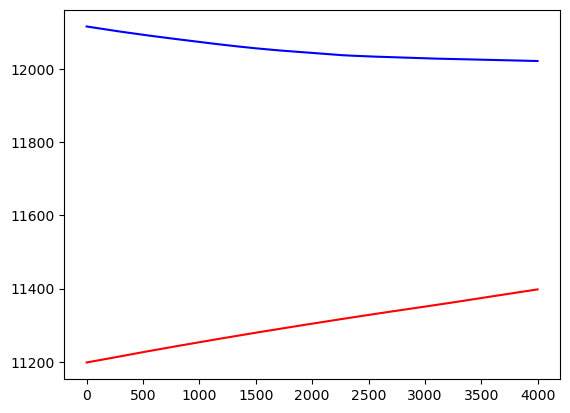

In [48]:
import matplotlib.pyplot as plt
plt.plot(t,tr,c="red")
plt.plot(t,ts,c="blue")

In [49]:
lambdas[-1]

12.0

In [50]:
tr_err

11397.577988327863

In [51]:
ts_err

12021.664244947246

In [52]:
model

Ridge(alpha=12.0)

#### In a Jupyter environment, please rerun this cell to show the HTML representation or trust the notebook.
On GitHub, the HTML representation is unable to render, please try loading this page with nbviewer.org.

In [53]:
rr = Ridge(alpha = 12.0)
model = rr.fit(xtrain,ytrain)

In [54]:
xtrain.columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       ...
       'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth', 'SaleType_WD',
       'SaleCondition_Abnorml', 'SaleCondition_AdjLand',
       'SaleCondition_Alloca', 'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=262)

### Creating test data ready for predictions

In [55]:
xtest = test.drop(labels=['Id'],axis = 1)

In [56]:
# Doing same thing with test data

def preprocessing(df):
    cat,con = catconsep(df)
    
    from sklearn.preprocessing import MinMaxScaler
    ss = MinMaxScaler()
    
    import pandas as pd
    X1 = pd.DataFrame(ss.fit_transform(df[con]),columns=con)
    X2 = pd.get_dummies(df[cat])
    Xnew = X1.join(X2)
    
    return Xnew

In [57]:
xtest_new = preprocessing(xtest)

In [58]:
#xtest_new[list(xtrain.columns)]

In [63]:
for i in ['Condition2_RRNn', 'Exterior1st_ImStucc', 'Exterior2nd_Other', 'Heating_Floor', 'GarageQual_Ex']:
    xtest_new[i]=0

In [64]:
final_data_for_pre = xtest_new[list(xtrain.columns)]
()

()

### Pred:

In [65]:
pred = model.predict(final_data_for_pre)

In [66]:
Q = test[['Id']]

In [67]:
Q['SalePrice'] = pred

In [68]:
print('Id', Q)
print(' ')

Id         Id      SalePrice
0     1461  178498.356598
1     1462  184173.428477
2     1463  202082.827569
3     1464  203018.981557
4     1465  220215.228265
...    ...            ...
1454  2915  185383.505520
1455  2916  180635.498535
1456  2917  186202.115714
1457  2918  190394.503665
1458  2919  196752.481630

[1459 rows x 2 columns]
 
